In [1]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
import pandas as pd
import os
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
import numpy as np
# import seaborn as sns
import datetime

In [2]:
PATH = "D:\\COLLEGE\\THESIS\\Feature Engineering\\FeatureEngineering_TimeSeries\\For Correlation\\"
rolling_traffic_filename = "Expanding and Rolling\\eng_mmda_Vicente Cruz_2015_seasonWet.csv"
rolling_weather_filename = "Expanding and Rolling\\eng_wwo_Vicente Cruz_2015_seasonWet.csv"
expanding_merged_filename = "Expanding and Rolling\\ENGINEER_normalized_mmda_wwo_Vicente Cruz_2015_seasonWet.csv"
for_results = "Expanding and Rolling Result\\"
columns_included = []
WINDOWS = [2,3,4,8,12,16,24,48,96]

In [3]:
rolling_traffic = pd.read_csv(PATH + rolling_traffic_filename , skipinitialspace = True, encoding = "ISO-8859-1")
# print(rolling_traffic.head(5))
rolling_weather = pd.read_csv(PATH + rolling_weather_filename , skipinitialspace = True, encoding = "ISO-8859-1")
expanding_merged = pd.read_csv(PATH + expanding_merged_filename , skipinitialspace = True, encoding = "ISO-8859-1")
FEATURES = expanding_merged.columns[1:15]

rolling_traffic.set_index(pd.DatetimeIndex(expanding_merged['dt']), inplace=True)
rolling_weather.set_index(pd.DatetimeIndex(expanding_merged['dt']), inplace=True)
expanding_merged.set_index(pd.DatetimeIndex(expanding_merged['dt']), inplace=True)


# # ensure is datetime
# rolling_traffic.index = pd.to_datetime(rolling_traffic.index)
# # ensure is datetime
# rolling_weather.index = pd.to_datetime(rolling_weather.index)
# # ensure is datetime
# expanding_merged.index = pd.to_datetime(expanding_merged.index)

# data = rolling_traffic
# start_date = datetime.datetime(2015, 7, 7, 0, 0)
# end_date = datetime.datetime(2015, 7, 15, 0, 0)
# mask = (data.index > start_date) & (data.index <= end_date)

# data = data.loc[mask]
# rolling_traffic = removePeakHours(data)


# data = rolling_weather
# start_date = datetime.datetime(2015, 7, 7, 0, 0)
# end_date = datetime.datetime(2015, 7, 15, 0, 0)
# mask = (data.index > start_date) & (data.index <= end_date)

# data = data.loc[mask]
# rolling_weather = removePeakHours(data)


# data = expanding_merged
# start_date = datetime.datetime(2015, 7, 7, 0, 0)
# end_date = datetime.datetime(2015, 7, 15, 0, 0)
# mask = (data.index > start_date) & (data.index <= end_date)

# data = data.loc[mask]
# expanding_merged = removePeakHours(data)




In [4]:
def getHighest(base, dlist):
    temp = dlist
    dlist = dlist[2:len(dlist)]
    highest = 0
    if(base < 0):
        for i in dlist:
            if(i < highest):
                highest = i
    elif(base > 0):
        for i in dlist:
            if(i > highest):
                highest = i
    if highest == 0:
        return highest
    return list(temp).index(highest)

In [5]:
def getBarPlot(y, title, length, width, xlabels):
    plt.bar(xlabels, y)
    plt.title(title)
    plt.xticks(rotation='vertical')
    plt.rcParams["figure.figsize"] = length,width
    plt.yticks(np.arange(-0.5, 1, 0.1))
    plt.show()
    

In [6]:
def getHeatMap(data,title,length, width, xlabels, ylabels):
    # plot it
#     print(data[0, 0])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(ylabels),1)
    ax.set_yticks(ticks)
    ticks = np.arange(0,len(xlabels),1)
    ax.set_xticks(ticks)
    ax.set_yticklabels(ylabels)
    ax.set_xticklabels(xlabels)
    ax.xaxis.set_ticks_position('bottom')
    plt.title(title)
    
    

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
#     plt.rcParams["figure.figsize"] = length,width
#     # Loop over data dimensions and create text annotations.
#     for i in range(1,len(xlabels)):
#         for j in range(1,len(ylabels)):
#             text = ax.text(j, i, data[i, j],
#                            ha="center", va="center", color="w")
    plt.show()


In [7]:
def addWorkingPeakFeatures(df):
    result_df = df.copy()

    # Converting the index as date
    result_df.index = pd.to_datetime(result_df.index)
    
    # Create column work_day
    result_df['work_day'] = ((result_df.index.dayofweek) < 5).astype(int)

    # Consider non-working holiday
    if DATASET_DIVISION is not "seasonWet":

        # Jan
        result_df.loc['2015-01-01', 'work_day'] = 0
        result_df.loc['2015-01-02', 'work_day'] = 0

        # Feb
        result_df.loc['2015-02-19', 'work_day'] = 0
        result_df.loc['2015-02-25', 'work_day'] = 0

        # Apr
        result_df.loc['2015-04-02', 'work_day'] = 0
        result_df.loc['2015-04-03', 'work_day'] = 0
        result_df.loc['2015-04-09', 'work_day'] = 0

        # May
        result_df.loc['2015-05-01', 'work_day'] = 0

    # Jun
    result_df.loc['2015-06-12', 'work_day'] = 0
    result_df.loc['2015-06-24', 'work_day'] = 0

    # Jul
    result_df.loc['2015-07-17', 'work_day'] = 0

    # Aug
    result_df.loc['2015-08-21', 'work_day'] = 0
    result_df.loc['2015-08-31', 'work_day'] = 0

    # Sep
    result_df.loc['2015-08-25', 'work_day'] = 0

    if DATASET_DIVISION is not "seasonWet":
        # Nov
        result_df.loc['2015-11-30', 'work_day'] = 0

        # Dec
        result_df.loc['2015-12-24', 'work_day'] = 0
        result_df.loc['2015-12-25', 'work_day'] = 0
        result_df.loc['2015-12-30', 'work_day'] = 0
        result_df.loc['2015-12-31', 'work_day'] = 0

    # Consider class suspension
    if DATASET_DIVISION is not "seasonWet":
        # Jan
        result_df.loc['2015-01-08', 'work_day'] = 0
        result_df.loc['2015-01-09', 'work_day'] = 0
        result_df.loc['2015-01-14', 'work_day'] = 0
        result_df.loc['2015-01-15', 'work_day'] = 0
        result_df.loc['2015-01-16', 'work_day'] = 0
        result_df.loc['2015-01-17', 'work_day'] = 0

    # Jul
    result_df.loc['2015-07-06', 'work_day'] = 0
    result_df.loc['2015-07-08', 'work_day'] = 0
    result_df.loc['2015-07-09', 'work_day'] = 0
    result_df.loc['2015-07-10', 'work_day'] = 0

    # Aug
    result_df.loc['2015-08-10', 'work_day'] = 0
    result_df.loc['2015-08-11', 'work_day'] = 0

    # Sep
    result_df.loc['2015-09-10', 'work_day'] = 0

    # Oct
    result_df.loc['2015-10-02', 'work_day'] = 0
    result_df.loc['2015-10-19', 'work_day'] = 0

    if DATASET_DIVISION is not "seasonWet":
        # Nov
        result_df.loc['2015-11-16', 'work_day'] = 0
        result_df.loc['2015-11-17', 'work_day'] = 0
        result_df.loc['2015-11-18', 'work_day'] = 0
        result_df.loc['2015-11-19', 'work_day'] = 0
        result_df.loc['2015-11-20', 'work_day'] = 0

        # Dec
        result_df.loc['2015-12-16', 'work_day'] = 0
        result_df.loc['2015-12-18', 'work_day'] = 0

    result_df['peak_hour'] = 0

    # Set morning peak hour

    start = datetime.time(7,0,0)
    end = datetime.time(10,0,0)

    result_df.loc[result_df.between_time(start, end).index, 'peak_hour'] = 1

    # Set afternoon peak hour

    start = datetime.time(16,0,0)
    end = datetime.time(19,0,0)

    result_df.loc[result_df.between_time(start, end).index, 'peak_hour'] = 1
    
    result_df
    
    return result_df

In [8]:
def removePeakHours(df):
    result_df = df.copy()
    result_df['peak_hour'] = 0

    # Set morning peak hour

    start = datetime.time(7,0,0)
    end = datetime.time(10,0,0)

    result_df.loc[result_df.between_time(start, end).index, 'peak_hour'] = 1

    # Set afternoon peak hour

    start = datetime.time(16,0,0)
    end = datetime.time(19,0,0)

    result_df.loc[result_df.between_time(start, end).index, 'peak_hour'] = 1
    
    IS_PEAKHOUR = 1

    # Filter based on parameters
    work_day_peak_hour_df = result_df[result_df['peak_hour'] != IS_PEAKHOUR]

    # Remove work_day and peak_hour columns
    work_day_peak_hour_df.drop(['peak_hour'], axis=1, inplace=True)
    
    return work_day_peak_hour_df

### Shift 96 of window 2

In [116]:
DATASET_DIVISION = "seasonWet"
temp_rolling = rolling_traffic
temp_rolling.set_index(pd.DatetimeIndex(expanding_merged['dt']), inplace=True)
# temp_rolling = pd.concat([expanding_merged['dt'], temp_rolling], axis = 1)
# print(temp_rolling.head())
# temp_rolling = temp_rolling.set_index(pd.DatetimeIndex(expanding_merged['dt']), inplace=True)

temp_rolling = addWorkingPeakFeatures(rolling_traffic)
temp_rolling.to_csv(PATH + "Expanding and Rolling Result\\With_WorkDayPeakHour_Labels.csv", encoding='utf-8', index=False)
# print(temp_rolling.head())

#### Remove WeekEnd

In [117]:
print(len(temp_rolling))
to_drop = []
for n in range(len(temp_rolling)-1, 0, -1):
    if(temp_rolling['work_day'][n] == 0):
        temp_rolling = temp_rolling.drop(temp_rolling.index[n])
temp_rolling.to_csv(PATH + "Expanding and Rolling Result\\With_WorkDayPeakHour_Labels_No_Weekend.csv", encoding='utf-8', index=False)

14688


DONE


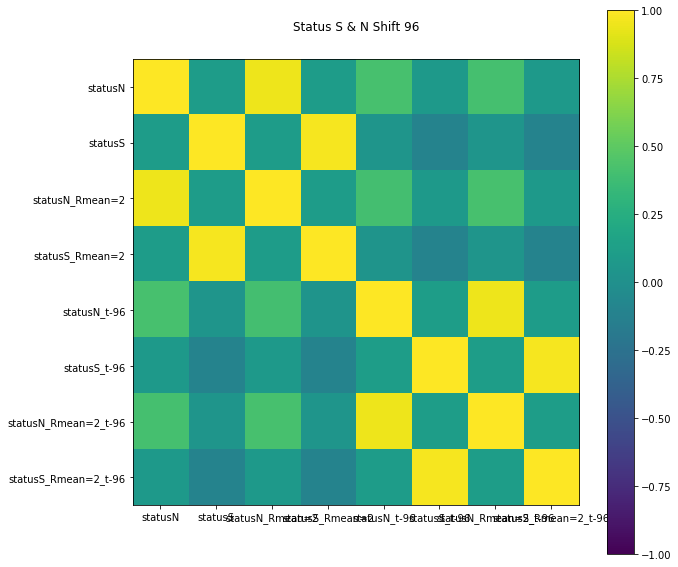

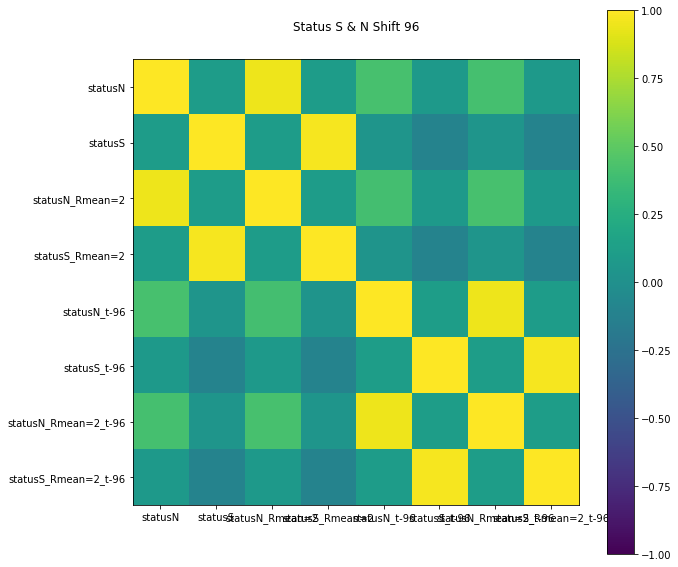

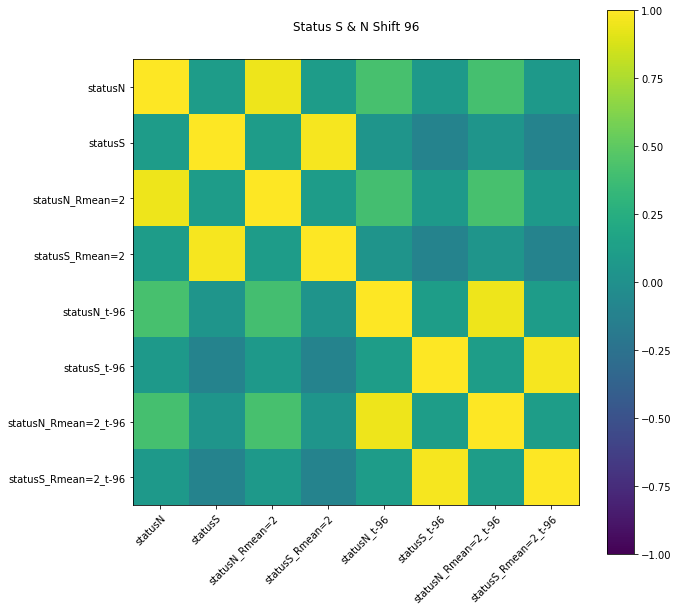

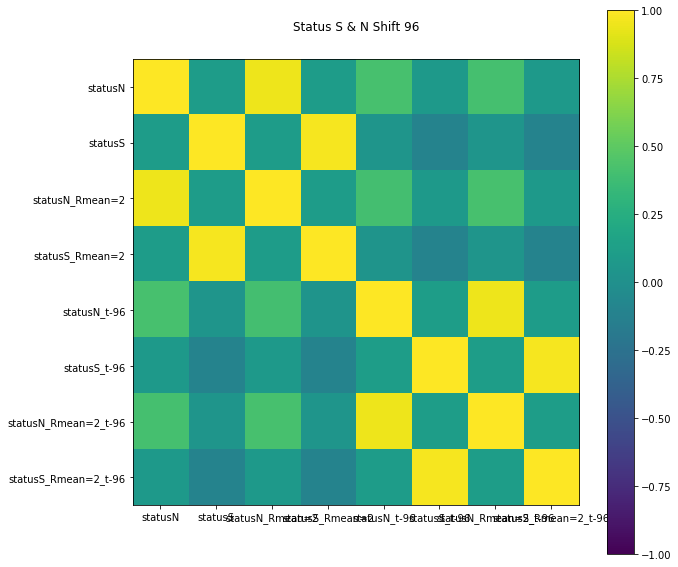

,statusN,statusS,statusN_Rmean=2,statusS_Rmean=2,statusN_t-96,statusS_t-96,statusN_Rmean=2_t-96,statusS_Rmean=2_t-96
dt,,,,,,,,
2015-06-02 00:00:00,0.438567,0.919412,0.328223,0.919280,0.908264,0.931841,0.000000,0.000000
2015-06-02 00:15:00,0.555569,0.919502,0.394900,0.919368,0.909505,0.931602,0.454132,0.465921
2015-06-02 00:30:00,0.683338,0.919594,0.497068,0.919457,0.910818,0.931331,0.908885,0.931721
2015-06-02 00:45:00,0.795359,0.919687,0.619454,0.919548,0.912204,0.931031,0.910162,0.931466
2015-06-02 01:00:00,0.874074,0.919782,0.739348,0.919640,0.913664,0.930706,0.911511,0.931181


In [118]:

merged_dataset = pd.DataFrame(rolling_traffic['statusN'])
to_correlate = ['statusS','statusN_Rmean=2','statusS_Rmean=2']
for c in range(0,len(to_correlate)):
    merged_dataset = pd.concat([merged_dataset, rolling_traffic[to_correlate[c]]], axis = 1)
    
merged_dataset['statusN' + '_t-96'] = merged_dataset['statusN'].shift(96)

for c in range(0,len(to_correlate)):
    merged_dataset[to_correlate[c] + '_t-96'] = merged_dataset[to_correlate[c]].shift(96)
    
merged_dataset.to_csv(PATH + "Expanding and Rolling Result\\Merged_Data_Traffic_Shift_96.csv", encoding='utf-8', index=False)

merged_dataset = merged_dataset.drop(merged_dataset.index[0:96])
    
merged_dataset.to_csv(PATH + "Expanding and Rolling Result\\Trimmed_Merged_Data_Traffic_Shift_96.csv", encoding='utf-8', index=False)

corr = merged_dataset.corr(method='spearman')
corr.to_csv(PATH + "Expanding and Rolling Result\\Correlated_Traffic_Shift_96.csv", encoding='utf-8', index=False)
print('DONE')
getHeatMap(corr, "Status S & N Shift 96", 10, 10, corr.columns, corr.columns)
merged_dataset.head()


DONE


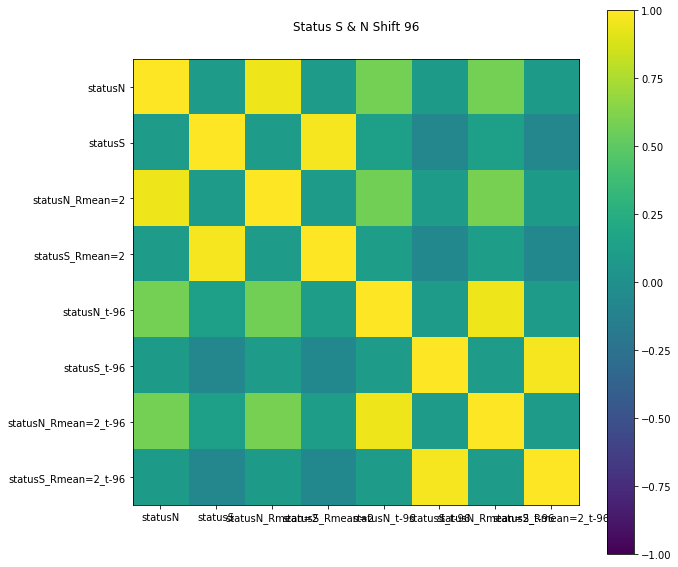

,statusN,statusS,statusN_Rmean=2,statusS_Rmean=2,statusN_t-96,statusS_t-96,statusN_Rmean=2_t-96,statusS_Rmean=2_t-96
dt,,,,,,,,
2015-06-02 00:00:00,0.438567,0.919412,0.328223,0.919280,0.908264,0.931841,0.000000,0.000000
2015-06-02 00:15:00,0.555569,0.919502,0.394900,0.919368,0.909505,0.931602,0.454132,0.465921
2015-06-02 00:30:00,0.683338,0.919594,0.497068,0.919457,0.910818,0.931331,0.908885,0.931721
2015-06-02 00:45:00,0.795359,0.919687,0.619454,0.919548,0.912204,0.931031,0.910162,0.931466
2015-06-02 01:00:00,0.874074,0.919782,0.739348,0.919640,0.913664,0.930706,0.911511,0.931181


In [119]:

merged_dataset = pd.DataFrame(temp_rolling['statusN'])
to_correlate = ['statusS','statusN_Rmean=2','statusS_Rmean=2']
for c in range(0,len(to_correlate)):
    merged_dataset = pd.concat([merged_dataset, temp_rolling[to_correlate[c]]], axis = 1)
    
merged_dataset['statusN' + '_t-96'] = merged_dataset['statusN'].shift(96)

for c in range(0,len(to_correlate)):
    merged_dataset[to_correlate[c] + '_t-96'] = merged_dataset[to_correlate[c]].shift(96)
    
merged_dataset.to_csv(PATH + "Expanding and Rolling Result\\Labeled_Merged_Data_Traffic_Shift_96.csv", encoding='utf-8', index=False)

merged_dataset = merged_dataset.drop(merged_dataset.index[0:96])
    
merged_dataset.to_csv(PATH + "Expanding and Rolling Result\\Labeled_Trimmed_Merged_Data_Traffic_Shift_96.csv", encoding='utf-8', index=False)

corr = merged_dataset.corr(method='spearman')
corr.to_csv(PATH + "Expanding and Rolling Result\\Labeled_Correlated_Traffic_Shift_96.csv", encoding='utf-8', index=False)
print('DONE')
getHeatMap(corr, "Status S & N Shift 96", 10, 10, corr.columns, corr.columns)
merged_dataset.head()


### Different Window per Weather Feature

In [50]:
ROADS = ['A. Maceda', 'Anda Circle', 'Antipolo',
         'Bluementritt', 'Buendia', 'Edsa Extension', 'Finance Road', 
         'Gov. Forbes - Lacson', 'Lerma', 'Magsaysay Ave', 'P.Noval', 'Pablo Ocampo', 'Pedro Gil', 
         'Quezon Ave.', 'Quirino', 'Rajah Sulayman', 'Taft Ave.', 'U.N. Avenue',
         'Vicente Cruz']
ROADS_DRYWET = ['A. Maceda DRY', 'A. Maceda WET', 'Anda Circle DRY', 'Anda Circle WET','Antipolo DRY','Antipolo WET',
         'Bluementritt DRY', 'Bluementritt WET','Buendia DRY','Buendia WET', 'Edsa Extension DRY', 'Edsa Extension WET', 'Finance Road DRY', 'Finance Road WET', 
         'Gov. Forbes - Lacson DRY','Gov. Forbes - Lacson WET', 'Lerma DRY', 'Lerma WET', 'Magsaysay Ave DRY', 'Magsaysay Ave WET', 'P.Noval DRY', 'P.Noval WET', 'Pablo Ocampo DRY', 'Pablo Ocampo WET', 'Pedro Gil DRY', 'Pedro Gil WET',  
         'Quezon Ave. DRY','Quezon Ave. WET', 'Quirino DRY', 'Quirino WET', 'Rajah Sulayman DRY', 'Rajah Sulayman WET', 'Taft Ave. DRY', 'Taft Ave. WET', 'U.N. Avenue DRY', 'U.N. Avenue WET',
         'Vicente Cruz DRY', 'Vicente Cruz WET']

YEAR = "2015"
EXT = ".csv"

PATH = "D:\\COLLEGE\\THESIS\Feature Engineering\\FeatureEngineering_TimeSeries\\normalized_merged\\"

DATA_COND = "normalized_mmda_wwo_2015_seasonDryWet_CORRELATED\\"

### Expanding

START
Vicente Cruz
[2, 3, 4, 8, 12, 16, 24, 48, 96]
[0.99579756468606284, 0.11023143608909867, -0.35773338586256631, -0.12302174825446199, -0.039092202148977802, 0.30068287678920003, 0.047296234462712375, -0.047050960246833529, 0.02675240629634669, -0.36113560952148455, -0.22819706586179289, -0.35792986167595248]


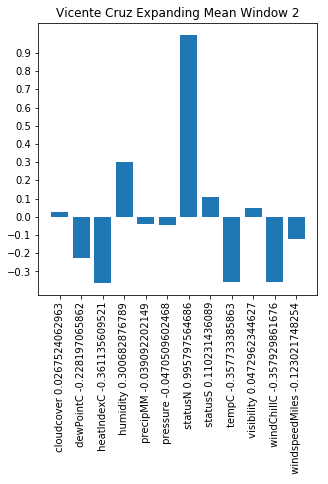

[0.98811820865441025, 0.11153811174801948, -0.35975003462089211, -0.12198953216375327, -0.036698588710658085, 0.30236014475265199, 0.046458263382542053, -0.045043336157173222, 0.027596096761423043, -0.363429090229484, -0.23142712312685235, -0.35996912832164868]


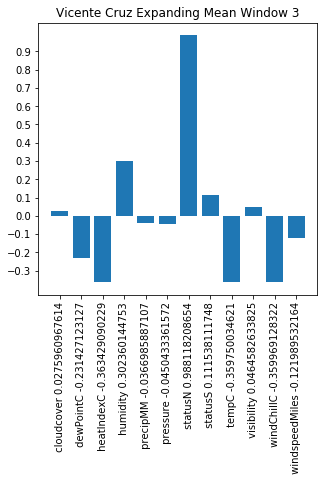

[0.9787879587754138, 0.10803510673580333, -0.35786653755532433, -0.12277086257620608, -0.03741988762924052, 0.30271549467158321, 0.047009977786832621, -0.046673868403074935, 0.028434283870717506, -0.3629846980632348, -0.22838125459077391, -0.35805584642724092]


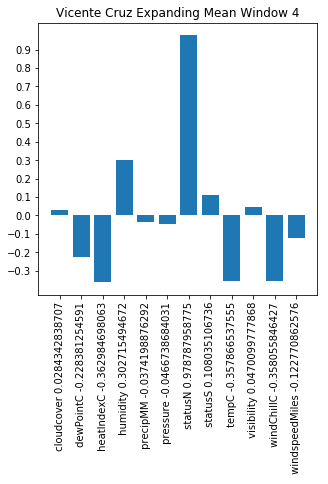

[0.93437747243533487, 0.10402117391851616, -0.3609118620741783, -0.11823444653413345, -0.02903547986527753, 0.30516992476492205, 0.044465178444108702, -0.041059755959694362, 0.032062276149186816, -0.36741063486007169, -0.22908066398643509, -0.36111635023159072]


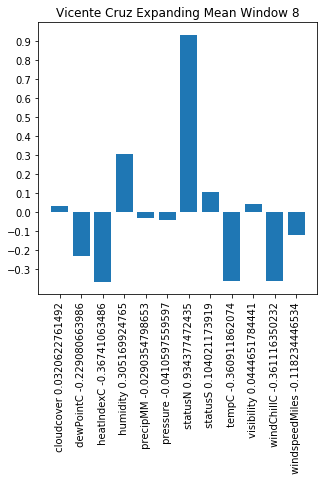

[0.90396710101634903, 0.099940598366921596, -0.36334773721040109, -0.1164664477312784, -0.025410660034908383, 0.30828064478813721, 0.043685294893008535, -0.038326470169116174, 0.034846056119649936, -0.3701328221562396, -0.23497020576181635, -0.36351316615359869]


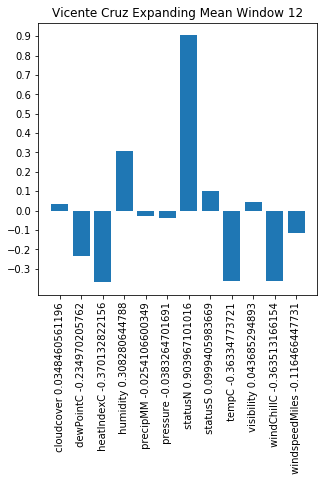

[0.86257385898914662, 0.096429379307130719, -0.35426679457504567, -0.11168881847016354, -0.023321750722746462, 0.30251419324054102, 0.03529604296917016, -0.035005401599351629, 0.037194057652698967, -0.36306632502947878, -0.21948796847570984, -0.35433167472136123]


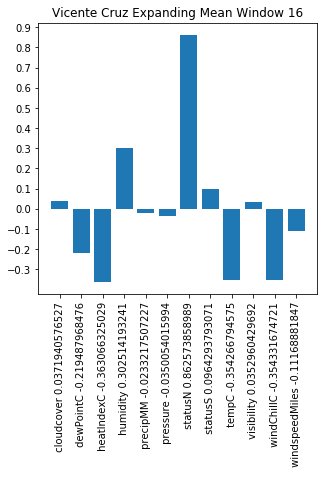

[0.84940366246426702, 0.096062554609753631, -0.37361697207094607, -0.10236195848203113, 0.0019222354706992012, 0.32086740304913802, 0.027743920520415199, -0.023264451293592472, 0.048122344170084937, -0.38556800956000969, -0.22698126008021374, -0.37380106408580777]


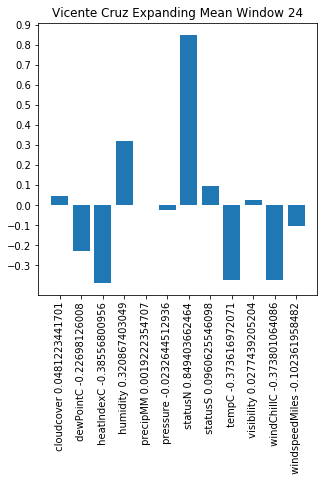

[0.70645702384105502, 0.10813964414504257, -0.3279686472652118, -0.10232510109328924, -0.017519954464191616, 0.29447970121865003, 0.051925440306562452, -0.01836809730872184, 0.049646645373255117, -0.33707865086039568, -0.17461631967353908, -0.32802473513172908]


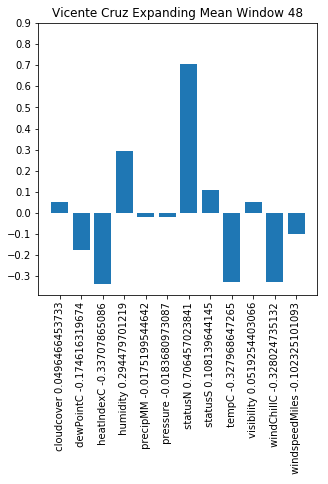

[0.64068864376473955, 0.15433431135906714, -0.2952282171004158, -0.022020013295458309, 0.0048113233970665387, 0.26536163997070339, 0.029634688770894417, -0.044347092405129247, 0.040929018316077717, -0.29989924158762321, -0.13340934905497509, -0.2951387629934531]


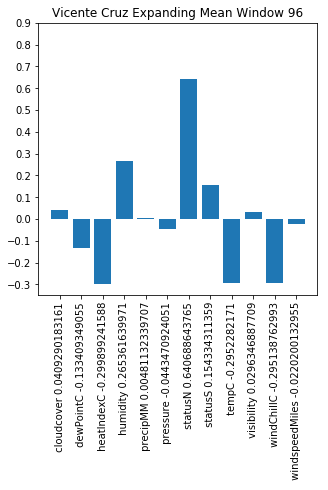

In [52]:
print("START")
ROAD = ROADS[18]
find = "_2015_seasonWet"
y = []
STAT = "Expanding Mean "
COL = []
ctr = 0
print(ROAD)
for file in os.listdir(PATH + DATA_COND): 
    if ROAD + find in file: 
        dataset = pd.read_csv(PATH + DATA_COND + file, skipinitialspace = True, encoding = "ISO-8859-1")
        FEATURES = dataset.columns
        y = []
        COL = []
        print(WINDOWS)
        for EM in WINDOWS:
            y = []
            COL = []
            ctr = 0
            for f in range(13, len(FEATURES)): 
                if STAT+ str(EM) + " " in FEATURES[f]:
                    y.append(dataset[FEATURES[f]][0])
                    COL.append(FEATURES[f].replace(STAT + str(EM), "") + " " + str(y[ctr]))
                    ctr = ctr +1 
            print(y)
            getBarPlot(y, ROAD + " "  + STAT + "Window " + str(EM), 5,5,COL)

### Rolling

In [40]:
rolling_WT = rolling_weather
# rolling_WT = rolling_WT.drop([rolling_WT["Unnamed: 0"]], axis=1)
rolling_WT = pd.concat([expanding_merged['statusN'], rolling_WT], axis = 1)
# rolling_WT.head()
correlation = rolling_WT.corr(method='spearman')
correlation.to_csv("D:\\COLLEGE\\THESIS\\Feature Engineering\\FeatureEngineering_TimeSeries\\For Correlation\\Expanding and Rolling\\CORRELATED_eng_wwo_Vicente Cruz_2015_seasonWet.csv" , encoding='utf-8', index=False)
correlation.head()


,statusN,Unnamed: 0,tempC,windspeedMiles,precipMM,humidity,visibility,pressure,cloudcover,heatIndexC,...,precipMM_Rmax=96,humidity_Rmax=96,visibility_Rmax=96,pressure_Rmax=96,cloudcover_Rmax=96,heatIndexC_Rmax=96,dewPointC_Rmax=96,windChillC_Rmax=96,windGustMiles_Rmax=96,feelsLikeC_Rmax=96
statusN,1.000000,-0.101456,-0.357453,-0.123109,-0.039585,0.299851,0.047359,-0.047160,0.025875,-0.360284,...,0.002792,0.011128,0.004329,-0.061728,-0.018599,0.025129,-0.007704,0.034557,-0.014902,0.025129
Unnamed: 0,-0.101456,1.000000,-0.211006,-0.074044,-0.117397,0.203732,0.071833,0.274651,-0.025809,-0.169710,...,-0.055807,0.464305,0.095221,0.332320,0.061200,-0.163973,0.222556,-0.326142,-0.072503,-0.163973
tempC,-0.357453,-0.211006,1.000000,0.059063,-0.043260,-0.914234,0.079510,0.004756,-0.206256,0.973317,...,-0.136944,-0.296538,0.112272,0.090553,-0.237157,0.291589,-0.132493,0.339209,-0.152818,0.291589
windspeedMiles,-0.123109,-0.074044,0.059063,1.000000,0.414521,-0.021761,-0.341171,-0.483427,0.356545,0.048003,...,0.208992,0.107447,-0.272691,-0.411174,0.302570,-0.340322,0.059053,-0.322131,0.407476,-0.340322
precipMM,-0.039585,-0.117397,-0.043260,0.414521,1.000000,0.225094,-0.797794,-0.445351,0.582561,0.020147,...,0.431425,0.189594,-0.227228,-0.350646,0.305957,-0.049601,0.280688,-0.130940,0.213628,-0.049601


Index(['statusN', 'Unnamed: 0', 'tempC', 'windspeedMiles', 'precipMM',
       'humidity', 'visibility', 'pressure', 'cloudcover', 'heatIndexC',
       ...
       'precipMM_Rmax=96', 'humidity_Rmax=96', 'visibility_Rmax=96',
       'pressure_Rmax=96', 'cloudcover_Rmax=96', 'heatIndexC_Rmax=96',
       'dewPointC_Rmax=96', 'windChillC_Rmax=96', 'windGustMiles_Rmax=96',
       'feelsLikeC_Rmax=96'],
      dtype='object', length=338)
[2, 3, 4, 8, 12, 16, 24, 48, 96]
[-0.36275780935781121, -0.11412432450945995, -0.049215226324544337, 0.30637768332142745, -0.01455687499926355, -0.04167335023512956, 0.030661643389115319, -0.36806927555313657, -0.23310492751118925, -0.36287771034428379, -0.06718690964037588, -0.36806927555313657]


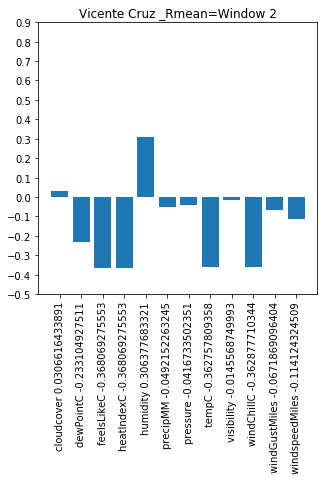

[-0.36756683685965941, -0.11720824049318675, -0.035417849728117803, 0.30996954015104056, 0.081923569100530613, -0.036232234581428352, 0.035433712977082484, -0.37067752675495175, -0.23533306246352334, -0.36769207640584151, -0.059832078716547298, -0.37067752675495175]


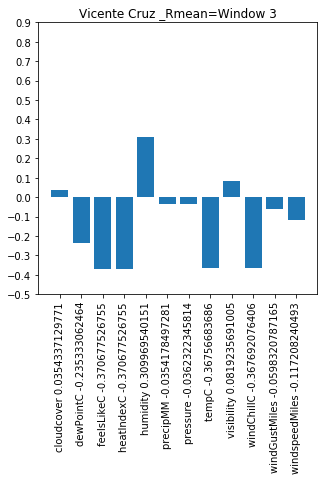

[-0.3636127548031633, -0.099882122958638797, -0.0066224601028757957, 0.30992050717407787, 0.073604882931527671, -0.031443043376218026, 0.039552723507694384, -0.37251776278056131, -0.23396952307243365, -0.36360164474145468, -0.046706275116470471, -0.37251776278056131]


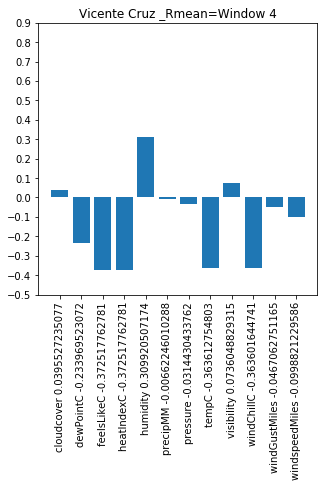

[-0.32062105771669253, -0.063765762667110579, 0.043881672341247534, 0.28590205584790473, 0.04012260612987277, -0.019048167757093996, 0.056951717184946585, -0.34137352822135392, -0.20281918969848248, -0.3203639835642485, 0.0017159157661861325, -0.34137352822135392]


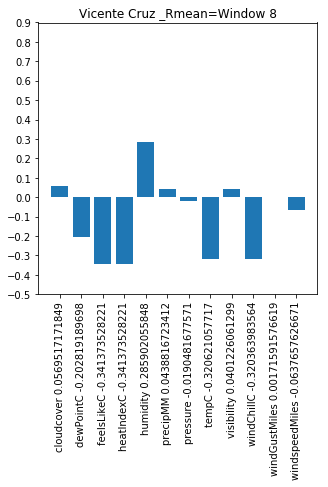

[-0.23614964094359095, 0.0025939253967664764, 0.09149743948067203, 0.22742544773806389, 0.0015573105623032859, -0.027776546641121586, 0.070817358510425199, -0.26181674767292551, -0.13641734239153405, -0.23608134712052475, 0.06720316896690598, -0.26181674767292551]


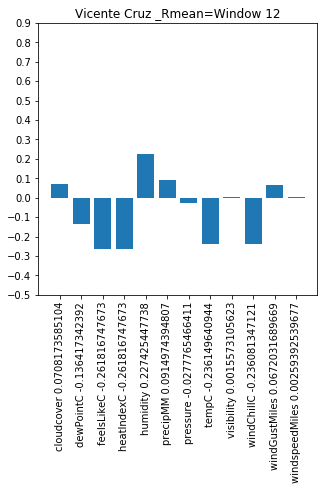

[]


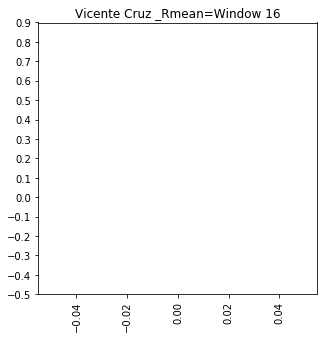

[0.13175562834375093, 0.1923424314558945, 0.18430320887282689, -0.086224407587993671, -0.15778384891496708, -0.13790156914256632, 0.099648040131256957, 0.1333569231615637, 0.11495409334331932, 0.1318115899026841, 0.20417686071683239, 0.1333569231615637]


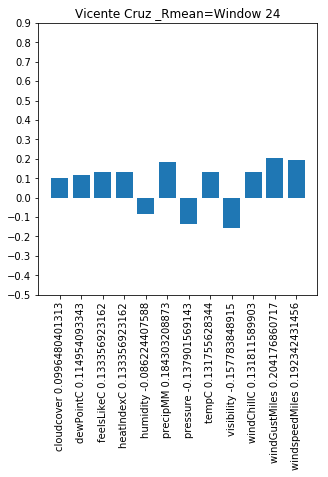

[0.17705818365092615, -0.042575663021333567, -0.015199862550534153, -0.16516445083892928, -0.0046665786735781076, -0.083641357451746612, -0.017468274456771668, 0.20075824902691675, 0.095189211450826594, 0.17724593799901461, -0.093225323300158924, 0.20075824902691675]


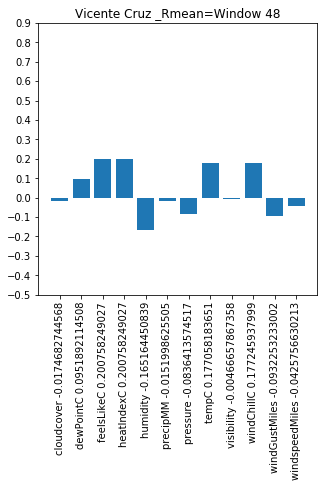

[0.050812996975505065, 0.0034688305582342002, 0.017586057623969552, -0.032642645253136378, -0.043474029956271684, -0.054675156226699786, 0.0026630140018996181, 0.058508087879069574, 0.013199212226511756, 0.051159249684124233, -0.0033481888465800237, 0.058508087879069574]


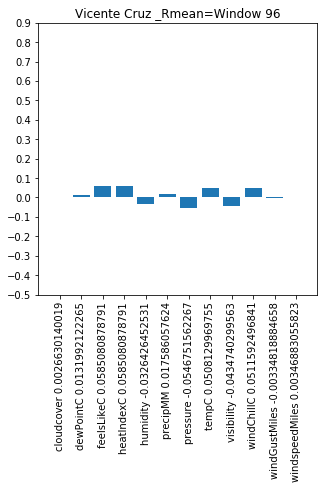

In [75]:
dataset = pd.read_csv("D:\\COLLEGE\\THESIS\\Feature Engineering\\FeatureEngineering_TimeSeries\\For Correlation\\Expanding and Rolling\\CORRELATED_eng_wwo_Vicente Cruz_2015_seasonWet.csv", skipinitialspace = True, encoding = "ISO-8859-1")
features = dataset.columns
STAT = "_Rmean="
print(features)
y = []
COL = []
print(WINDOWS)
for EM in WINDOWS:
    y = []
    COL = []
    ctr = 0
    for f in range(13, len(features)): 
        
        if STAT+ str(EM) in features[f] and features[f].endswith(str(EM),10):
            y.append(dataset[features[f]][0])
            COL.append(features[f].replace(STAT + str(EM), "") + " " + str(y[ctr]))
            ctr = ctr +1 
    print(y)
    getBarPlot(y, ROAD + " "  + STAT + "Window " + str(EM), 5,5,COL)

## Best Window per variable

### Rolling

statusN
statusN    1.0
Name: statusN, dtype: float64


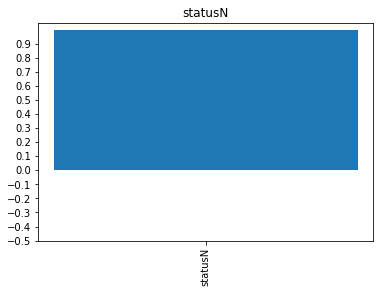

statusS
statusN    1.0
Name: statusN, dtype: float64


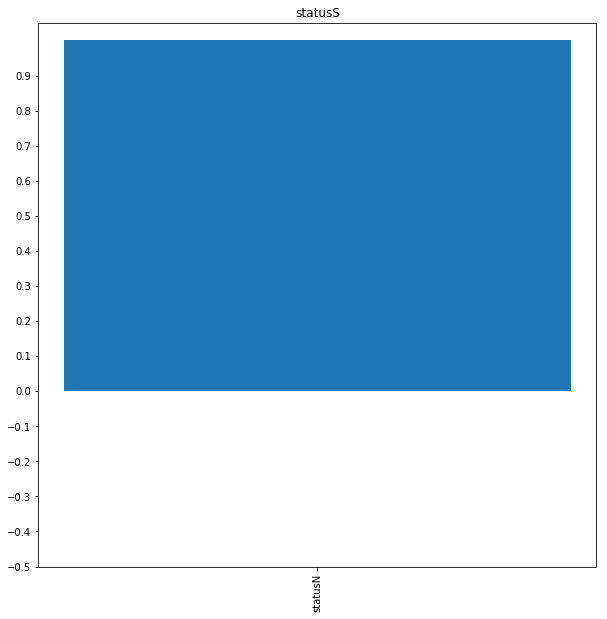

tempC
statusN           1.000000
tempC            -0.357453
tempC_Rmean=2    -0.362758
tempC_Rmean=3    -0.367567
tempC_Rmean=4    -0.363613
tempC_Rmean=8    -0.320621
tempC_Rmean=12   -0.236150
tempC_Rmean=24    0.131756
tempC_Rmean=32    0.317122
tempC_Rmean=48    0.177058
tempC_Rmean=96    0.050813
Name: statusN, dtype: float64


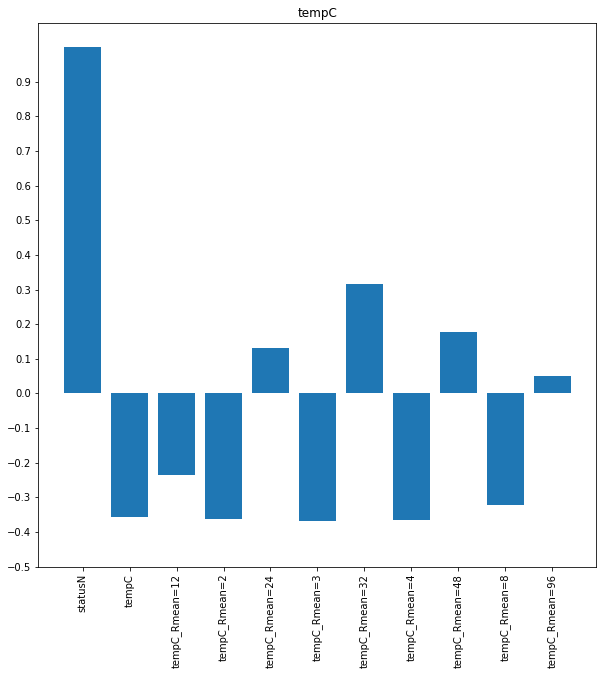

windspeedMiles
statusN                    1.000000
windspeedMiles            -0.123109
windspeedMiles_Rmean=2    -0.114124
windspeedMiles_Rmean=3    -0.117208
windspeedMiles_Rmean=4    -0.099882
windspeedMiles_Rmean=8    -0.063766
windspeedMiles_Rmean=12    0.002594
windspeedMiles_Rmean=24    0.192342
windspeedMiles_Rmean=32    0.175508
windspeedMiles_Rmean=48   -0.042576
windspeedMiles_Rmean=96    0.003469
Name: statusN, dtype: float64


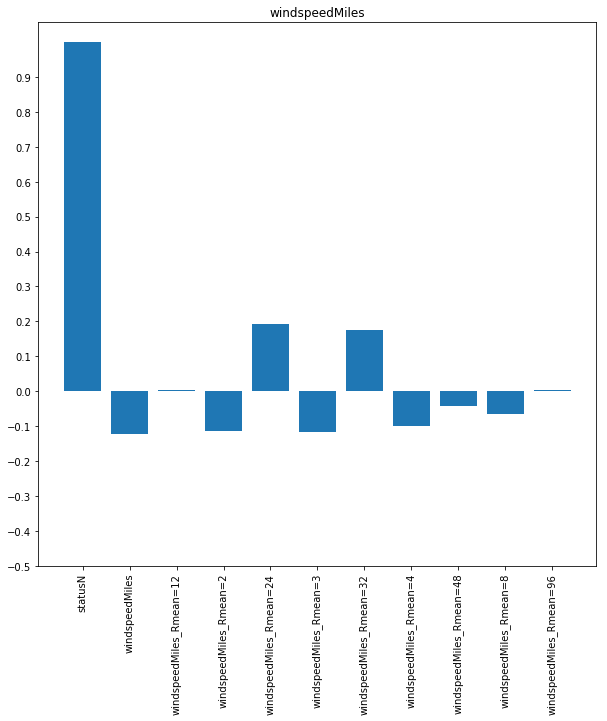

precipMM
statusN              1.000000
precipMM            -0.039585
precipMM_Rmean=2    -0.049215
precipMM_Rmean=3    -0.035418
precipMM_Rmean=4    -0.006622
precipMM_Rmean=8     0.043882
precipMM_Rmean=12    0.091497
precipMM_Rmean=24    0.184303
precipMM_Rmean=32    0.151824
precipMM_Rmean=48   -0.015200
precipMM_Rmean=96    0.017586
Name: statusN, dtype: float64


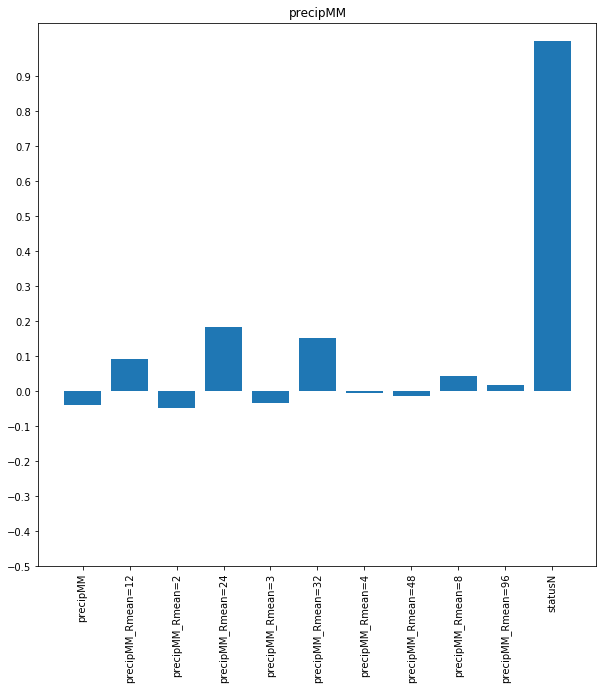

humidity
statusN              1.000000
humidity             0.299851
humidity_Rmean=2     0.306378
humidity_Rmean=3     0.309970
humidity_Rmean=4     0.309921
humidity_Rmean=8     0.285902
humidity_Rmean=12    0.227425
humidity_Rmean=24   -0.086224
humidity_Rmean=32   -0.274721
humidity_Rmean=48   -0.165164
humidity_Rmean=96   -0.032643
Name: statusN, dtype: float64


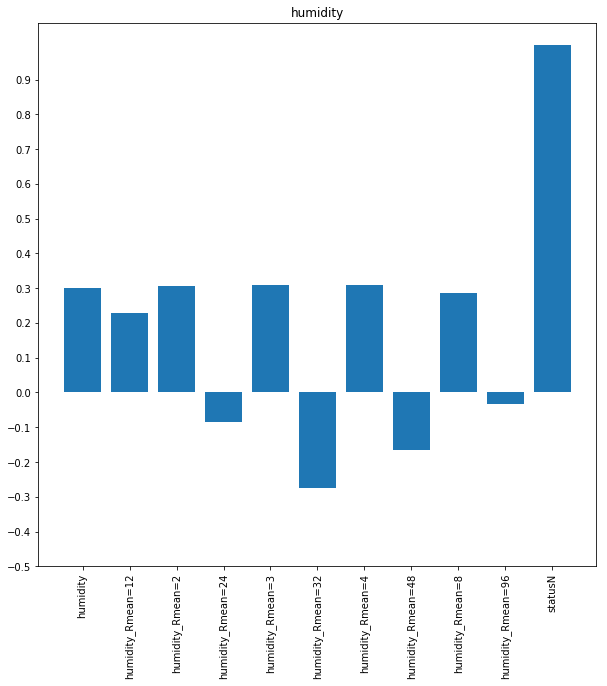

visibility
statusN                1.000000
visibility             0.047359
visibility_Rmean=2    -0.014557
visibility_Rmean=3     0.081924
visibility_Rmean=4     0.073605
visibility_Rmean=8     0.040123
visibility_Rmean=12    0.001557
visibility_Rmean=24   -0.157784
visibility_Rmean=32   -0.140543
visibility_Rmean=48   -0.004667
visibility_Rmean=96   -0.043474
Name: statusN, dtype: float64


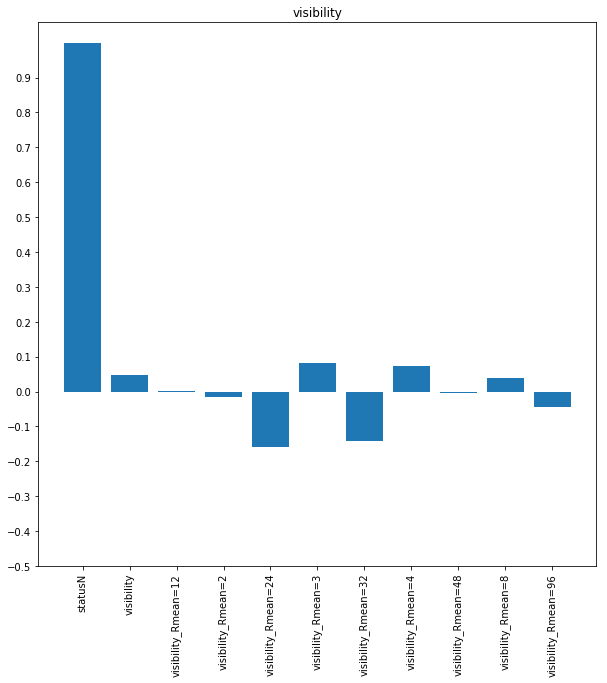

pressure
statusN              1.000000
pressure            -0.047160
pressure_Rmean=2    -0.041673
pressure_Rmean=3    -0.036232
pressure_Rmean=4    -0.031443
pressure_Rmean=8    -0.019048
pressure_Rmean=12   -0.027777
pressure_Rmean=24   -0.137902
pressure_Rmean=32   -0.151268
pressure_Rmean=48   -0.083641
pressure_Rmean=96   -0.054675
Name: statusN, dtype: float64


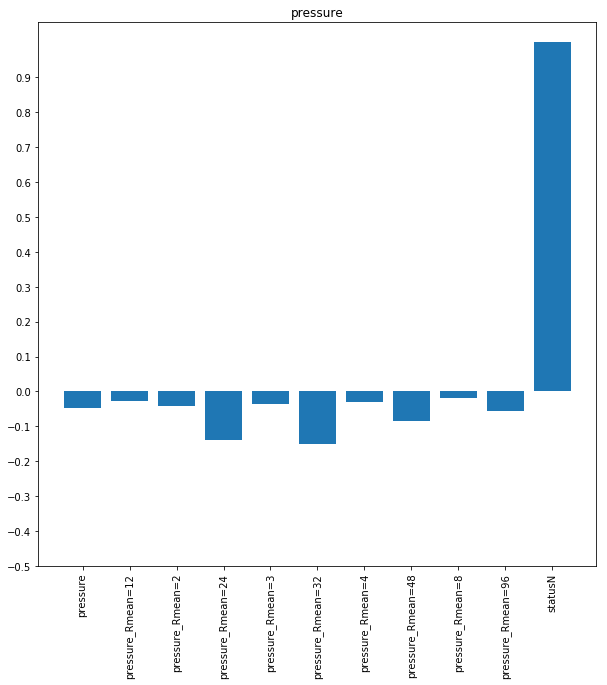

cloudcover
statusN                1.000000
cloudcover             0.025875
cloudcover_Rmean=2     0.030662
cloudcover_Rmean=3     0.035434
cloudcover_Rmean=4     0.039553
cloudcover_Rmean=8     0.056952
cloudcover_Rmean=12    0.070817
cloudcover_Rmean=24    0.099648
cloudcover_Rmean=32    0.085546
cloudcover_Rmean=48   -0.017468
cloudcover_Rmean=96    0.002663
Name: statusN, dtype: float64


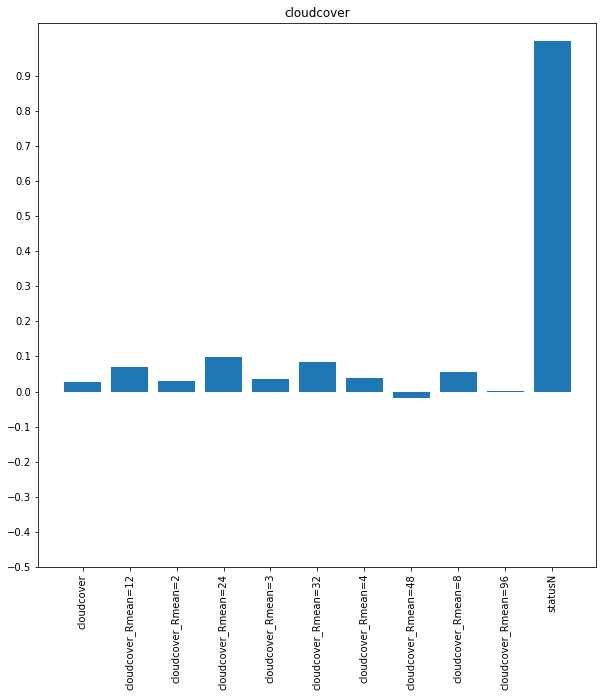

heatIndexC
statusN                1.000000
heatIndexC            -0.360284
heatIndexC_Rmean=2    -0.368069
heatIndexC_Rmean=3    -0.370678
heatIndexC_Rmean=4    -0.372518
heatIndexC_Rmean=8    -0.341374
heatIndexC_Rmean=12   -0.261817
heatIndexC_Rmean=24    0.133357
heatIndexC_Rmean=32    0.335088
heatIndexC_Rmean=48    0.200758
heatIndexC_Rmean=96    0.058508
Name: statusN, dtype: float64


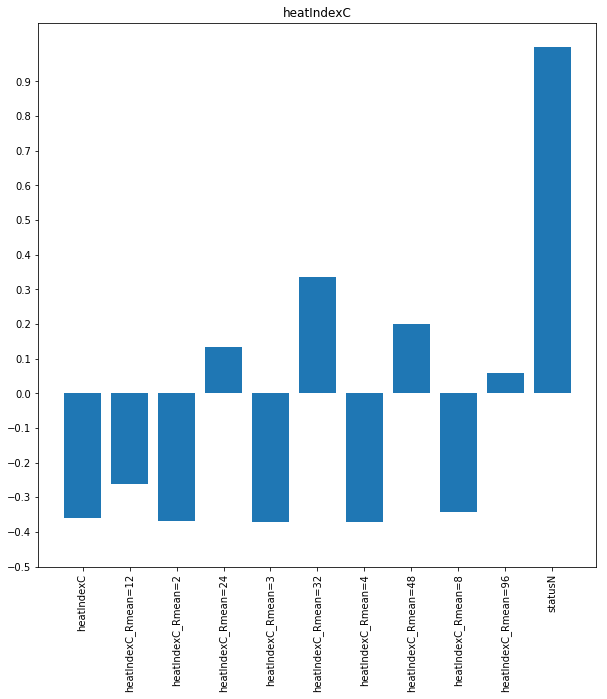

dewPointC
statusN               1.000000
dewPointC            -0.228120
dewPointC_Rmean=2    -0.233105
dewPointC_Rmean=3    -0.235333
dewPointC_Rmean=4    -0.233970
dewPointC_Rmean=8    -0.202819
dewPointC_Rmean=12   -0.136417
dewPointC_Rmean=24    0.114954
dewPointC_Rmean=32    0.184981
dewPointC_Rmean=48    0.095189
dewPointC_Rmean=96    0.013199
Name: statusN, dtype: float64


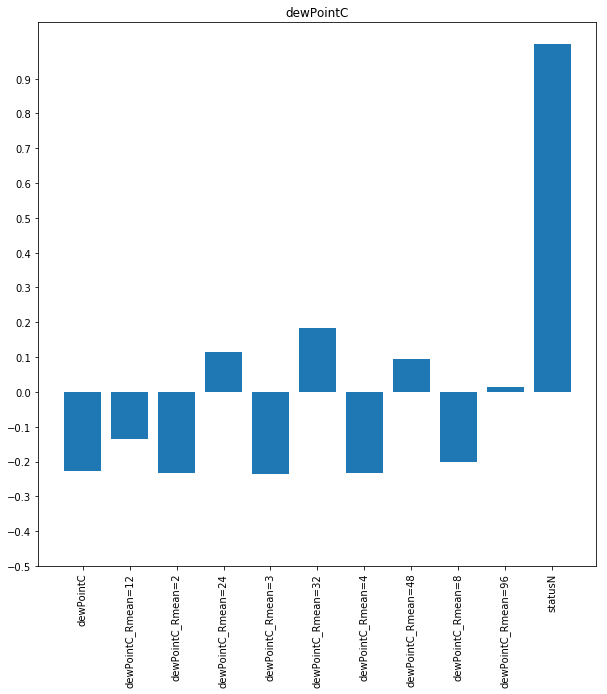

windChillC
statusN                1.000000
windChillC            -0.357651
windChillC_Rmean=2    -0.362878
windChillC_Rmean=3    -0.367692
windChillC_Rmean=4    -0.363602
windChillC_Rmean=8    -0.320364
windChillC_Rmean=12   -0.236081
windChillC_Rmean=24    0.131812
windChillC_Rmean=32    0.317403
windChillC_Rmean=48    0.177246
windChillC_Rmean=96    0.051159
Name: statusN, dtype: float64


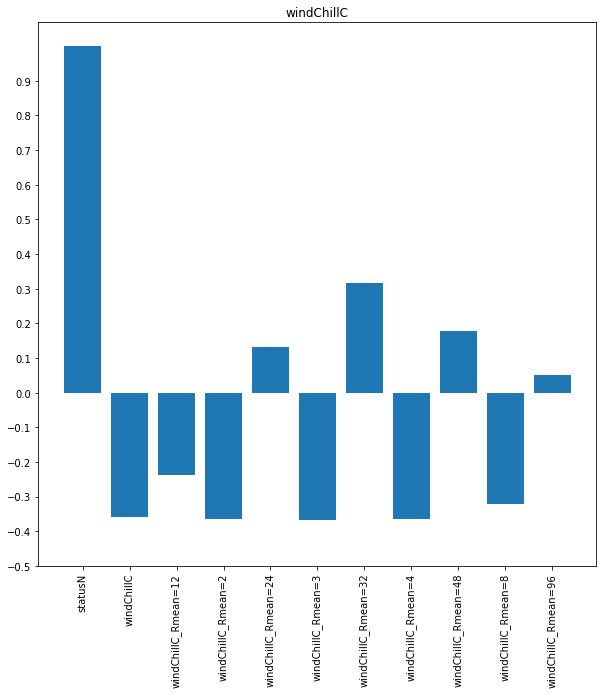

windGustMiles
statusN                   1.000000
windGustMiles            -0.070466
windGustMiles_Rmean=2    -0.067187
windGustMiles_Rmean=3    -0.059832
windGustMiles_Rmean=4    -0.046706
windGustMiles_Rmean=8     0.001716
windGustMiles_Rmean=12    0.067203
windGustMiles_Rmean=24    0.204177
windGustMiles_Rmean=32    0.143313
windGustMiles_Rmean=48   -0.093225
windGustMiles_Rmean=96   -0.003348
Name: statusN, dtype: float64


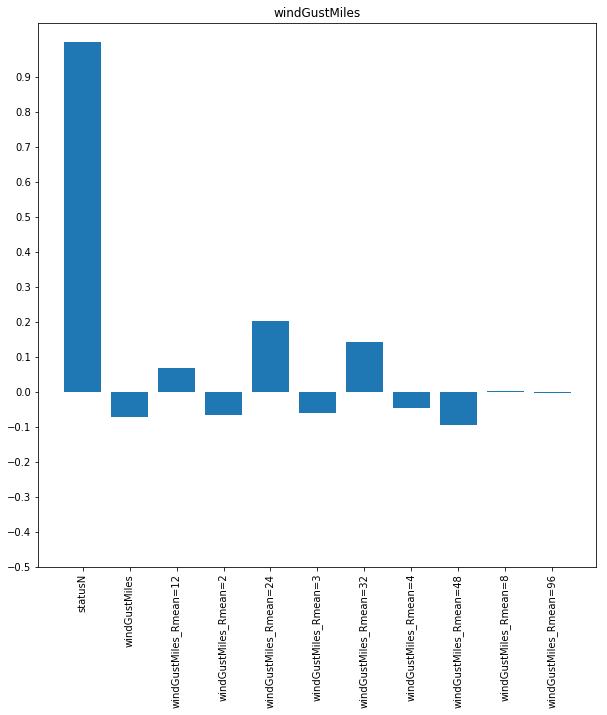

feelsLikeC
statusN                1.000000
feelsLikeC            -0.360284
feelsLikeC_Rmean=2    -0.368069
feelsLikeC_Rmean=3    -0.370678
feelsLikeC_Rmean=4    -0.372518
feelsLikeC_Rmean=8    -0.341374
feelsLikeC_Rmean=12   -0.261817
feelsLikeC_Rmean=24    0.133357
feelsLikeC_Rmean=32    0.335088
feelsLikeC_Rmean=48    0.200758
feelsLikeC_Rmean=96    0.058508
Name: statusN, dtype: float64


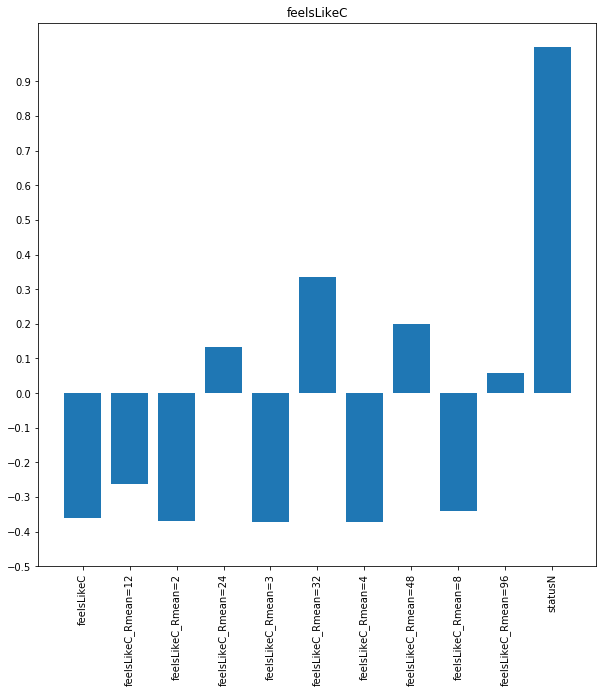

In [8]:
features = FEATURES
data = rolling_weather
data_features = data.columns
for f in features:
    print(f)
    merged_dataset = pd.DataFrame(expanding_merged['statusN'])
    for n in range(0, len(data_features)):
        if f == data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]]], axis = 1)
        elif f+"_Rmean" in data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]]], axis = 1)
#     print(merged_dataset.head())
    corr = merged_dataset.corr(method='spearman')
    y = corr['statusN']
    print(y)
    getBarPlot(y, f, 10,10,corr.columns)

### Expanding

statusN
statusN                      1.000000
Expanding Mean 2 statusN     0.995798
Expanding Mean 3 statusN     0.988118
Expanding Mean 4 statusN     0.978788
Expanding Mean 8 statusN     0.934377
Expanding Mean 12 statusN    0.903967
Expanding Mean 16 statusN    0.862574
Expanding Mean 24 statusN    0.849404
Expanding Mean 48 statusN    0.706457
Expanding Mean 96 statusN    0.640689
Name: statusN, dtype: float64


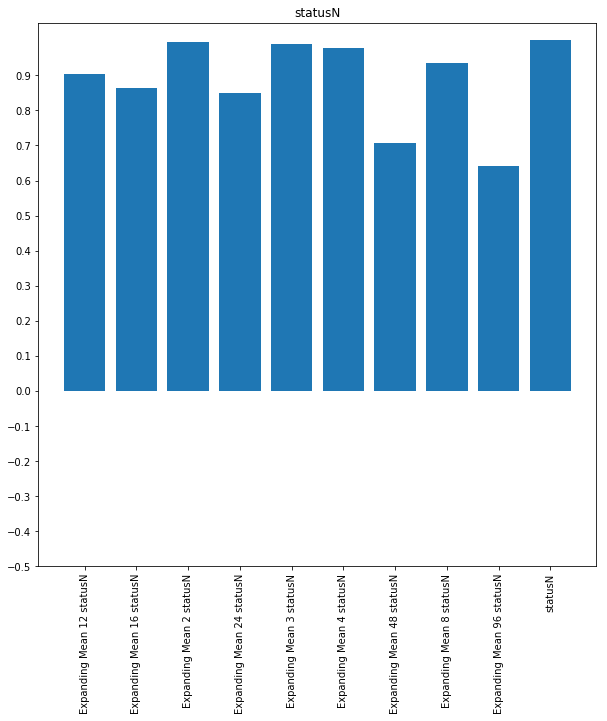

statusS
statusN                      1.000000
statusS                      0.110681
Expanding Mean 2 statusS     0.110231
Expanding Mean 3 statusS     0.111538
Expanding Mean 4 statusS     0.108035
Expanding Mean 8 statusS     0.104021
Expanding Mean 12 statusS    0.099941
Expanding Mean 16 statusS    0.096429
Expanding Mean 24 statusS    0.096063
Expanding Mean 48 statusS    0.108140
Expanding Mean 96 statusS    0.154334
Name: statusN, dtype: float64


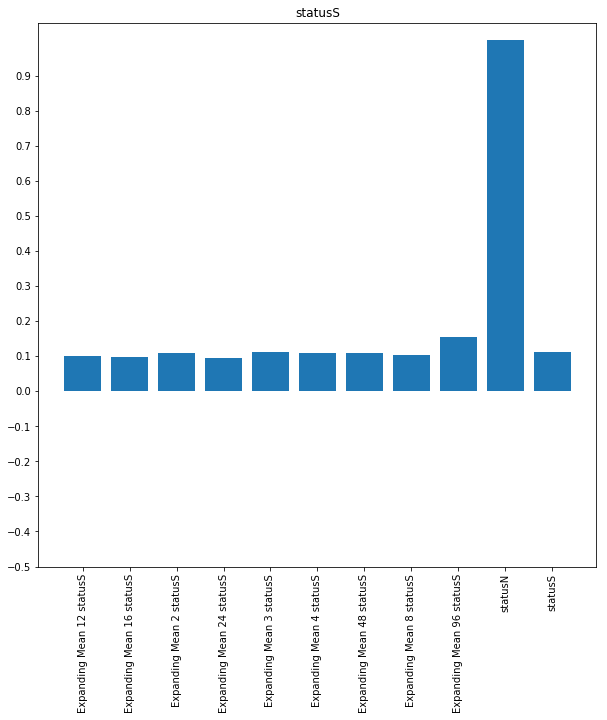

tempC
statusN                    1.000000
tempC                     -0.357453
Expanding Mean 2 tempC    -0.357733
Expanding Mean 3 tempC    -0.359750
Expanding Mean 4 tempC    -0.357867
Expanding Mean 8 tempC    -0.360912
Expanding Mean 12 tempC   -0.363348
Expanding Mean 16 tempC   -0.354267
Expanding Mean 24 tempC   -0.373617
Expanding Mean 48 tempC   -0.327969
Expanding Mean 96 tempC   -0.295228
Name: statusN, dtype: float64


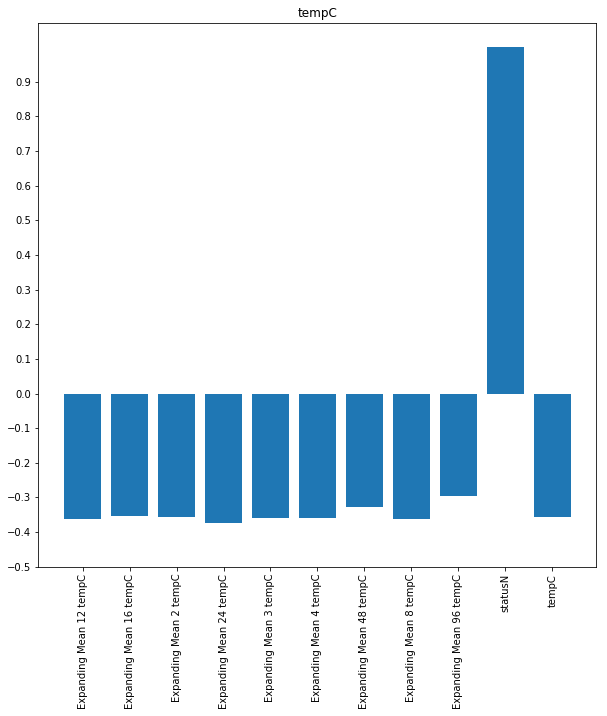

windspeedMiles
statusN                             1.000000
windspeedMiles                     -0.123109
Expanding Mean 2 windspeedMiles    -0.123022
Expanding Mean 3 windspeedMiles    -0.121990
Expanding Mean 4 windspeedMiles    -0.122771
Expanding Mean 8 windspeedMiles    -0.118234
Expanding Mean 12 windspeedMiles   -0.116466
Expanding Mean 16 windspeedMiles   -0.111689
Expanding Mean 24 windspeedMiles   -0.102362
Expanding Mean 48 windspeedMiles   -0.102325
Expanding Mean 96 windspeedMiles   -0.022020
Name: statusN, dtype: float64


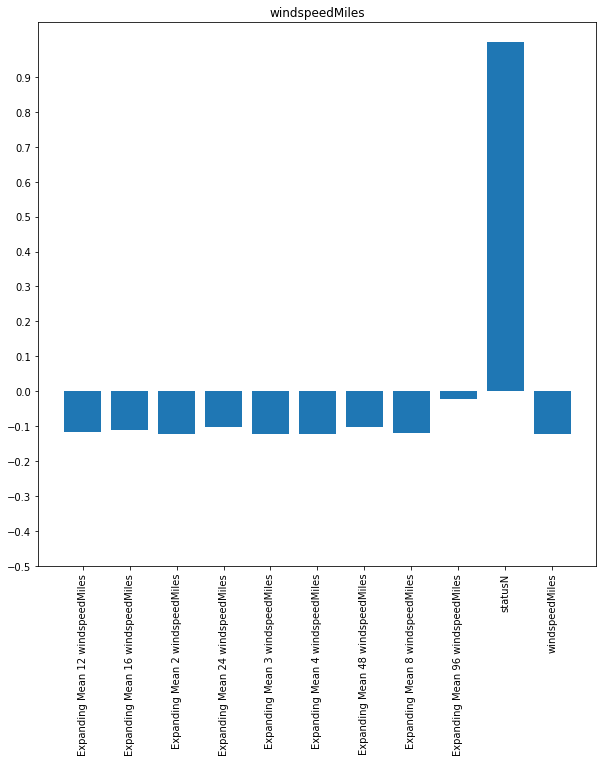

precipMM
statusN                       1.000000
precipMM                     -0.039613
Expanding Mean 2 precipMM    -0.039092
Expanding Mean 3 precipMM    -0.036699
Expanding Mean 4 precipMM    -0.037420
Expanding Mean 8 precipMM    -0.029035
Expanding Mean 12 precipMM   -0.025411
Expanding Mean 16 precipMM   -0.023322
Expanding Mean 24 precipMM    0.001922
Expanding Mean 48 precipMM   -0.017520
Expanding Mean 96 precipMM    0.004811
Name: statusN, dtype: float64


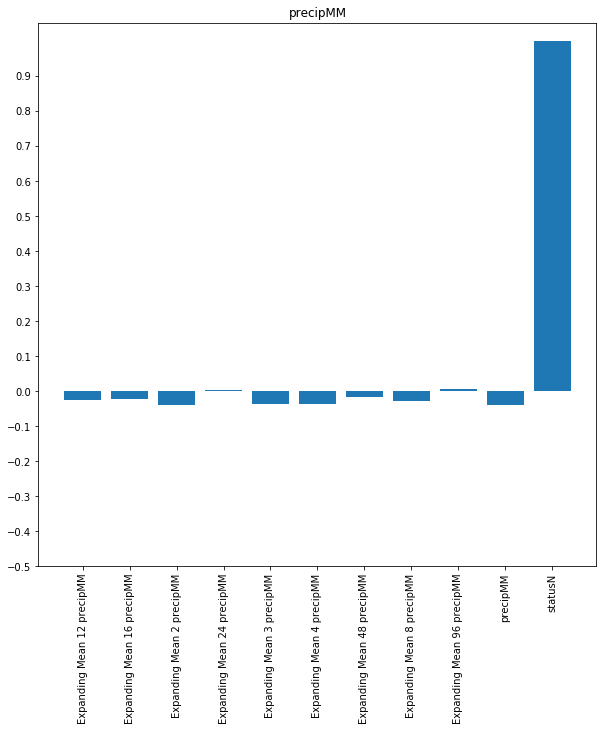

humidity
statusN                       1.000000
humidity                      0.299851
Expanding Mean 2 humidity     0.300683
Expanding Mean 3 humidity     0.302360
Expanding Mean 4 humidity     0.302715
Expanding Mean 8 humidity     0.305170
Expanding Mean 12 humidity    0.308281
Expanding Mean 16 humidity    0.302514
Expanding Mean 24 humidity    0.320867
Expanding Mean 48 humidity    0.294480
Expanding Mean 96 humidity    0.265362
Name: statusN, dtype: float64


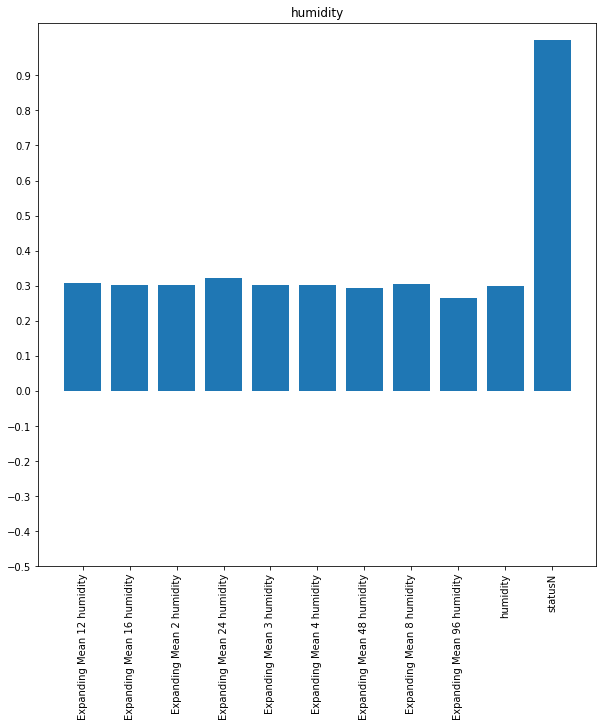

visibility
statusN                         1.000000
visibility                      0.047359
Expanding Mean 2 visibility     0.047296
Expanding Mean 3 visibility     0.046458
Expanding Mean 4 visibility     0.047010
Expanding Mean 8 visibility     0.044465
Expanding Mean 12 visibility    0.043685
Expanding Mean 16 visibility    0.035296
Expanding Mean 24 visibility    0.027744
Expanding Mean 48 visibility    0.051925
Expanding Mean 96 visibility    0.029635
Name: statusN, dtype: float64


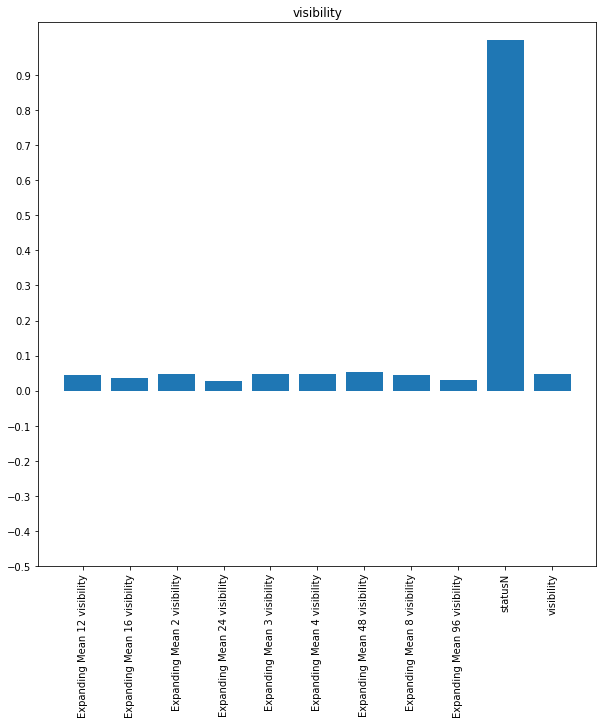

pressure
statusN                       1.000000
pressure                     -0.047160
Expanding Mean 2 pressure    -0.047051
Expanding Mean 3 pressure    -0.045043
Expanding Mean 4 pressure    -0.046674
Expanding Mean 8 pressure    -0.041060
Expanding Mean 12 pressure   -0.038326
Expanding Mean 16 pressure   -0.035005
Expanding Mean 24 pressure   -0.023264
Expanding Mean 48 pressure   -0.018368
Expanding Mean 96 pressure   -0.044347
Name: statusN, dtype: float64


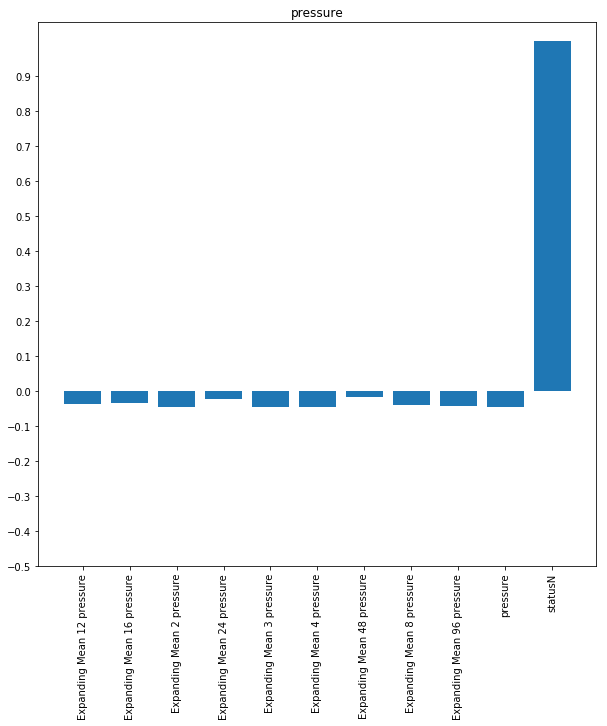

cloudcover
statusN                         1.000000
cloudcover                      0.025875
Expanding Mean 2 cloudcover     0.026752
Expanding Mean 3 cloudcover     0.027596
Expanding Mean 4 cloudcover     0.028434
Expanding Mean 8 cloudcover     0.032062
Expanding Mean 12 cloudcover    0.034846
Expanding Mean 16 cloudcover    0.037194
Expanding Mean 24 cloudcover    0.048122
Expanding Mean 48 cloudcover    0.049647
Expanding Mean 96 cloudcover    0.040929
Name: statusN, dtype: float64


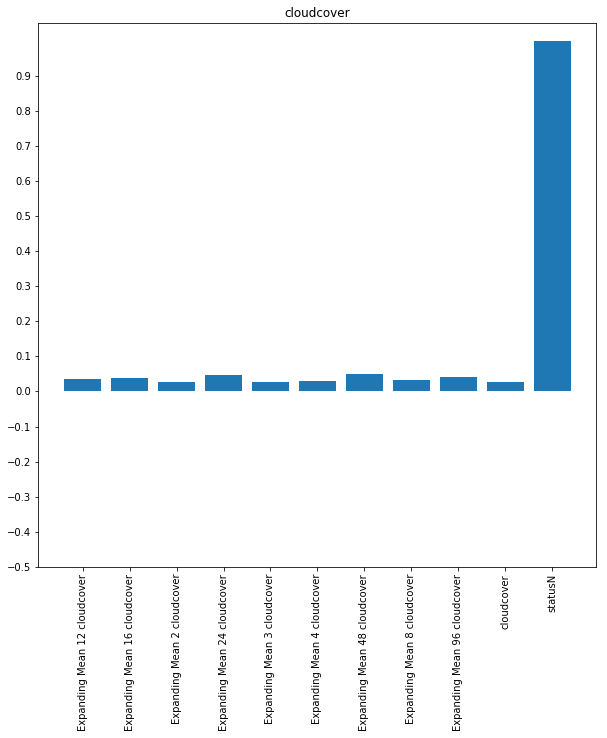

heatIndexC
statusN                         1.000000
heatIndexC                     -0.360284
Expanding Mean 2 heatIndexC    -0.361136
Expanding Mean 3 heatIndexC    -0.363429
Expanding Mean 4 heatIndexC    -0.362985
Expanding Mean 8 heatIndexC    -0.367411
Expanding Mean 12 heatIndexC   -0.370133
Expanding Mean 16 heatIndexC   -0.363066
Expanding Mean 24 heatIndexC   -0.385568
Expanding Mean 48 heatIndexC   -0.337079
Expanding Mean 96 heatIndexC   -0.299899
Name: statusN, dtype: float64


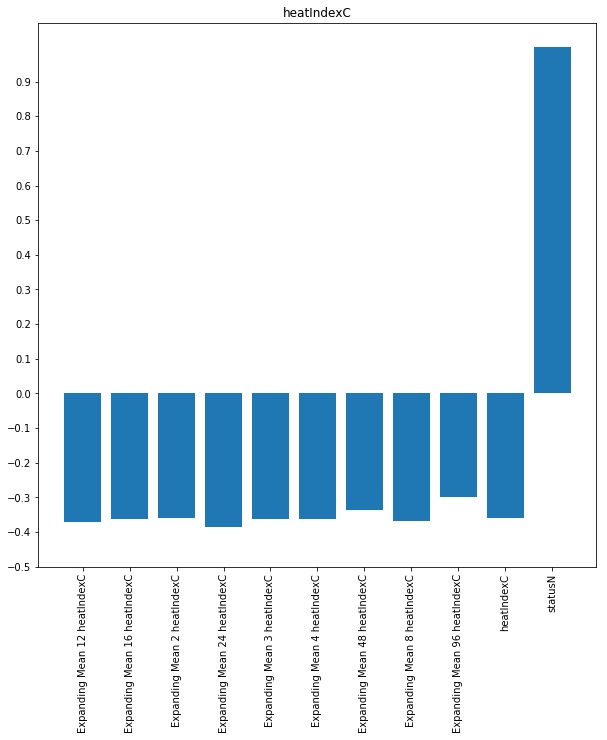

dewPointC
statusN                        1.000000
dewPointC                     -0.228120
Expanding Mean 2 dewPointC    -0.228197
Expanding Mean 3 dewPointC    -0.231427
Expanding Mean 4 dewPointC    -0.228381
Expanding Mean 8 dewPointC    -0.229081
Expanding Mean 12 dewPointC   -0.234970
Expanding Mean 16 dewPointC   -0.219488
Expanding Mean 24 dewPointC   -0.226981
Expanding Mean 48 dewPointC   -0.174616
Expanding Mean 96 dewPointC   -0.133409
Name: statusN, dtype: float64


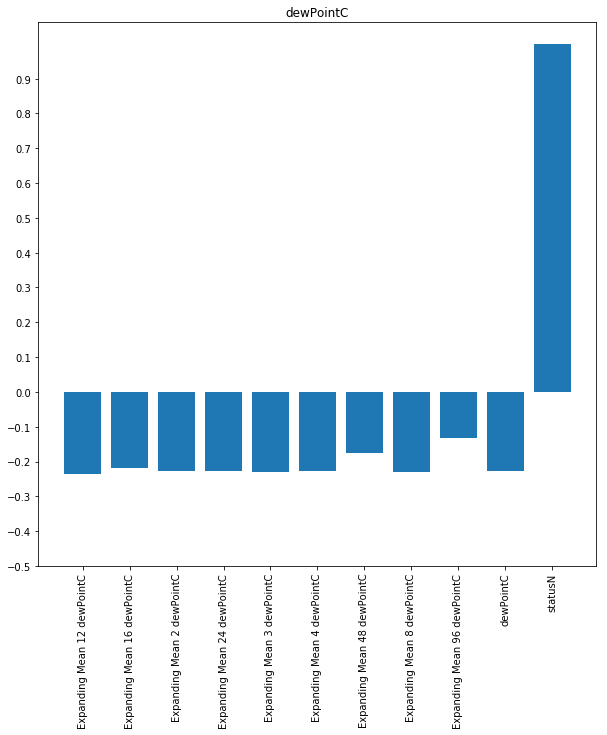

windChillC
statusN                         1.000000
windChillC                     -0.357651
Expanding Mean 2 windChillC    -0.357930
Expanding Mean 3 windChillC    -0.359969
Expanding Mean 4 windChillC    -0.358056
Expanding Mean 8 windChillC    -0.361116
Expanding Mean 12 windChillC   -0.363513
Expanding Mean 16 windChillC   -0.354332
Expanding Mean 24 windChillC   -0.373801
Expanding Mean 48 windChillC   -0.328025
Expanding Mean 96 windChillC   -0.295139
Name: statusN, dtype: float64


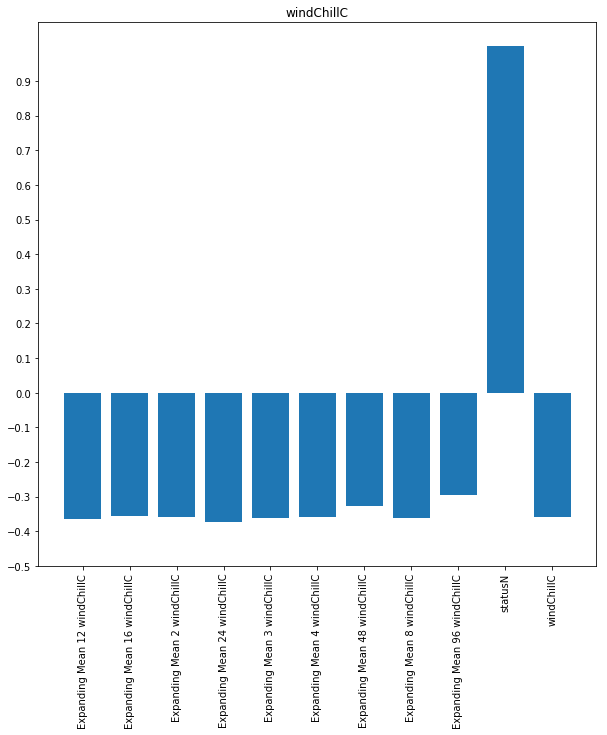

windGustMiles
statusN                            1.000000
windGustMiles                     -0.070466
Expanding Mean 2 windGustMiles    -0.070243
Expanding Mean 3 windGustMiles    -0.068389
Expanding Mean 4 windGustMiles    -0.069306
Expanding Mean 8 windGustMiles    -0.064062
Expanding Mean 12 windGustMiles   -0.059882
Expanding Mean 16 windGustMiles   -0.054459
Expanding Mean 24 windGustMiles   -0.042115
Expanding Mean 48 windGustMiles   -0.046413
Expanding Mean 96 windGustMiles    0.033956
Name: statusN, dtype: float64


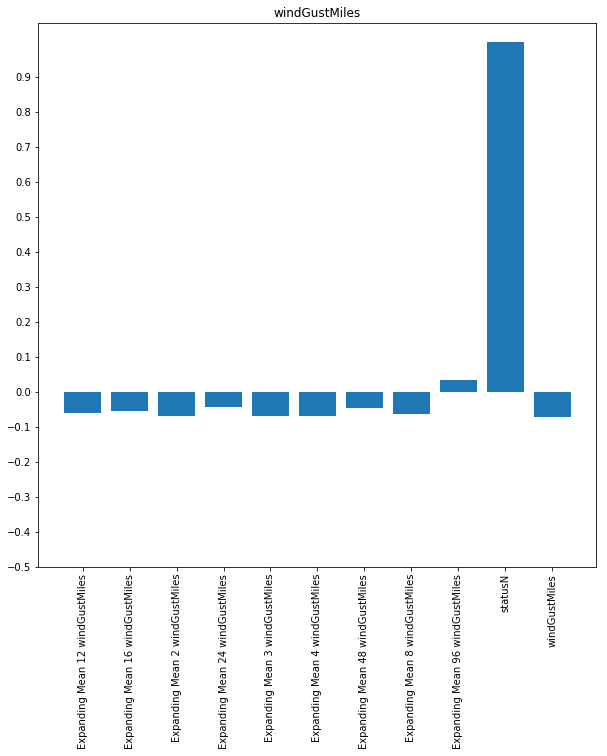

feelsLikeC
statusN                         1.000000
feelsLikeC                     -0.360284
Expanding Mean 2 feelsLikeC    -0.361136
Expanding Mean 3 feelsLikeC    -0.363429
Expanding Mean 4 feelsLikeC    -0.362985
Expanding Mean 8 feelsLikeC    -0.367411
Expanding Mean 12 feelsLikeC   -0.370133
Expanding Mean 16 feelsLikeC   -0.363066
Expanding Mean 24 feelsLikeC   -0.385568
Expanding Mean 48 feelsLikeC   -0.337079
Expanding Mean 96 feelsLikeC   -0.299899
Name: statusN, dtype: float64


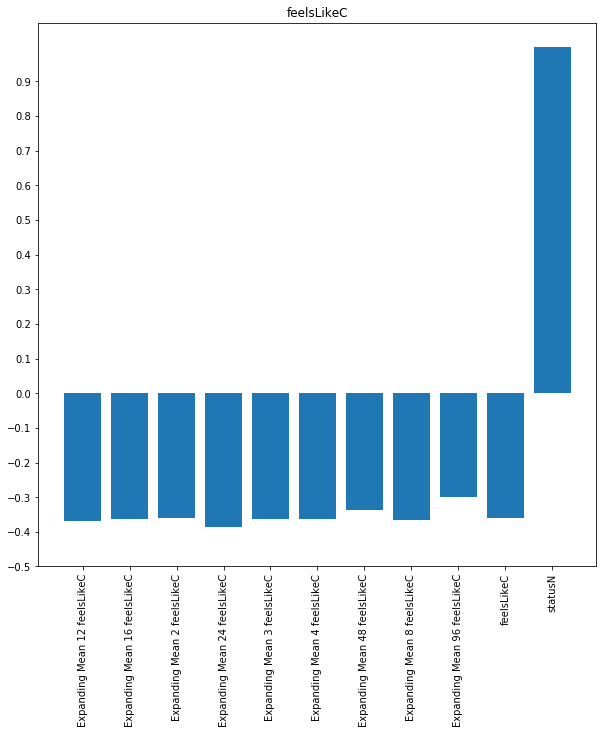

In [9]:
features = FEATURES
data = expanding_merged
data_features = data.columns
for f in features:
    print(f)
    merged_dataset = pd.DataFrame(expanding_merged['statusN'])
    for n in range(0, len(data_features)):
        if f == data_features[n] and f != "statusN":
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]]], axis = 1)
        elif "Expanding Mean " in data_features[n] and f in data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]]], axis = 1)
#     print(merged_dataset.head())
    corr = merged_dataset.corr(method='spearman')
    y = corr['statusN']
    print(y)
    getBarPlot(y, f, 10, 10, corr.columns)

## SINGLE Var

statusN
Index(['statusN', 'Expanding Mean 2 statusN', 'Expanding Mean 3 statusN',
       'Expanding Mean 4 statusN', 'Expanding Mean 8 statusN',
       'Expanding Mean 12 statusN', 'Expanding Mean 16 statusN',
       'Expanding Mean 24 statusN', 'Expanding Mean 48 statusN',
       'Expanding Mean 96 statusN'],
      dtype='object')
statusN                      1.000000
Expanding Mean 2 statusN     0.995798
Expanding Mean 3 statusN     0.988118
Expanding Mean 4 statusN     0.978788
Expanding Mean 8 statusN     0.934377
Expanding Mean 12 statusN    0.903967
Expanding Mean 16 statusN    0.862574
Expanding Mean 24 statusN    0.849404
Expanding Mean 48 statusN    0.706457
Expanding Mean 96 statusN    0.640689
Name: statusN, dtype: float64


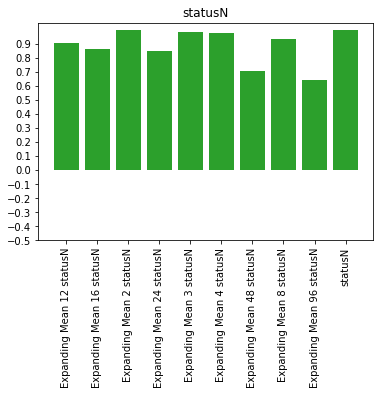

statusS
Index(['statusN', 'statusS', 'Expanding Mean 2 statusS',
       'Expanding Mean 3 statusS', 'Expanding Mean 4 statusS',
       'Expanding Mean 8 statusS', 'Expanding Mean 12 statusS',
       'Expanding Mean 16 statusS', 'Expanding Mean 24 statusS',
       'Expanding Mean 48 statusS', 'Expanding Mean 96 statusS'],
      dtype='object')
statusN                      1.000000
statusS                      0.110681
Expanding Mean 2 statusS     0.110231
Expanding Mean 3 statusS     0.111538
Expanding Mean 4 statusS     0.108035
Expanding Mean 8 statusS     0.104021
Expanding Mean 12 statusS    0.099941
Expanding Mean 16 statusS    0.096429
Expanding Mean 24 statusS    0.096063
Expanding Mean 48 statusS    0.108140
Expanding Mean 96 statusS    0.154334
Name: statusN, dtype: float64


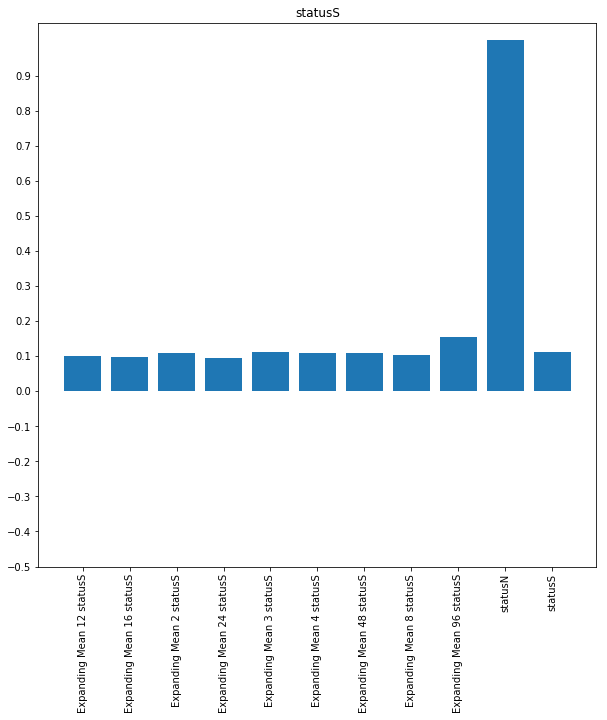

tempC
Index(['statusN', 'tempC', 'Expanding Mean 2 tempC', 'Expanding Mean 3 tempC',
       'Expanding Mean 4 tempC', 'Expanding Mean 8 tempC',
       'Expanding Mean 12 tempC', 'Expanding Mean 16 tempC',
       'Expanding Mean 24 tempC', 'Expanding Mean 48 tempC',
       'Expanding Mean 96 tempC'],
      dtype='object')
statusN                    1.000000
tempC                     -0.357453
Expanding Mean 2 tempC    -0.357733
Expanding Mean 3 tempC    -0.359750
Expanding Mean 4 tempC    -0.357867
Expanding Mean 8 tempC    -0.360912
Expanding Mean 12 tempC   -0.363348
Expanding Mean 16 tempC   -0.354267
Expanding Mean 24 tempC   -0.373617
Expanding Mean 48 tempC   -0.327969
Expanding Mean 96 tempC   -0.295228
Name: statusN, dtype: float64


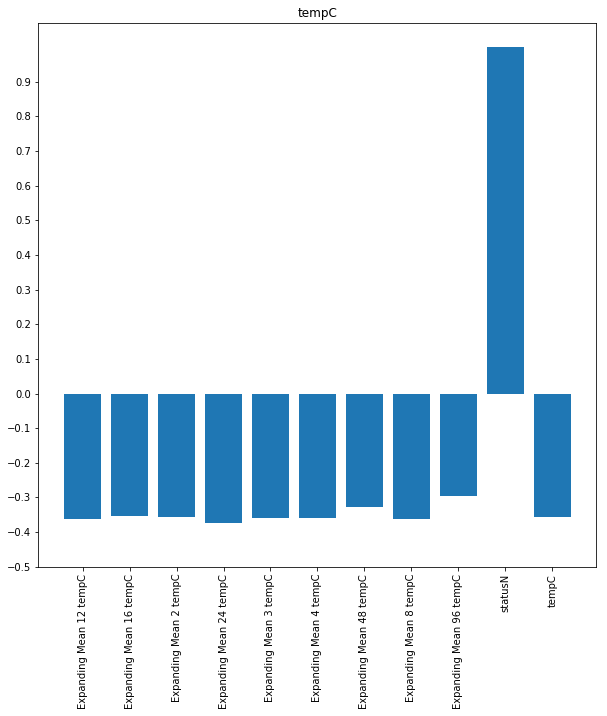

windspeedMiles
Index(['statusN', 'windspeedMiles', 'Expanding Mean 2 windspeedMiles',
       'Expanding Mean 3 windspeedMiles', 'Expanding Mean 4 windspeedMiles',
       'Expanding Mean 8 windspeedMiles', 'Expanding Mean 12 windspeedMiles',
       'Expanding Mean 16 windspeedMiles', 'Expanding Mean 24 windspeedMiles',
       'Expanding Mean 48 windspeedMiles', 'Expanding Mean 96 windspeedMiles'],
      dtype='object')
statusN                             1.000000
windspeedMiles                     -0.123109
Expanding Mean 2 windspeedMiles    -0.123022
Expanding Mean 3 windspeedMiles    -0.121990
Expanding Mean 4 windspeedMiles    -0.122771
Expanding Mean 8 windspeedMiles    -0.118234
Expanding Mean 12 windspeedMiles   -0.116466
Expanding Mean 16 windspeedMiles   -0.111689
Expanding Mean 24 windspeedMiles   -0.102362
Expanding Mean 48 windspeedMiles   -0.102325
Expanding Mean 96 windspeedMiles   -0.022020
Name: statusN, dtype: float64


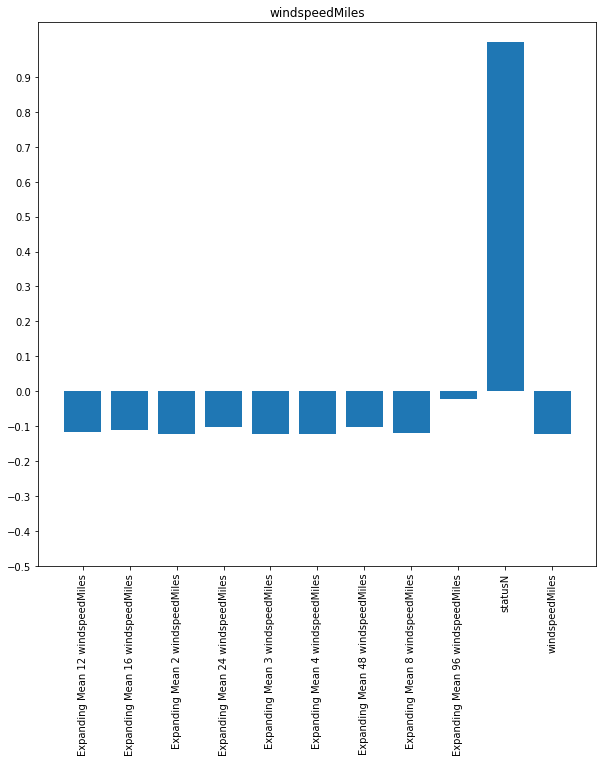

precipMM
Index(['statusN', 'precipMM', 'Expanding Mean 2 precipMM',
       'Expanding Mean 3 precipMM', 'Expanding Mean 4 precipMM',
       'Expanding Mean 8 precipMM', 'Expanding Mean 12 precipMM',
       'Expanding Mean 16 precipMM', 'Expanding Mean 24 precipMM',
       'Expanding Mean 48 precipMM', 'Expanding Mean 96 precipMM'],
      dtype='object')
statusN                       1.000000
precipMM                     -0.039613
Expanding Mean 2 precipMM    -0.039092
Expanding Mean 3 precipMM    -0.036699
Expanding Mean 4 precipMM    -0.037420
Expanding Mean 8 precipMM    -0.029035
Expanding Mean 12 precipMM   -0.025411
Expanding Mean 16 precipMM   -0.023322
Expanding Mean 24 precipMM    0.001922
Expanding Mean 48 precipMM   -0.017520
Expanding Mean 96 precipMM    0.004811
Name: statusN, dtype: float64


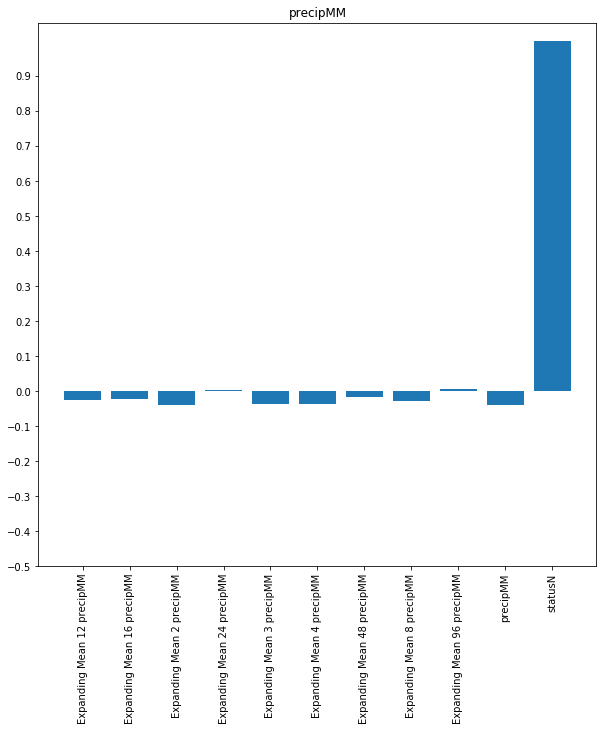

humidity
Index(['statusN', 'humidity', 'Expanding Mean 2 humidity',
       'Expanding Mean 3 humidity', 'Expanding Mean 4 humidity',
       'Expanding Mean 8 humidity', 'Expanding Mean 12 humidity',
       'Expanding Mean 16 humidity', 'Expanding Mean 24 humidity',
       'Expanding Mean 48 humidity', 'Expanding Mean 96 humidity'],
      dtype='object')
statusN                       1.000000
humidity                      0.299851
Expanding Mean 2 humidity     0.300683
Expanding Mean 3 humidity     0.302360
Expanding Mean 4 humidity     0.302715
Expanding Mean 8 humidity     0.305170
Expanding Mean 12 humidity    0.308281
Expanding Mean 16 humidity    0.302514
Expanding Mean 24 humidity    0.320867
Expanding Mean 48 humidity    0.294480
Expanding Mean 96 humidity    0.265362
Name: statusN, dtype: float64


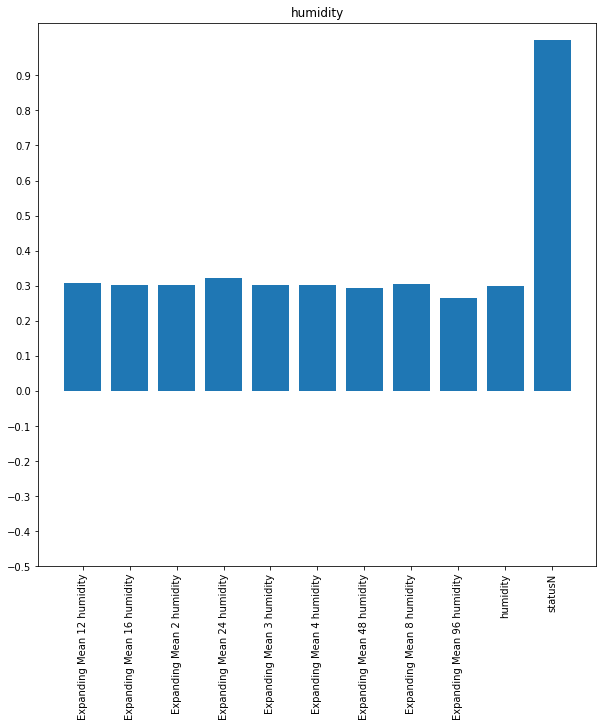

visibility
Index(['statusN', 'visibility', 'Expanding Mean 2 visibility',
       'Expanding Mean 3 visibility', 'Expanding Mean 4 visibility',
       'Expanding Mean 8 visibility', 'Expanding Mean 12 visibility',
       'Expanding Mean 16 visibility', 'Expanding Mean 24 visibility',
       'Expanding Mean 48 visibility', 'Expanding Mean 96 visibility'],
      dtype='object')
statusN                         1.000000
visibility                      0.047359
Expanding Mean 2 visibility     0.047296
Expanding Mean 3 visibility     0.046458
Expanding Mean 4 visibility     0.047010
Expanding Mean 8 visibility     0.044465
Expanding Mean 12 visibility    0.043685
Expanding Mean 16 visibility    0.035296
Expanding Mean 24 visibility    0.027744
Expanding Mean 48 visibility    0.051925
Expanding Mean 96 visibility    0.029635
Name: statusN, dtype: float64


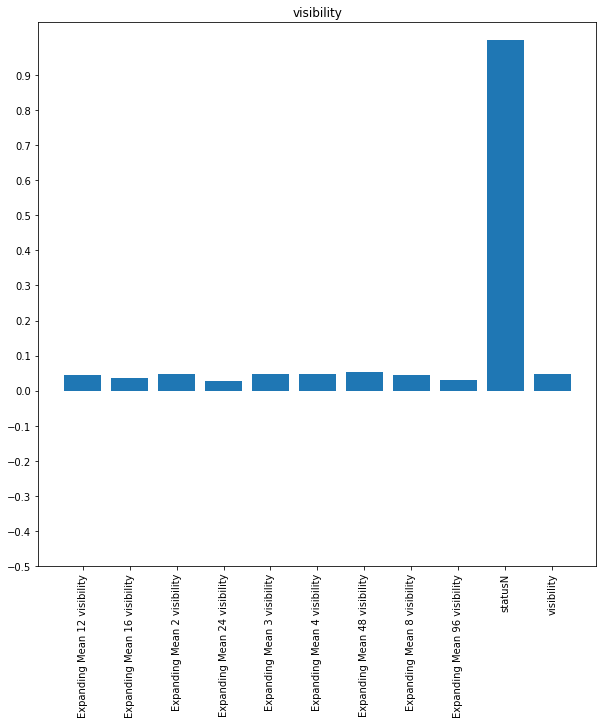

pressure
Index(['statusN', 'pressure', 'Expanding Mean 2 pressure',
       'Expanding Mean 3 pressure', 'Expanding Mean 4 pressure',
       'Expanding Mean 8 pressure', 'Expanding Mean 12 pressure',
       'Expanding Mean 16 pressure', 'Expanding Mean 24 pressure',
       'Expanding Mean 48 pressure', 'Expanding Mean 96 pressure'],
      dtype='object')
statusN                       1.000000
pressure                     -0.047160
Expanding Mean 2 pressure    -0.047051
Expanding Mean 3 pressure    -0.045043
Expanding Mean 4 pressure    -0.046674
Expanding Mean 8 pressure    -0.041060
Expanding Mean 12 pressure   -0.038326
Expanding Mean 16 pressure   -0.035005
Expanding Mean 24 pressure   -0.023264
Expanding Mean 48 pressure   -0.018368
Expanding Mean 96 pressure   -0.044347
Name: statusN, dtype: float64


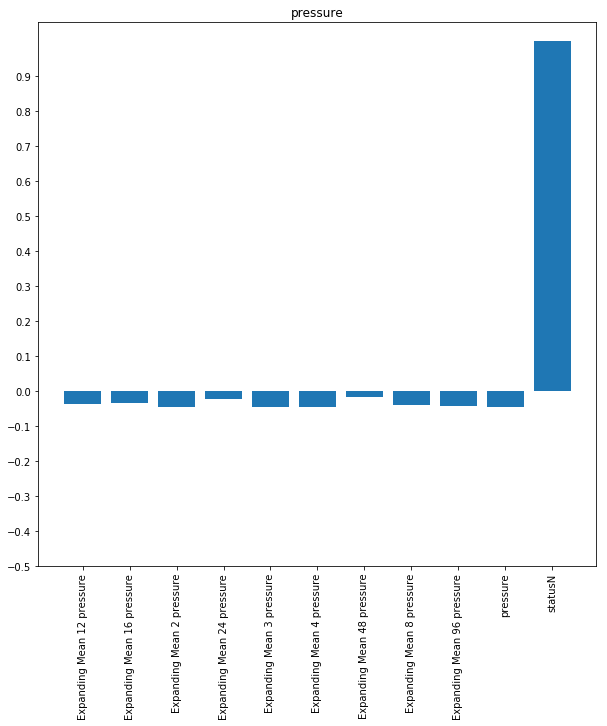

cloudcover
Index(['statusN', 'cloudcover', 'Expanding Mean 2 cloudcover',
       'Expanding Mean 3 cloudcover', 'Expanding Mean 4 cloudcover',
       'Expanding Mean 8 cloudcover', 'Expanding Mean 12 cloudcover',
       'Expanding Mean 16 cloudcover', 'Expanding Mean 24 cloudcover',
       'Expanding Mean 48 cloudcover', 'Expanding Mean 96 cloudcover'],
      dtype='object')
statusN                         1.000000
cloudcover                      0.025875
Expanding Mean 2 cloudcover     0.026752
Expanding Mean 3 cloudcover     0.027596
Expanding Mean 4 cloudcover     0.028434
Expanding Mean 8 cloudcover     0.032062
Expanding Mean 12 cloudcover    0.034846
Expanding Mean 16 cloudcover    0.037194
Expanding Mean 24 cloudcover    0.048122
Expanding Mean 48 cloudcover    0.049647
Expanding Mean 96 cloudcover    0.040929
Name: statusN, dtype: float64


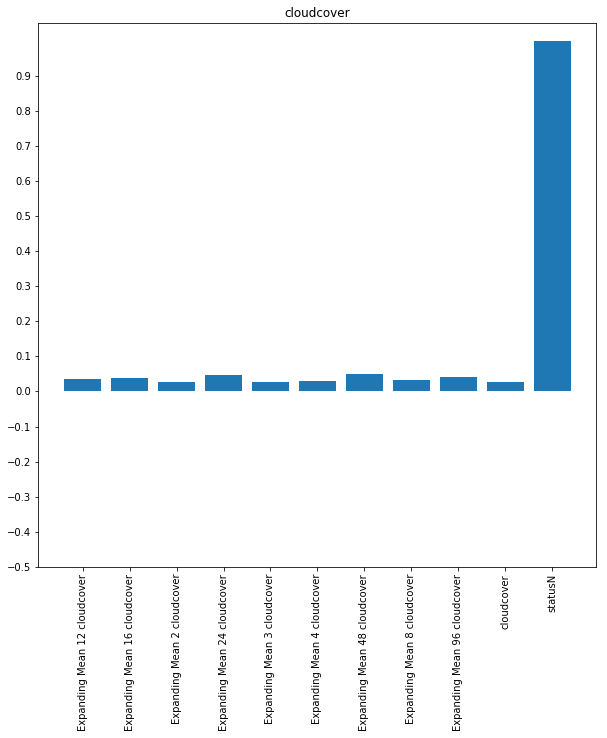

heatIndexC
Index(['statusN', 'heatIndexC', 'Expanding Mean 2 heatIndexC',
       'Expanding Mean 3 heatIndexC', 'Expanding Mean 4 heatIndexC',
       'Expanding Mean 8 heatIndexC', 'Expanding Mean 12 heatIndexC',
       'Expanding Mean 16 heatIndexC', 'Expanding Mean 24 heatIndexC',
       'Expanding Mean 48 heatIndexC', 'Expanding Mean 96 heatIndexC'],
      dtype='object')
statusN                         1.000000
heatIndexC                     -0.360284
Expanding Mean 2 heatIndexC    -0.361136
Expanding Mean 3 heatIndexC    -0.363429
Expanding Mean 4 heatIndexC    -0.362985
Expanding Mean 8 heatIndexC    -0.367411
Expanding Mean 12 heatIndexC   -0.370133
Expanding Mean 16 heatIndexC   -0.363066
Expanding Mean 24 heatIndexC   -0.385568
Expanding Mean 48 heatIndexC   -0.337079
Expanding Mean 96 heatIndexC   -0.299899
Name: statusN, dtype: float64


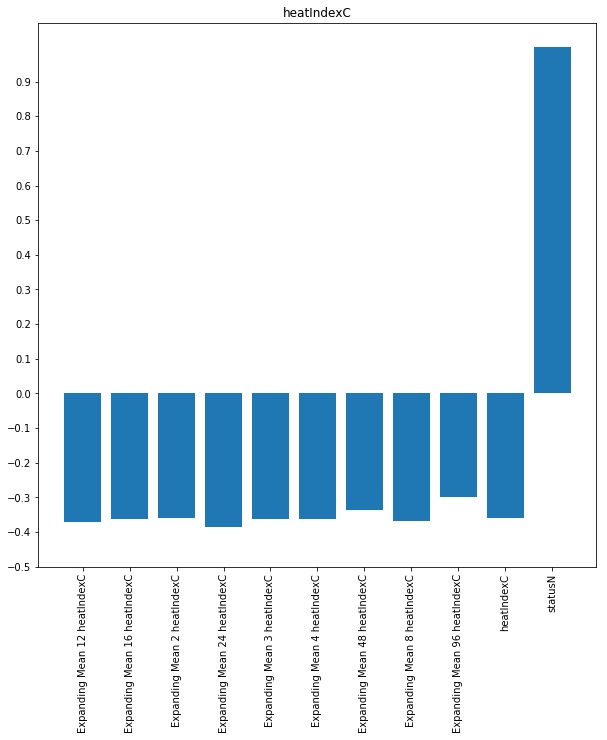

dewPointC
Index(['statusN', 'dewPointC', 'Expanding Mean 2 dewPointC',
       'Expanding Mean 3 dewPointC', 'Expanding Mean 4 dewPointC',
       'Expanding Mean 8 dewPointC', 'Expanding Mean 12 dewPointC',
       'Expanding Mean 16 dewPointC', 'Expanding Mean 24 dewPointC',
       'Expanding Mean 48 dewPointC', 'Expanding Mean 96 dewPointC'],
      dtype='object')
statusN                        1.000000
dewPointC                     -0.228120
Expanding Mean 2 dewPointC    -0.228197
Expanding Mean 3 dewPointC    -0.231427
Expanding Mean 4 dewPointC    -0.228381
Expanding Mean 8 dewPointC    -0.229081
Expanding Mean 12 dewPointC   -0.234970
Expanding Mean 16 dewPointC   -0.219488
Expanding Mean 24 dewPointC   -0.226981
Expanding Mean 48 dewPointC   -0.174616
Expanding Mean 96 dewPointC   -0.133409
Name: statusN, dtype: float64


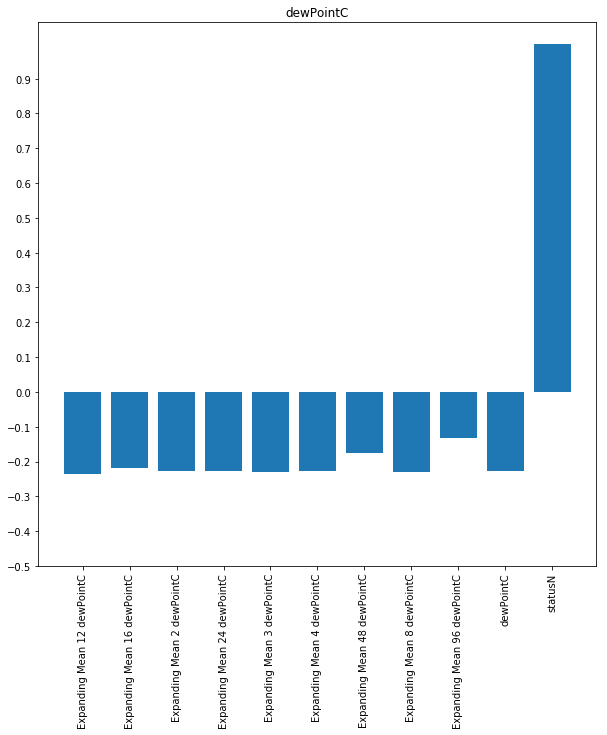

windChillC
Index(['statusN', 'windChillC', 'Expanding Mean 2 windChillC',
       'Expanding Mean 3 windChillC', 'Expanding Mean 4 windChillC',
       'Expanding Mean 8 windChillC', 'Expanding Mean 12 windChillC',
       'Expanding Mean 16 windChillC', 'Expanding Mean 24 windChillC',
       'Expanding Mean 48 windChillC', 'Expanding Mean 96 windChillC'],
      dtype='object')
statusN                         1.000000
windChillC                     -0.357651
Expanding Mean 2 windChillC    -0.357930
Expanding Mean 3 windChillC    -0.359969
Expanding Mean 4 windChillC    -0.358056
Expanding Mean 8 windChillC    -0.361116
Expanding Mean 12 windChillC   -0.363513
Expanding Mean 16 windChillC   -0.354332
Expanding Mean 24 windChillC   -0.373801
Expanding Mean 48 windChillC   -0.328025
Expanding Mean 96 windChillC   -0.295139
Name: statusN, dtype: float64


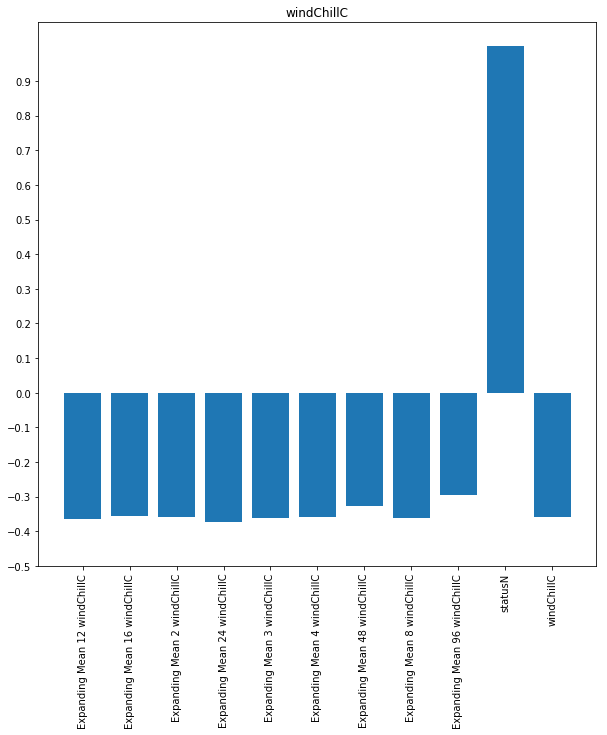

windGustMiles
Index(['statusN', 'windGustMiles', 'Expanding Mean 2 windGustMiles',
       'Expanding Mean 3 windGustMiles', 'Expanding Mean 4 windGustMiles',
       'Expanding Mean 8 windGustMiles', 'Expanding Mean 12 windGustMiles',
       'Expanding Mean 16 windGustMiles', 'Expanding Mean 24 windGustMiles',
       'Expanding Mean 48 windGustMiles', 'Expanding Mean 96 windGustMiles'],
      dtype='object')
statusN                            1.000000
windGustMiles                     -0.070466
Expanding Mean 2 windGustMiles    -0.070243
Expanding Mean 3 windGustMiles    -0.068389
Expanding Mean 4 windGustMiles    -0.069306
Expanding Mean 8 windGustMiles    -0.064062
Expanding Mean 12 windGustMiles   -0.059882
Expanding Mean 16 windGustMiles   -0.054459
Expanding Mean 24 windGustMiles   -0.042115
Expanding Mean 48 windGustMiles   -0.046413
Expanding Mean 96 windGustMiles    0.033956
Name: statusN, dtype: float64


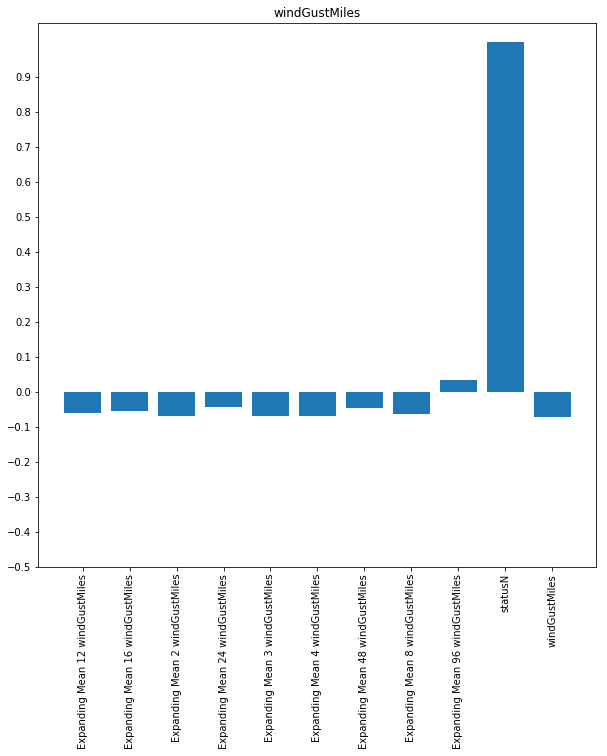

feelsLikeC
Index(['statusN', 'feelsLikeC', 'Expanding Mean 2 feelsLikeC',
       'Expanding Mean 3 feelsLikeC', 'Expanding Mean 4 feelsLikeC',
       'Expanding Mean 8 feelsLikeC', 'Expanding Mean 12 feelsLikeC',
       'Expanding Mean 16 feelsLikeC', 'Expanding Mean 24 feelsLikeC',
       'Expanding Mean 48 feelsLikeC', 'Expanding Mean 96 feelsLikeC'],
      dtype='object')
statusN                         1.000000
feelsLikeC                     -0.360284
Expanding Mean 2 feelsLikeC    -0.361136
Expanding Mean 3 feelsLikeC    -0.363429
Expanding Mean 4 feelsLikeC    -0.362985
Expanding Mean 8 feelsLikeC    -0.367411
Expanding Mean 12 feelsLikeC   -0.370133
Expanding Mean 16 feelsLikeC   -0.363066
Expanding Mean 24 feelsLikeC   -0.385568
Expanding Mean 48 feelsLikeC   -0.337079
Expanding Mean 96 feelsLikeC   -0.299899
Name: statusN, dtype: float64


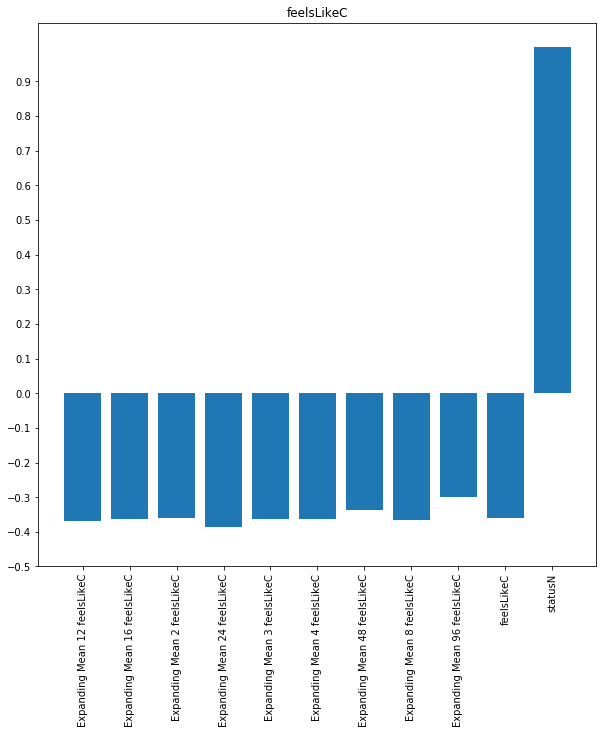

In [9]:
features = FEATURES
data = expanding_merged
data_features = data.columns
for f in features:
    print(f)
    merged_dataset = pd.DataFrame(expanding_merged['statusN'])
    for n in range(0, len(data_features)):
        if f == data_features[n] and f != "statusN":
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]]], axis = 1)
        elif "Expanding Mean " in data_features[n] and f in data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]]], axis = 1)
#     print(merged_dataset.head())
    corr = merged_dataset.corr(method='spearman')
    y = corr['statusN']
    print(y)
    getBarPlot(y, f, 10, 10, corr.columns)

# ShiftTraffic to ShiftWeather

### Rolling

statusN
statusN    1.0
Name: statusN, dtype: float64


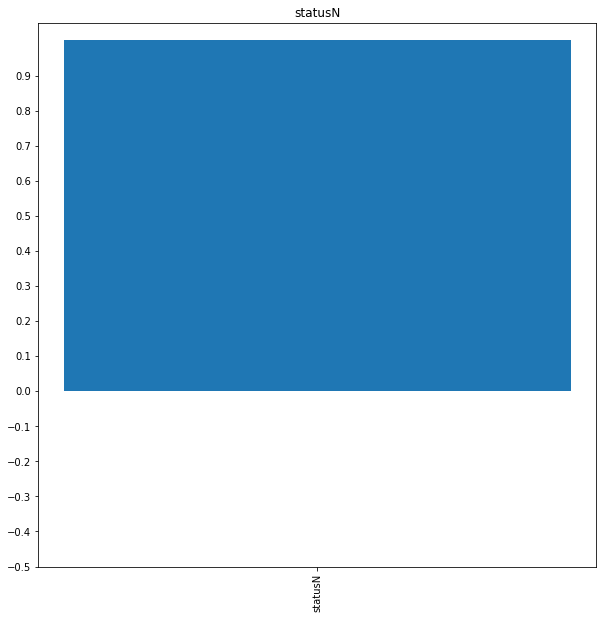

statusS
statusN    1.0
Name: statusN, dtype: float64


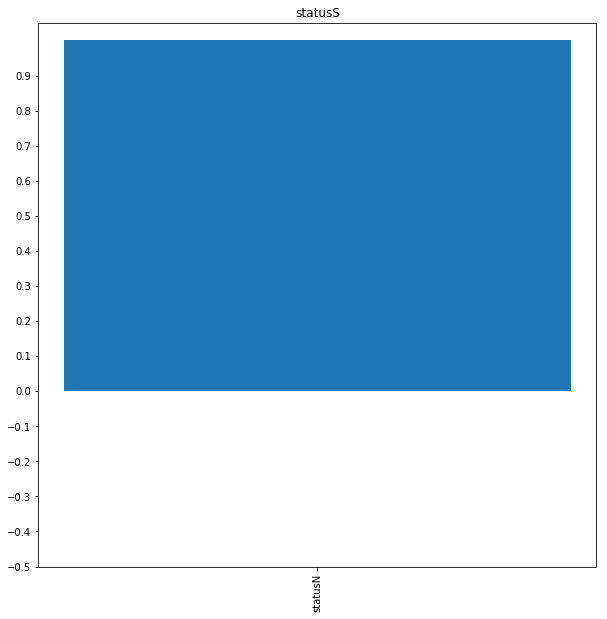

tempC
statusN           1.000000
tempC            -0.359282
tempC_Rmean=2    -0.364325
tempC_Rmean=3    -0.368783
tempC_Rmean=4    -0.364484
tempC_Rmean=8    -0.320009
tempC_Rmean=12   -0.234199
tempC_Rmean=24    0.134737
tempC_Rmean=32    0.318994
tempC_Rmean=48    0.174900
tempC_Rmean=96    0.051289
Name: statusN, dtype: float64
Highest : tempC_Rmean=3   -0.368782652341


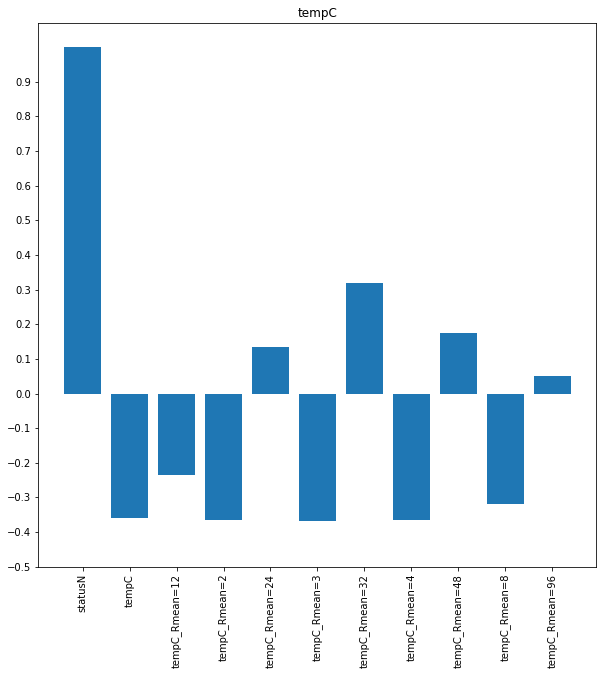

windspeedMiles
statusN                    1.000000
windspeedMiles            -0.123749
windspeedMiles_Rmean=2    -0.114480
windspeedMiles_Rmean=3    -0.117407
windspeedMiles_Rmean=4    -0.099744
windspeedMiles_Rmean=8    -0.062724
windspeedMiles_Rmean=12    0.004709
windspeedMiles_Rmean=24    0.195013
windspeedMiles_Rmean=32    0.176667
windspeedMiles_Rmean=48   -0.043966
windspeedMiles_Rmean=96    0.003556
Name: statusN, dtype: float64
Highest : windspeedMiles   -0.123749257473


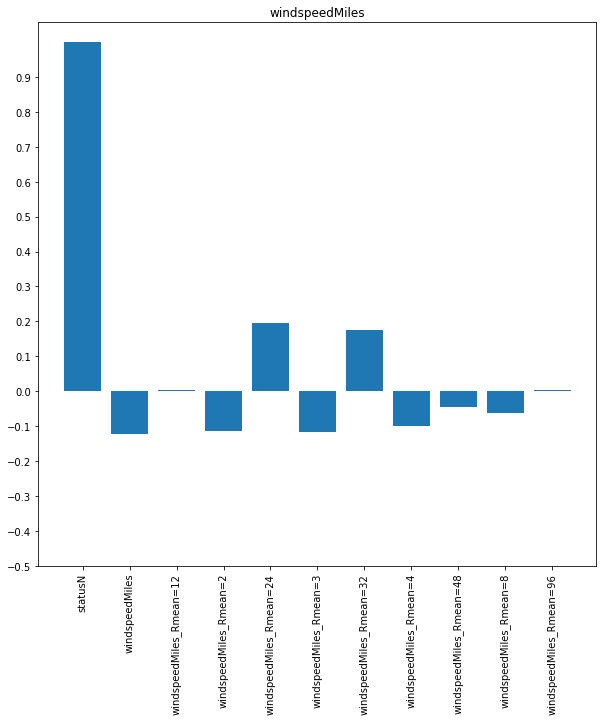

precipMM
statusN              1.000000
precipMM            -0.039814
precipMM_Rmean=2    -0.049321
precipMM_Rmean=3    -0.035279
precipMM_Rmean=4    -0.006657
precipMM_Rmean=8     0.044168
precipMM_Rmean=12    0.092055
precipMM_Rmean=24    0.185922
precipMM_Rmean=32    0.153201
precipMM_Rmean=48   -0.015594
precipMM_Rmean=96    0.017748
Name: statusN, dtype: float64
Highest : precipMM_Rmean=2   -0.0493206181554


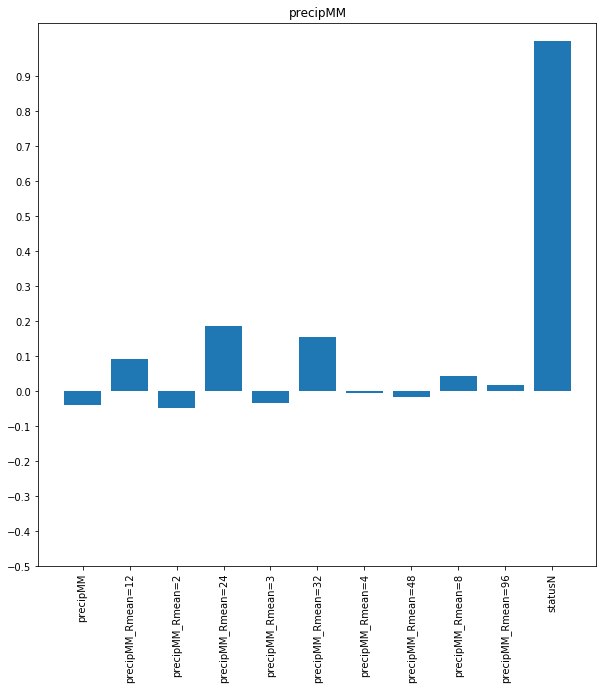

humidity
statusN              1.000000
humidity             0.300401
humidity_Rmean=2     0.306686
humidity_Rmean=3     0.310040
humidity_Rmean=4     0.309771
humidity_Rmean=8     0.284855
humidity_Rmean=12    0.225586
humidity_Rmean=24   -0.088624
humidity_Rmean=32   -0.275845
humidity_Rmean=48   -0.163016
humidity_Rmean=96   -0.032716
Name: statusN, dtype: float64
Highest : humidity_Rmean=3   0.310040021784


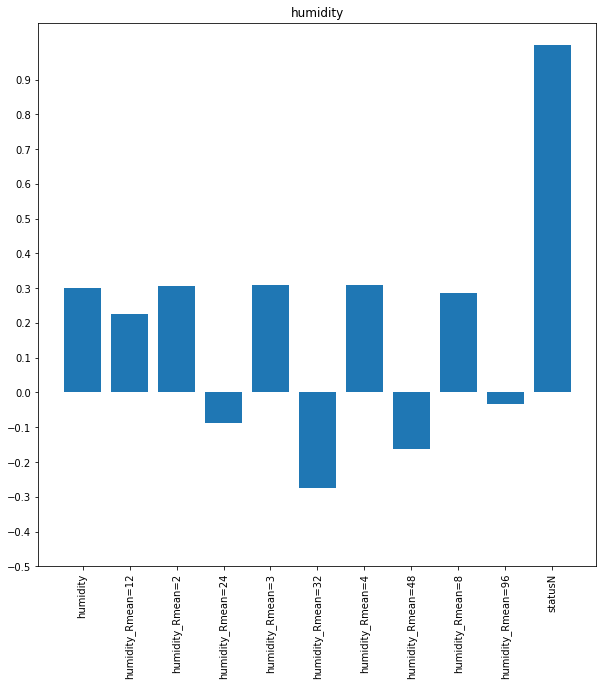

visibility
statusN                1.000000
visibility             0.047568
visibility_Rmean=2    -0.014385
visibility_Rmean=3     0.082405
visibility_Rmean=4     0.074072
visibility_Rmean=8     0.040485
visibility_Rmean=12    0.001199
visibility_Rmean=24   -0.158402
visibility_Rmean=32   -0.140973
visibility_Rmean=48   -0.004671
visibility_Rmean=96   -0.043686
Name: statusN, dtype: float64
Highest : visibility_Rmean=3   0.082404616357


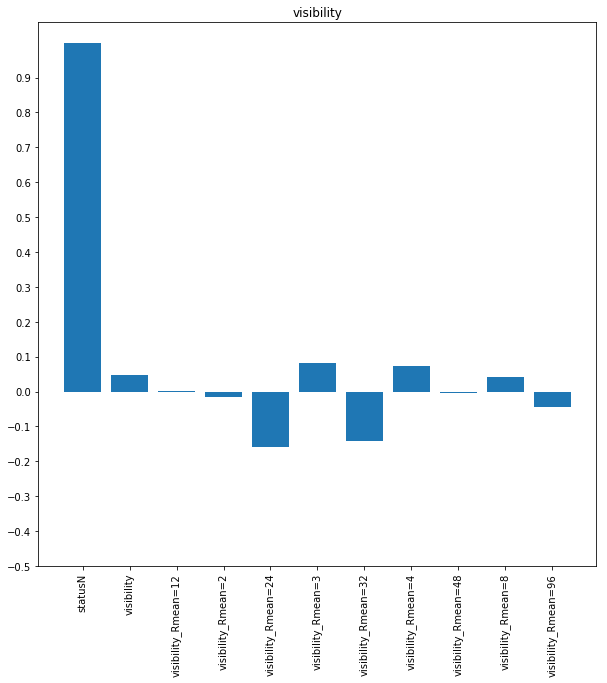

pressure
statusN              1.000000
pressure            -0.047751
pressure_Rmean=2    -0.042182
pressure_Rmean=3    -0.036662
pressure_Rmean=4    -0.031805
pressure_Rmean=8    -0.019246
pressure_Rmean=12   -0.028089
pressure_Rmean=24   -0.139452
pressure_Rmean=32   -0.152806
pressure_Rmean=48   -0.084392
pressure_Rmean=96   -0.055141
Name: statusN, dtype: float64
Highest : pressure_Rmean=32   -0.152805684635


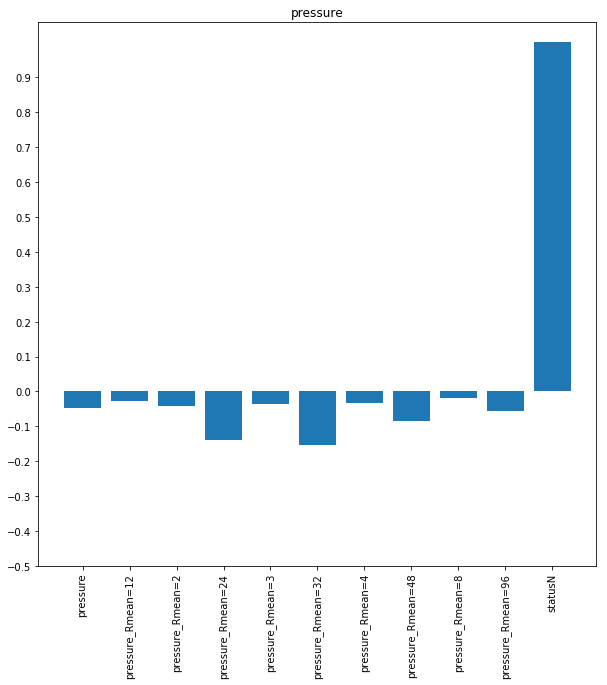

cloudcover
statusN                1.000000
cloudcover             0.024781
cloudcover_Rmean=2     0.029589
cloudcover_Rmean=3     0.034436
cloudcover_Rmean=4     0.038657
cloudcover_Rmean=8     0.056530
cloudcover_Rmean=12    0.070740
cloudcover_Rmean=24    0.101518
cloudcover_Rmean=32    0.088151
cloudcover_Rmean=48   -0.016607
cloudcover_Rmean=96    0.002710
Name: statusN, dtype: float64
Highest : cloudcover_Rmean=24   0.10151802081


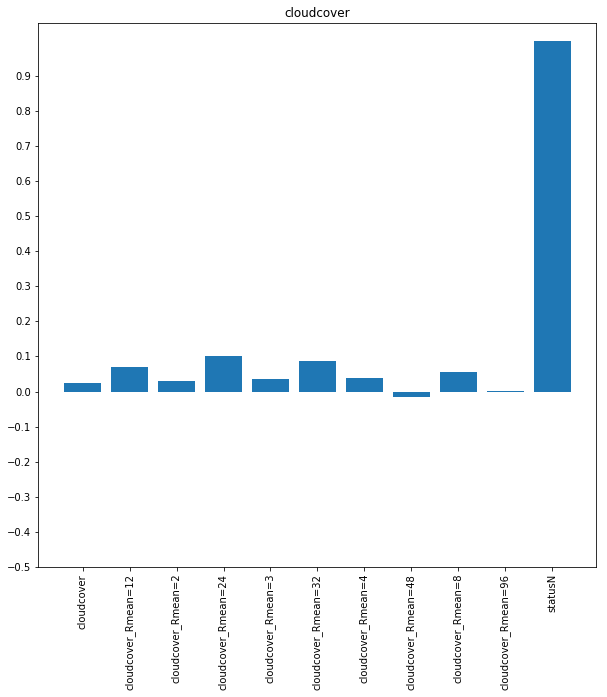

heatIndexC
statusN                1.000000
heatIndexC            -0.362135
heatIndexC_Rmean=2    -0.369683
heatIndexC_Rmean=3    -0.372066
heatIndexC_Rmean=4    -0.373664
heatIndexC_Rmean=8    -0.341332
heatIndexC_Rmean=12   -0.260748
heatIndexC_Rmean=24    0.135720
heatIndexC_Rmean=32    0.337224
heatIndexC_Rmean=48    0.199564
heatIndexC_Rmean=96    0.059142
Name: statusN, dtype: float64
Highest : heatIndexC_Rmean=4   -0.373664319298


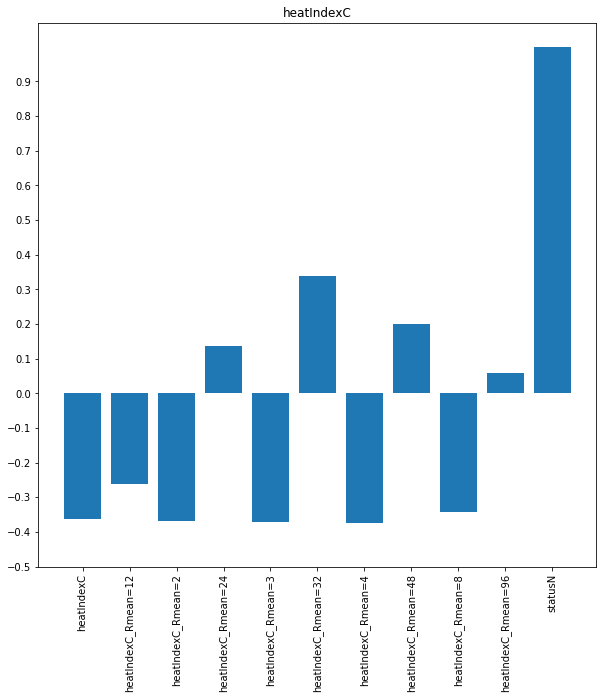

dewPointC
statusN               1.000000
dewPointC            -0.231151
dewPointC_Rmean=2    -0.236159
dewPointC_Rmean=3    -0.238378
dewPointC_Rmean=4    -0.236962
dewPointC_Rmean=8    -0.205381
dewPointC_Rmean=12   -0.138122
dewPointC_Rmean=24    0.116075
dewPointC_Rmean=32    0.186924
dewPointC_Rmean=48    0.096200
dewPointC_Rmean=96    0.013234
Name: statusN, dtype: float64
Highest : dewPointC_Rmean=3   -0.238377615408


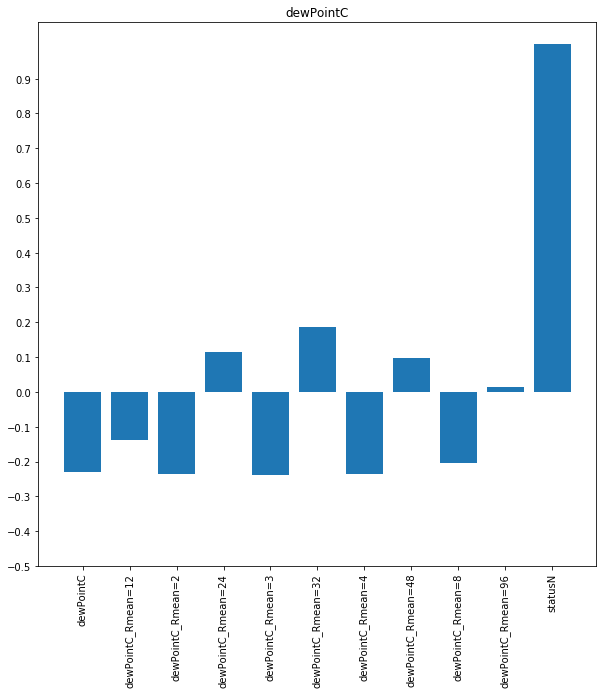

windChillC
statusN                1.000000
windChillC            -0.359482
windChillC_Rmean=2    -0.364446
windChillC_Rmean=3    -0.368910
windChillC_Rmean=4    -0.364474
windChillC_Rmean=8    -0.319749
windChillC_Rmean=12   -0.234130
windChillC_Rmean=24    0.134795
windChillC_Rmean=32    0.319278
windChillC_Rmean=48    0.175088
windChillC_Rmean=96    0.051639
Name: statusN, dtype: float64
Highest : windChillC_Rmean=3   -0.368910364276


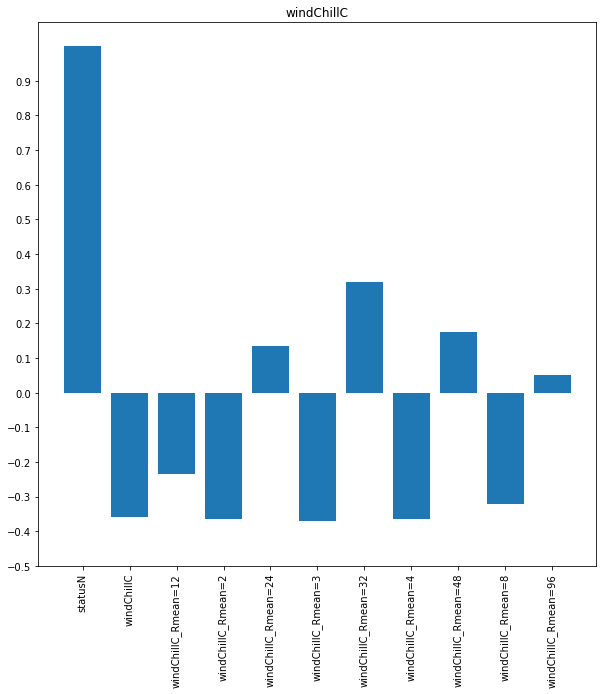

windGustMiles
statusN                   1.000000
windGustMiles            -0.070762
windGustMiles_Rmean=2    -0.067304
windGustMiles_Rmean=3    -0.059783
windGustMiles_Rmean=4    -0.046401
windGustMiles_Rmean=8     0.002832
windGustMiles_Rmean=12    0.069105
windGustMiles_Rmean=24    0.206531
windGustMiles_Rmean=32    0.144364
windGustMiles_Rmean=48   -0.094855
windGustMiles_Rmean=96   -0.003376
Name: statusN, dtype: float64
Highest : windGustMiles_Rmean=48   -0.0948550620791


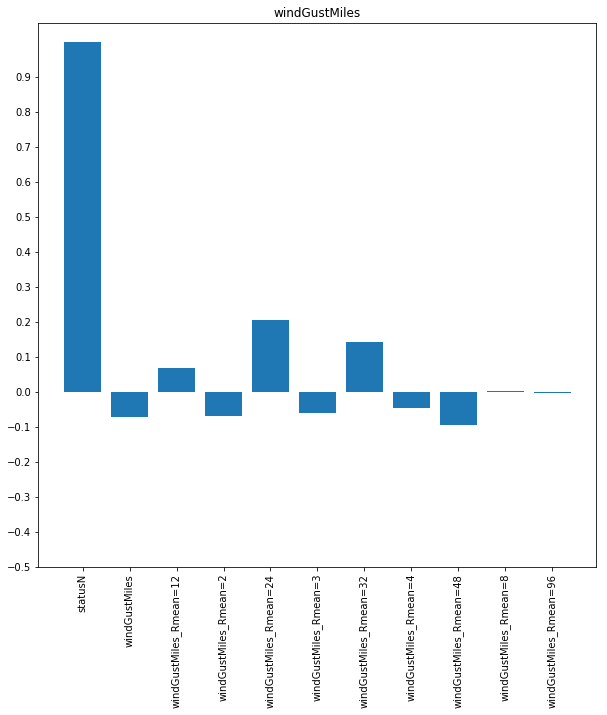

feelsLikeC
statusN                1.000000
feelsLikeC            -0.362135
feelsLikeC_Rmean=2    -0.369683
feelsLikeC_Rmean=3    -0.372066
feelsLikeC_Rmean=4    -0.373664
feelsLikeC_Rmean=8    -0.341332
feelsLikeC_Rmean=12   -0.260748
feelsLikeC_Rmean=24    0.135720
feelsLikeC_Rmean=32    0.337224
feelsLikeC_Rmean=48    0.199564
feelsLikeC_Rmean=96    0.059142
Name: statusN, dtype: float64
Highest : feelsLikeC_Rmean=4   -0.373664319298


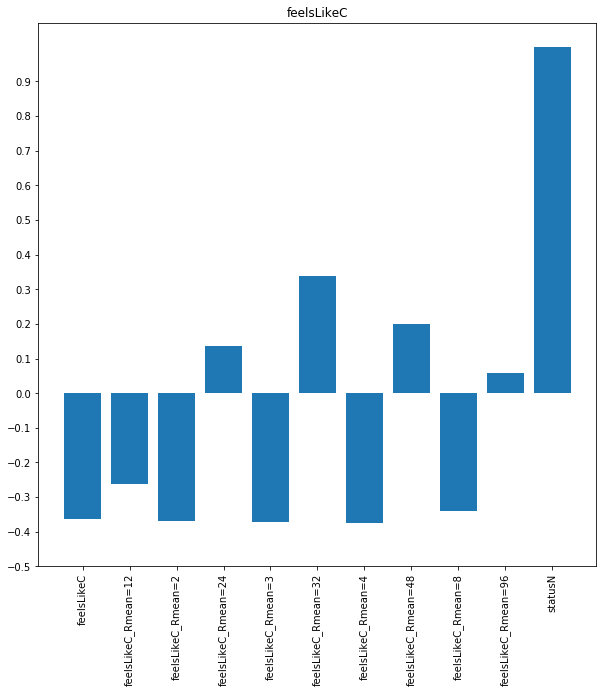

In [46]:
features = FEATURES
data = rolling_weather
data_features = data.columns
shift = 96
for f in features:
    print(f)
    merged_dataset = pd.DataFrame(expanding_merged['statusN'].shift(shift))
    for n in range(0, len(data_features)):
        if f == data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]].shift(shift)], axis = 1)
        elif f+"_Rmean" in data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]].shift(shift)], axis = 1)
        
    merged_dataset = merged_dataset.drop(merged_dataset.index[0:shift])
    corr = merged_dataset.corr(method='spearman')
    y = corr['statusN']
    print(y)
    
    if(len(y) > 1):
        high_index = getHighest(y[1], y)
        print ("Highest : " + corr.columns[high_index] + "   " + str(y[high_index]))
        
    getBarPlot(y, f, 10,10,corr.columns)
    

### Expanding


statusN
statusN                      1.000000
Expanding Mean 2 statusN     0.995825
Expanding Mean 3 statusN     0.988164
Expanding Mean 4 statusN     0.978915
Expanding Mean 8 statusN     0.934643
Expanding Mean 12 statusN    0.904306
Expanding Mean 16 statusN    0.862932
Expanding Mean 24 statusN    0.849956
Expanding Mean 48 statusN    0.707520
Expanding Mean 96 statusN    0.642350
Name: statusN, dtype: float64
Highest : Expanding Mean 2 statusN   0.995825218325


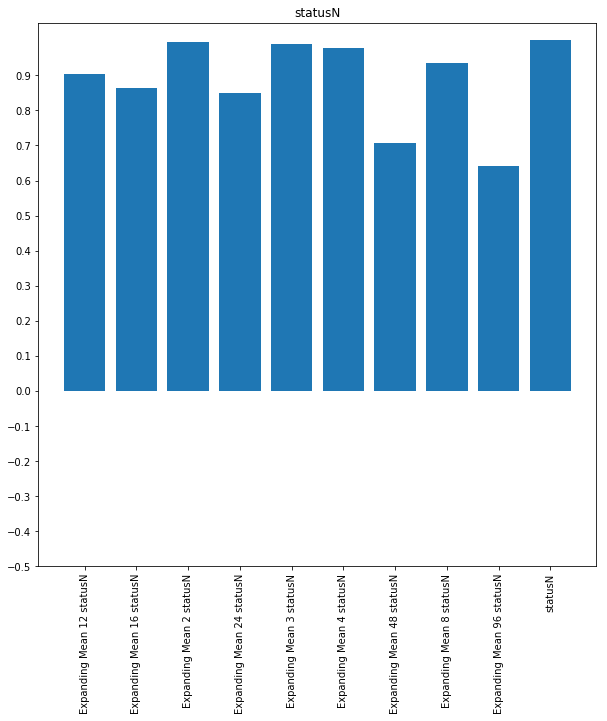

statusS
statusN                      1.000000
statusS                      0.111317
Expanding Mean 2 statusS     0.110866
Expanding Mean 3 statusS     0.112169
Expanding Mean 4 statusS     0.108670
Expanding Mean 8 statusS     0.104657
Expanding Mean 12 statusS    0.100506
Expanding Mean 16 statusS    0.096996
Expanding Mean 24 statusS    0.096587
Expanding Mean 48 statusS    0.108860
Expanding Mean 96 statusS    0.155048
Name: statusN, dtype: float64
Highest : Expanding Mean 96 statusS   0.155048193373


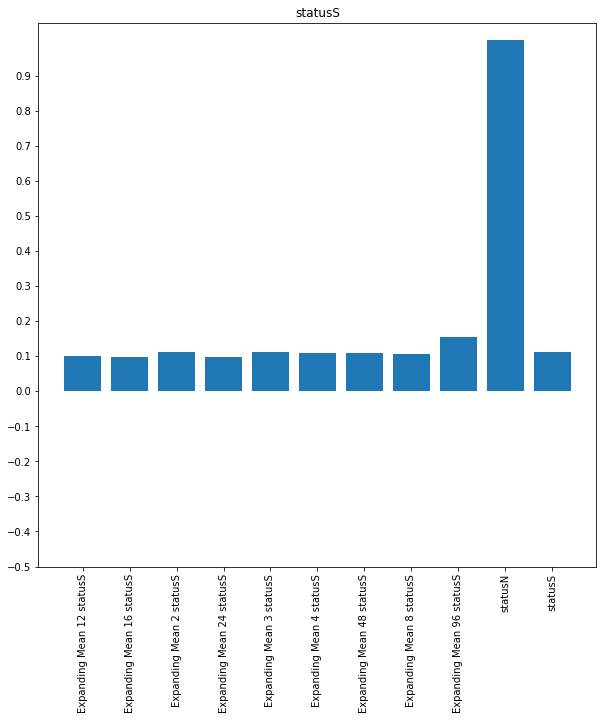

tempC
statusN                    1.000000
tempC                     -0.359282
Expanding Mean 2 tempC    -0.359542
Expanding Mean 3 tempC    -0.361512
Expanding Mean 4 tempC    -0.359621
Expanding Mean 8 tempC    -0.362464
Expanding Mean 12 tempC   -0.364679
Expanding Mean 16 tempC   -0.355608
Expanding Mean 24 tempC   -0.374176
Expanding Mean 48 tempC   -0.326927
Expanding Mean 96 tempC   -0.294419
Name: statusN, dtype: float64
Highest : Expanding Mean 24 tempC   -0.374175657833


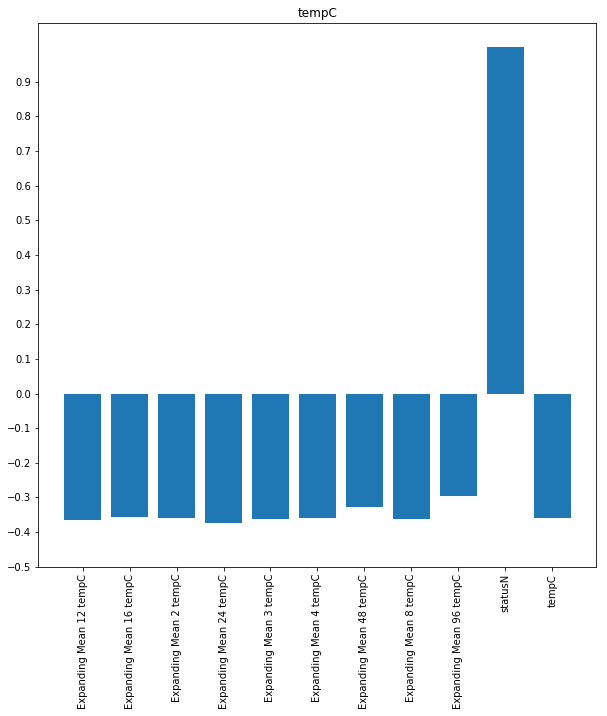

windspeedMiles
statusN                             1.000000
windspeedMiles                     -0.123749
Expanding Mean 2 windspeedMiles    -0.123652
Expanding Mean 3 windspeedMiles    -0.122542
Expanding Mean 4 windspeedMiles    -0.123365
Expanding Mean 8 windspeedMiles    -0.118694
Expanding Mean 12 windspeedMiles   -0.116626
Expanding Mean 16 windspeedMiles   -0.111973
Expanding Mean 24 windspeedMiles   -0.102256
Expanding Mean 48 windspeedMiles   -0.101379
Expanding Mean 96 windspeedMiles   -0.021477
Name: statusN, dtype: float64
Highest : windspeedMiles   -0.123749257473


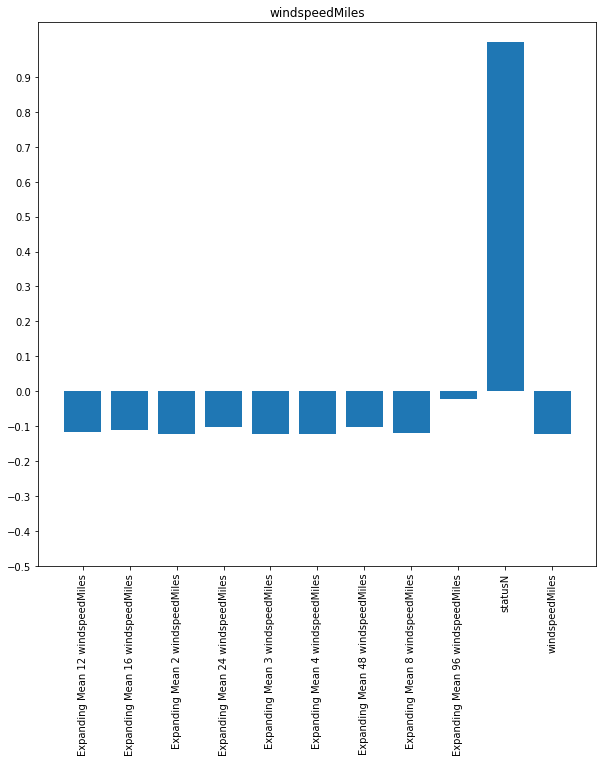

precipMM
statusN                       1.000000
precipMM                     -0.039842
Expanding Mean 2 precipMM    -0.039316
Expanding Mean 3 precipMM    -0.036912
Expanding Mean 4 precipMM    -0.037624
Expanding Mean 8 precipMM    -0.029201
Expanding Mean 12 precipMM   -0.025545
Expanding Mean 16 precipMM   -0.023375
Expanding Mean 24 precipMM    0.001954
Expanding Mean 48 precipMM   -0.017433
Expanding Mean 96 precipMM    0.005205
Name: statusN, dtype: float64
Highest : precipMM   -0.039842091164


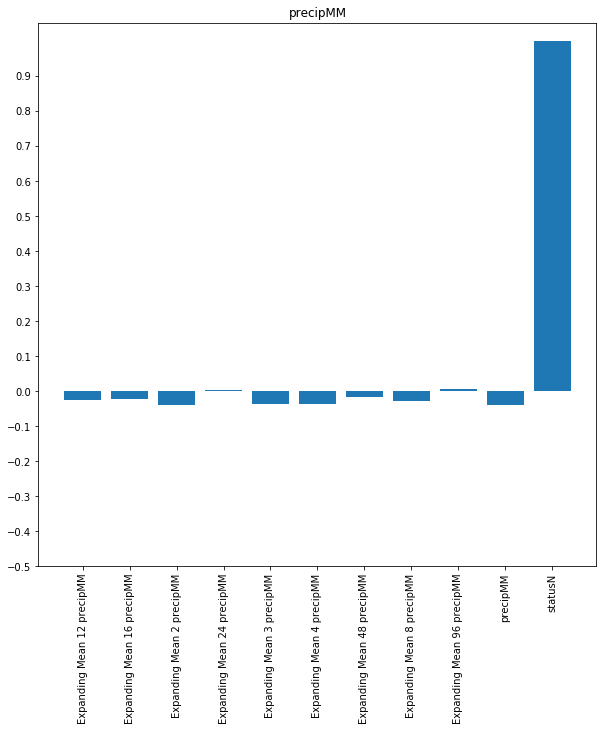

humidity
statusN                       1.000000
humidity                      0.300401
Expanding Mean 2 humidity     0.301199
Expanding Mean 3 humidity     0.302820
Expanding Mean 4 humidity     0.303143
Expanding Mean 8 humidity     0.305445
Expanding Mean 12 humidity    0.308351
Expanding Mean 16 humidity    0.302648
Expanding Mean 24 humidity    0.320724
Expanding Mean 48 humidity    0.293426
Expanding Mean 96 humidity    0.264134
Name: statusN, dtype: float64
Highest : Expanding Mean 24 humidity   0.320724245238


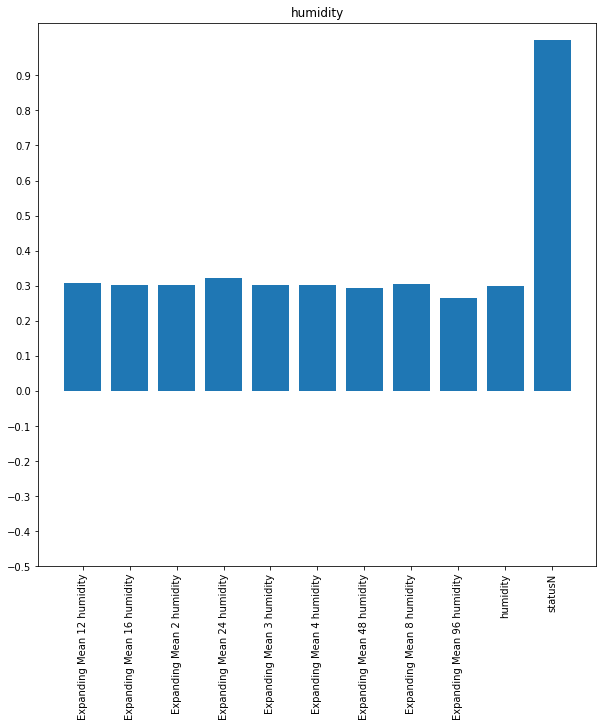

visibility
statusN                         1.000000
visibility                      0.047568
Expanding Mean 2 visibility     0.047504
Expanding Mean 3 visibility     0.046669
Expanding Mean 4 visibility     0.047215
Expanding Mean 8 visibility     0.044665
Expanding Mean 12 visibility    0.043906
Expanding Mean 16 visibility    0.035502
Expanding Mean 24 visibility    0.027909
Expanding Mean 48 visibility    0.052131
Expanding Mean 96 visibility    0.029529
Name: statusN, dtype: float64
Highest : Expanding Mean 48 visibility   0.0521309519287


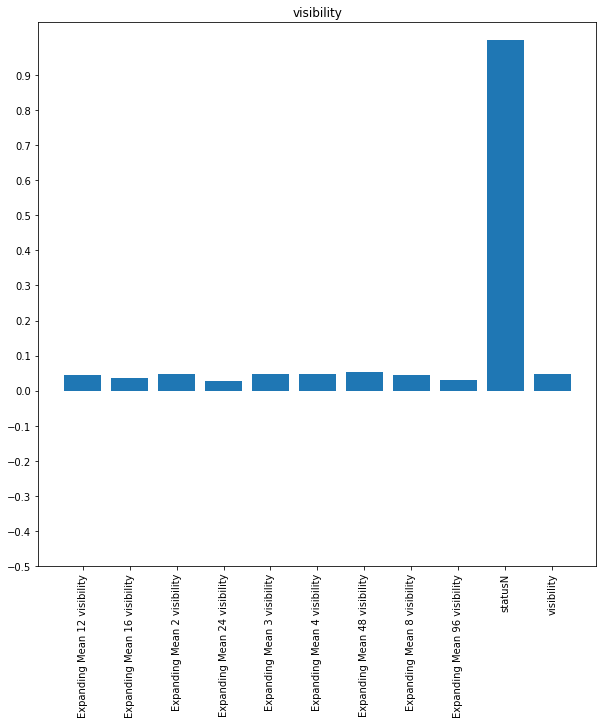

pressure
statusN                       1.000000
pressure                     -0.047751
Expanding Mean 2 pressure    -0.047641
Expanding Mean 3 pressure    -0.045598
Expanding Mean 4 pressure    -0.047258
Expanding Mean 8 pressure    -0.041560
Expanding Mean 12 pressure   -0.038791
Expanding Mean 16 pressure   -0.035421
Expanding Mean 24 pressure   -0.023551
Expanding Mean 48 pressure   -0.018569
Expanding Mean 96 pressure   -0.044797
Name: statusN, dtype: float64
Highest : pressure   -0.0477513892577


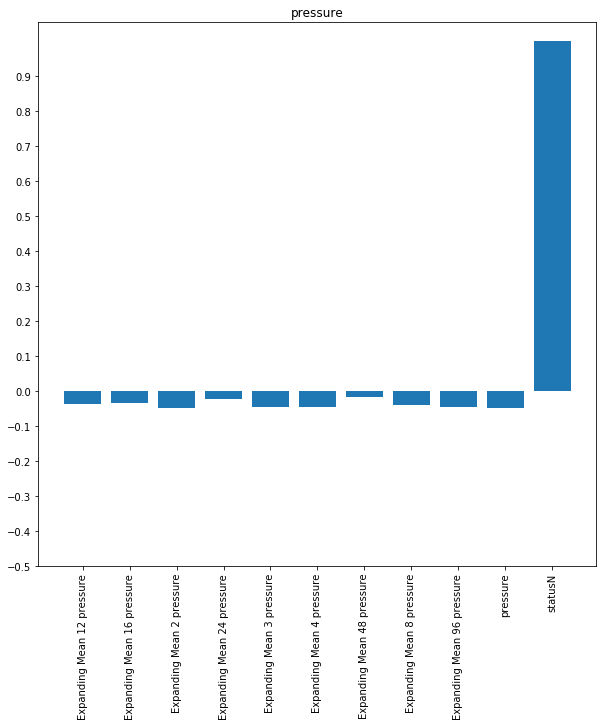

cloudcover
statusN                         1.000000
cloudcover                      0.024781
Expanding Mean 2 cloudcover     0.025660
Expanding Mean 3 cloudcover     0.026497
Expanding Mean 4 cloudcover     0.027353
Expanding Mean 8 cloudcover     0.031068
Expanding Mean 12 cloudcover    0.033889
Expanding Mean 16 cloudcover    0.036342
Expanding Mean 24 cloudcover    0.047169
Expanding Mean 48 cloudcover    0.048758
Expanding Mean 96 cloudcover    0.040830
Name: statusN, dtype: float64
Highest : Expanding Mean 48 cloudcover   0.0487583949929


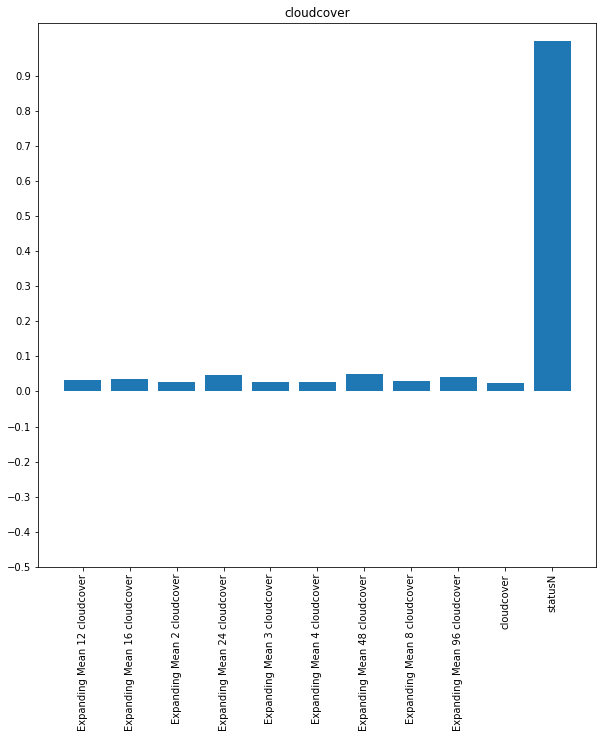

heatIndexC
statusN                         1.000000
heatIndexC                     -0.362135
Expanding Mean 2 heatIndexC    -0.362968
Expanding Mean 3 heatIndexC    -0.365220
Expanding Mean 4 heatIndexC    -0.364745
Expanding Mean 8 heatIndexC    -0.369035
Expanding Mean 12 heatIndexC   -0.371477
Expanding Mean 16 heatIndexC   -0.364569
Expanding Mean 24 heatIndexC   -0.386530
Expanding Mean 48 heatIndexC   -0.336652
Expanding Mean 96 heatIndexC   -0.300025
Name: statusN, dtype: float64
Highest : Expanding Mean 24 heatIndexC   -0.386530382307


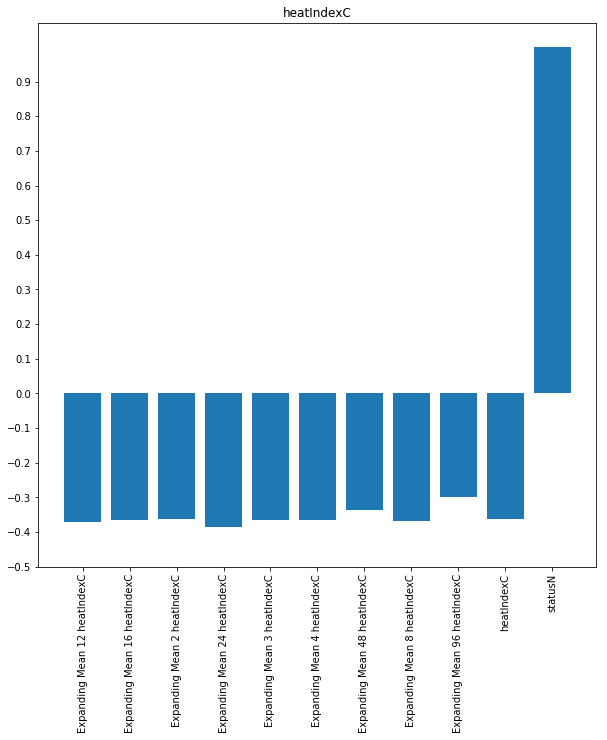

dewPointC
statusN                        1.000000
dewPointC                     -0.231151
Expanding Mean 2 dewPointC    -0.231229
Expanding Mean 3 dewPointC    -0.234478
Expanding Mean 4 dewPointC    -0.231415
Expanding Mean 8 dewPointC    -0.232116
Expanding Mean 12 dewPointC   -0.238014
Expanding Mean 16 dewPointC   -0.222393
Expanding Mean 24 dewPointC   -0.229944
Expanding Mean 48 dewPointC   -0.176881
Expanding Mean 96 dewPointC   -0.135156
Name: statusN, dtype: float64
Highest : Expanding Mean 12 dewPointC   -0.23801402755


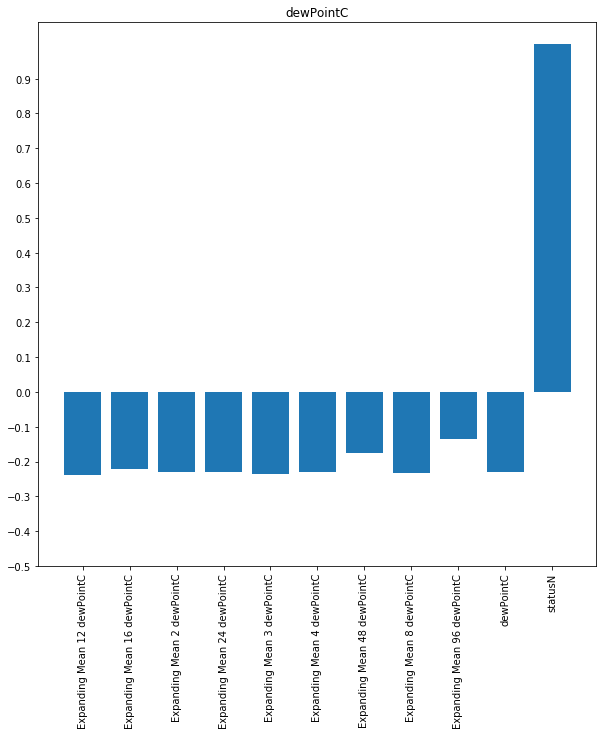

windChillC
statusN                         1.000000
windChillC                     -0.359482
Expanding Mean 2 windChillC    -0.359741
Expanding Mean 3 windChillC    -0.361734
Expanding Mean 4 windChillC    -0.359813
Expanding Mean 8 windChillC    -0.362671
Expanding Mean 12 windChillC   -0.364846
Expanding Mean 16 windChillC   -0.355674
Expanding Mean 24 windChillC   -0.374361
Expanding Mean 48 windChillC   -0.326983
Expanding Mean 96 windChillC   -0.294328
Name: statusN, dtype: float64
Highest : Expanding Mean 24 windChillC   -0.374360844398


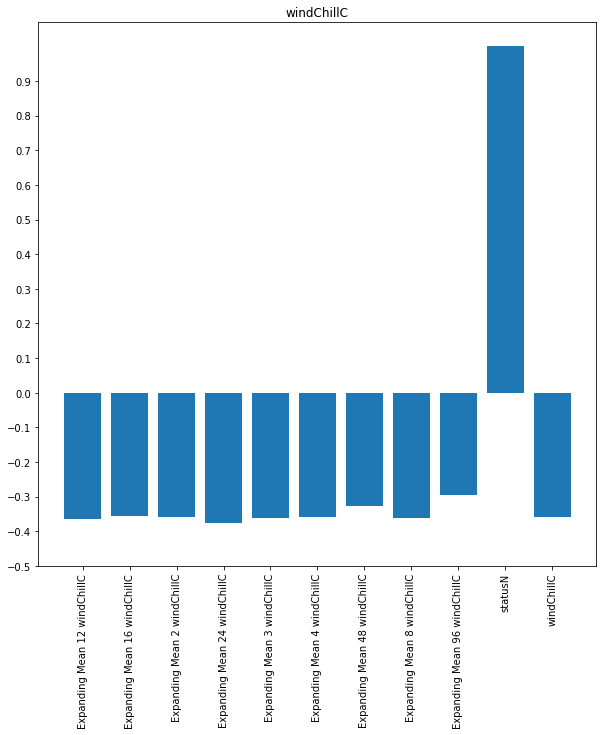

windGustMiles
statusN                            1.000000
windGustMiles                     -0.070762
Expanding Mean 2 windGustMiles    -0.070527
Expanding Mean 3 windGustMiles    -0.068601
Expanding Mean 4 windGustMiles    -0.069555
Expanding Mean 8 windGustMiles    -0.064180
Expanding Mean 12 windGustMiles   -0.059778
Expanding Mean 16 windGustMiles   -0.054442
Expanding Mean 24 windGustMiles   -0.041795
Expanding Mean 48 windGustMiles   -0.045818
Expanding Mean 96 windGustMiles    0.034653
Name: statusN, dtype: float64
Highest : windGustMiles   -0.0707615203716


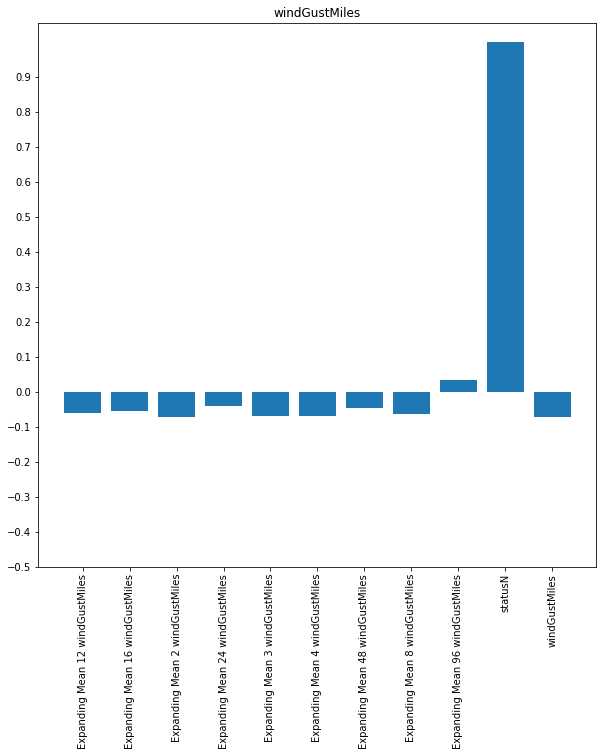

feelsLikeC
statusN                         1.000000
feelsLikeC                     -0.362135
Expanding Mean 2 feelsLikeC    -0.362968
Expanding Mean 3 feelsLikeC    -0.365220
Expanding Mean 4 feelsLikeC    -0.364745
Expanding Mean 8 feelsLikeC    -0.369035
Expanding Mean 12 feelsLikeC   -0.371477
Expanding Mean 16 feelsLikeC   -0.364569
Expanding Mean 24 feelsLikeC   -0.386530
Expanding Mean 48 feelsLikeC   -0.336652
Expanding Mean 96 feelsLikeC   -0.300025
Name: statusN, dtype: float64
Highest : Expanding Mean 24 feelsLikeC   -0.386530382307


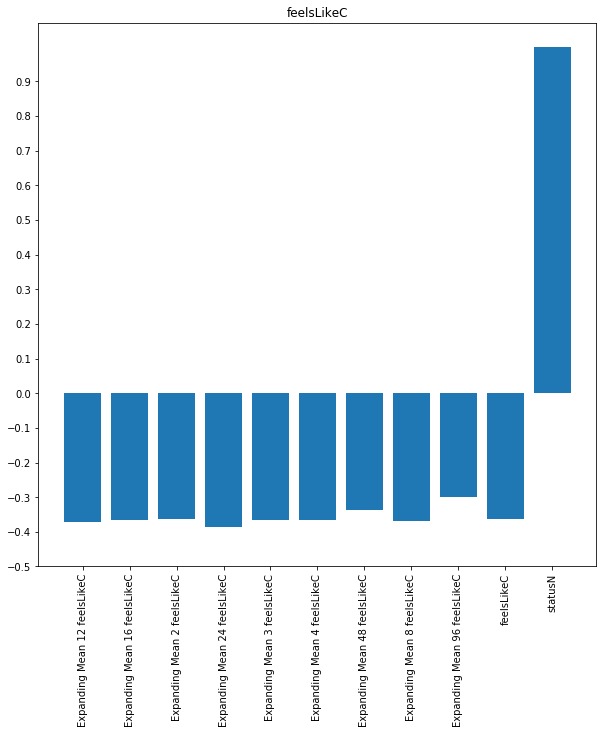

In [47]:
features = FEATURES
data = expanding_merged
data_features = data.columns
shift = 96
for f in features:
    print(f)
    merged_dataset = pd.DataFrame(expanding_merged['statusN'].shift(shift))
    for n in range(0, len(data_features)):
        if f == data_features[n] and f != "statusN":
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]].shift(shift)], axis = 1)
        elif "Expanding Mean " in data_features[n] and f in data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]].shift(shift)], axis = 1)
        
    merged_dataset = merged_dataset.drop(merged_dataset.index[0:shift])
    corr = merged_dataset.corr(method='spearman')
    y = corr['statusN']
    print(y)
    
    if(len(y) > 1):
        high_index = getHighest(y[1], y)
        print ("Highest : " + corr.columns[high_index] + "   " + str(y[high_index]))
        
    getBarPlot(y, f, 10,10,corr.columns)
    

# OG Traffic + Shifted Weather

### Rolling

statusN
statusN    1.0
Name: statusN, dtype: float64


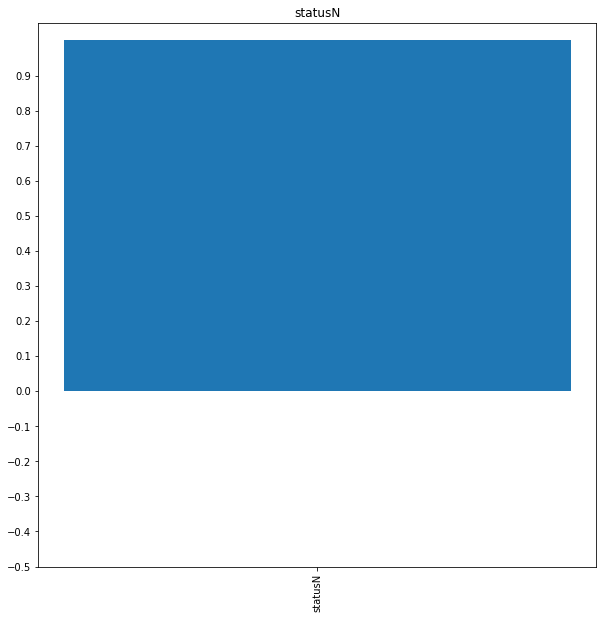

statusS
statusN    1.0
Name: statusN, dtype: float64


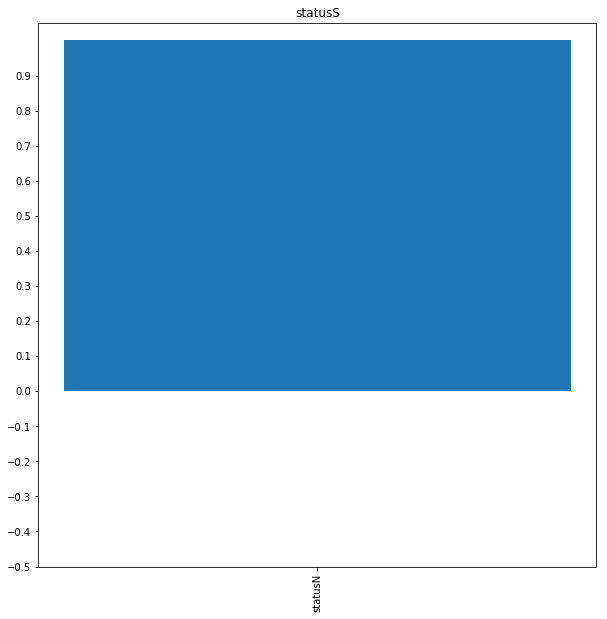

tempC
statusN           1.000000
tempC            -0.362945
tempC_Rmean=2    -0.363198
tempC_Rmean=3    -0.363416
tempC_Rmean=4    -0.354580
tempC_Rmean=8    -0.295959
tempC_Rmean=12   -0.200952
tempC_Rmean=24    0.171663
tempC_Rmean=32    0.335072
tempC_Rmean=48    0.141438
tempC_Rmean=96    0.052663
Name: statusN, dtype: float64
Highest : tempC_Rmean=3   -0.36341573918


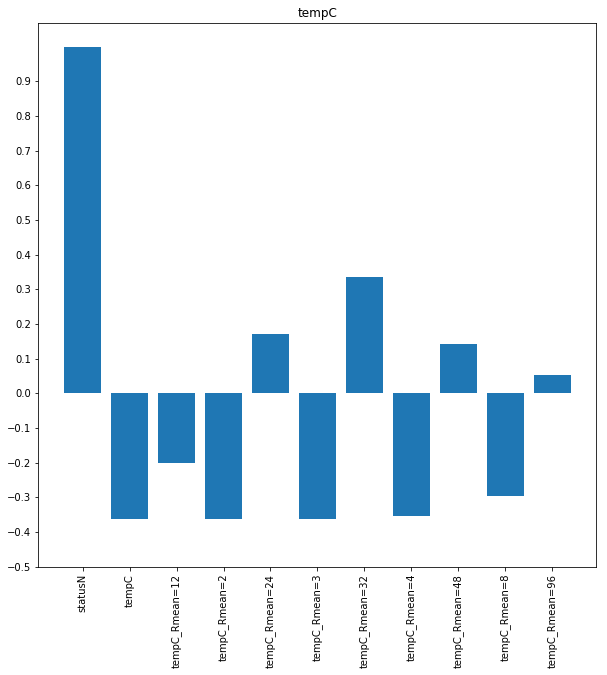

windspeedMiles
statusN                    1.000000
windspeedMiles            -0.115710
windspeedMiles_Rmean=2    -0.105328
windspeedMiles_Rmean=3    -0.107435
windspeedMiles_Rmean=4    -0.087453
windspeedMiles_Rmean=8    -0.044442
windspeedMiles_Rmean=12    0.027637
windspeedMiles_Rmean=24    0.200345
windspeedMiles_Rmean=32    0.164344
windspeedMiles_Rmean=48   -0.060554
windspeedMiles_Rmean=96    0.003079
Name: statusN, dtype: float64
Highest : windspeedMiles_Rmean=3   -0.10743472566


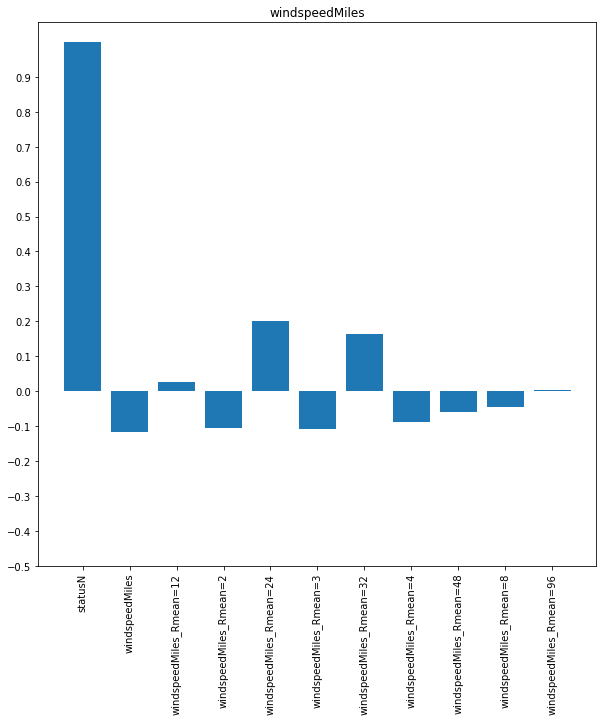

precipMM
statusN              1.000000
precipMM            -0.025593
precipMM_Rmean=2    -0.034926
precipMM_Rmean=3    -0.021564
precipMM_Rmean=4     0.009712
precipMM_Rmean=8     0.062153
precipMM_Rmean=12    0.108806
precipMM_Rmean=24    0.186076
precipMM_Rmean=32    0.142262
precipMM_Rmean=48   -0.027725
precipMM_Rmean=96    0.017113
Name: statusN, dtype: float64
Highest : precipMM_Rmean=2   -0.0349264846811


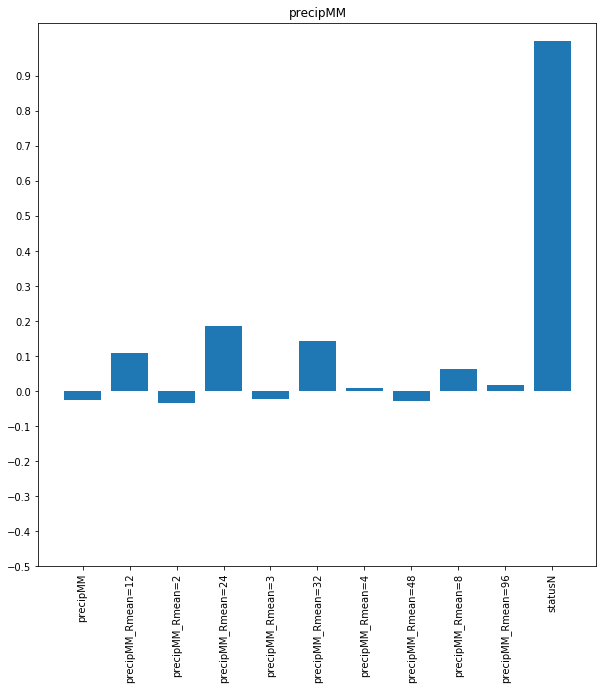

humidity
statusN              1.000000
humidity             0.308016
humidity_Rmean=2     0.310345
humidity_Rmean=3     0.310069
humidity_Rmean=4     0.306342
humidity_Rmean=8     0.269844
humidity_Rmean=12    0.201799
humidity_Rmean=24   -0.124551
humidity_Rmean=32   -0.293257
humidity_Rmean=48   -0.133995
humidity_Rmean=96   -0.033483
Name: statusN, dtype: float64
Highest : humidity_Rmean=2   0.310345254661


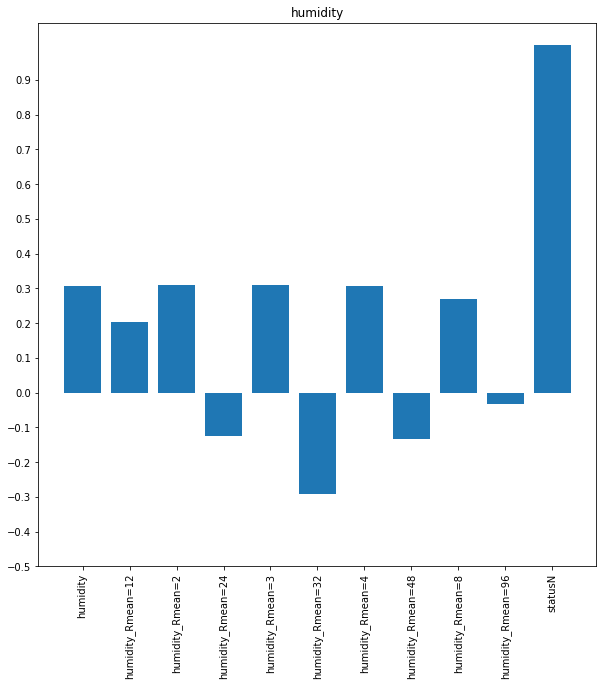

visibility
statusN                1.000000
visibility             0.039967
visibility_Rmean=2    -0.021842
visibility_Rmean=3     0.075259
visibility_Rmean=4     0.065206
visibility_Rmean=8     0.030880
visibility_Rmean=12   -0.012165
visibility_Rmean=24   -0.166150
visibility_Rmean=32   -0.132541
visibility_Rmean=48    0.007239
visibility_Rmean=96   -0.041775
Name: statusN, dtype: float64
Highest : visibility_Rmean=3   0.0752594158868


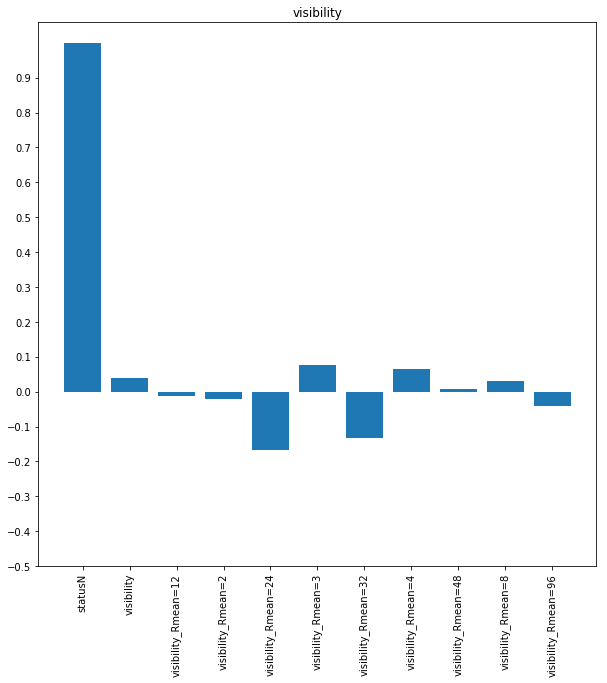

pressure
statusN              1.000000
pressure            -0.039395
pressure_Rmean=2    -0.034039
pressure_Rmean=3    -0.029235
pressure_Rmean=4    -0.025291
pressure_Rmean=8    -0.017885
pressure_Rmean=12   -0.034727
pressure_Rmean=24   -0.147072
pressure_Rmean=32   -0.147726
pressure_Rmean=48   -0.077699
pressure_Rmean=96   -0.053469
Name: statusN, dtype: float64
Highest : pressure_Rmean=32   -0.147726180023


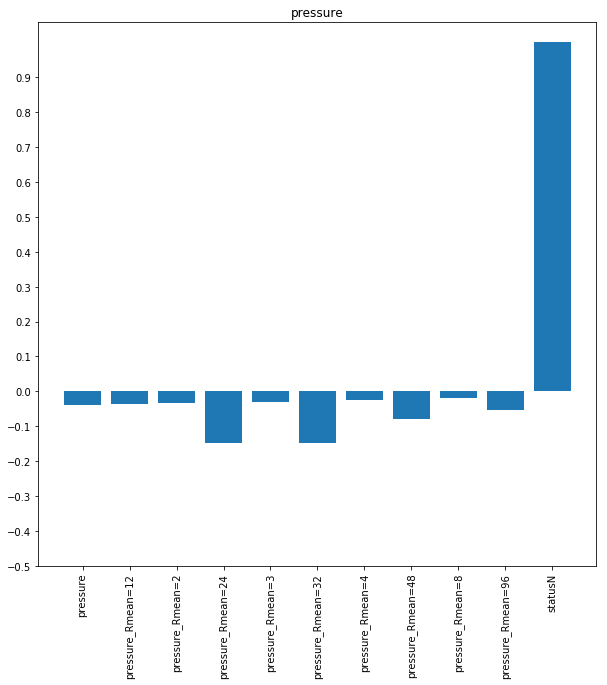

cloudcover
statusN                1.000000
cloudcover             0.032400
cloudcover_Rmean=2     0.037013
cloudcover_Rmean=3     0.041710
cloudcover_Rmean=4     0.045755
cloudcover_Rmean=8     0.062381
cloudcover_Rmean=12    0.074909
cloudcover_Rmean=24    0.101239
cloudcover_Rmean=32    0.079580
cloudcover_Rmean=48   -0.024417
cloudcover_Rmean=96    0.003769
Name: statusN, dtype: float64
Highest : cloudcover_Rmean=24   0.101239495584


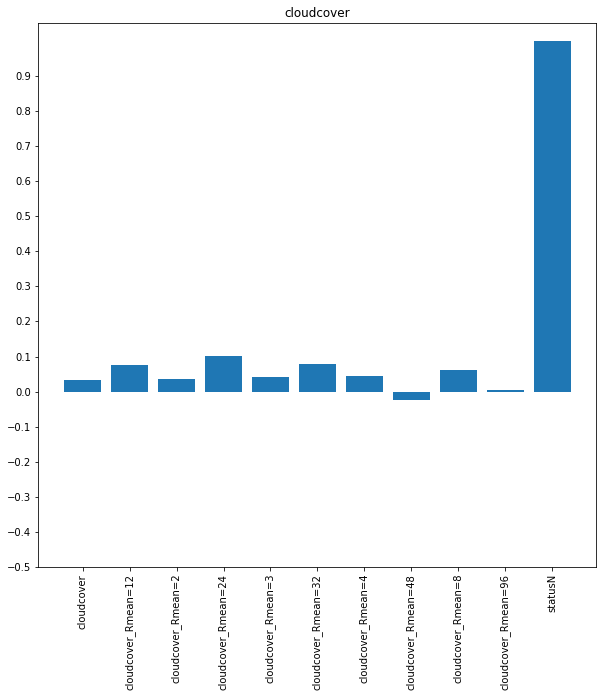

heatIndexC
statusN                1.000000
heatIndexC            -0.369947
heatIndexC_Rmean=2    -0.372559
heatIndexC_Rmean=3    -0.370308
heatIndexC_Rmean=4    -0.367346
heatIndexC_Rmean=8    -0.319053
heatIndexC_Rmean=12   -0.226397
heatIndexC_Rmean=24    0.176862
heatIndexC_Rmean=32    0.355003
heatIndexC_Rmean=48    0.163078
heatIndexC_Rmean=96    0.060090
Name: statusN, dtype: float64
Highest : heatIndexC_Rmean=2   -0.372559473782


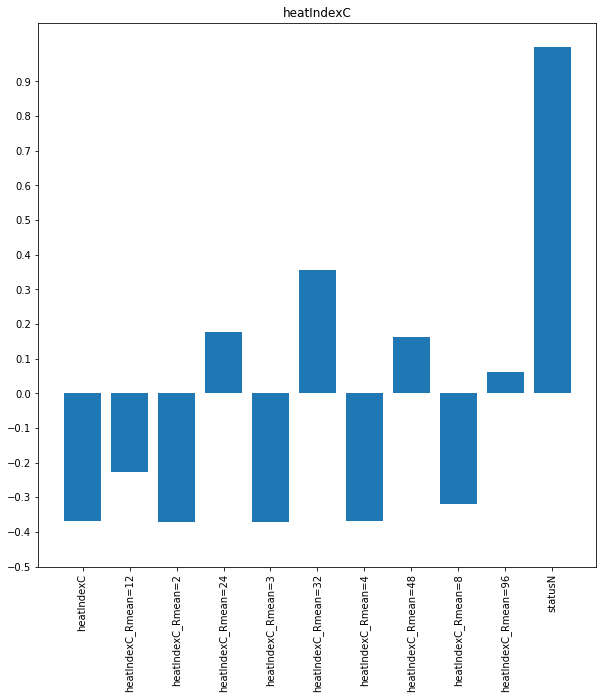

dewPointC
statusN               1.000000
dewPointC            -0.231612
dewPointC_Rmean=2    -0.233123
dewPointC_Rmean=3    -0.231344
dewPointC_Rmean=4    -0.226764
dewPointC_Rmean=8    -0.183165
dewPointC_Rmean=12   -0.108828
dewPointC_Rmean=24    0.134527
dewPointC_Rmean=32    0.192315
dewPointC_Rmean=48    0.073716
dewPointC_Rmean=96    0.012510
Name: statusN, dtype: float64
Highest : dewPointC_Rmean=2   -0.233123239053


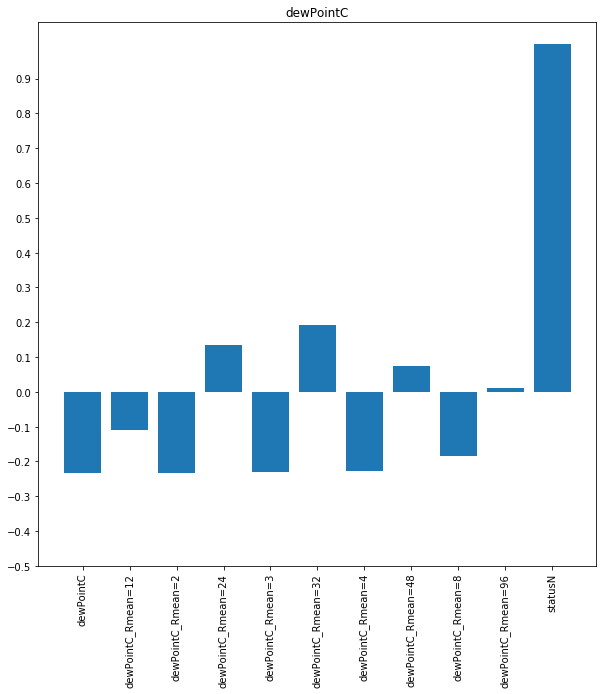

windChillC
statusN                1.000000
windChillC            -0.363049
windChillC_Rmean=2    -0.363217
windChillC_Rmean=3    -0.363441
windChillC_Rmean=4    -0.354410
windChillC_Rmean=8    -0.295754
windChillC_Rmean=12   -0.200939
windChillC_Rmean=24    0.171752
windChillC_Rmean=32    0.335371
windChillC_Rmean=48    0.141601
windChillC_Rmean=96    0.053017
Name: statusN, dtype: float64
Highest : windChillC_Rmean=3   -0.363440864813


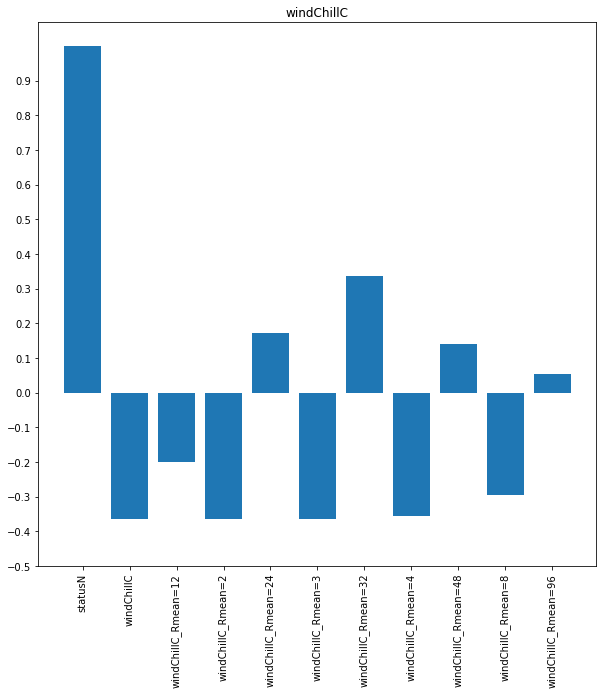

windGustMiles
statusN                   1.000000
windGustMiles            -0.061272
windGustMiles_Rmean=2    -0.057397
windGustMiles_Rmean=3    -0.048259
windGustMiles_Rmean=4    -0.033187
windGustMiles_Rmean=8     0.022605
windGustMiles_Rmean=12    0.090412
windGustMiles_Rmean=24    0.204070
windGustMiles_Rmean=32    0.125216
windGustMiles_Rmean=48   -0.107642
windGustMiles_Rmean=96   -0.004180
Name: statusN, dtype: float64
Highest : windGustMiles_Rmean=48   -0.107641948906


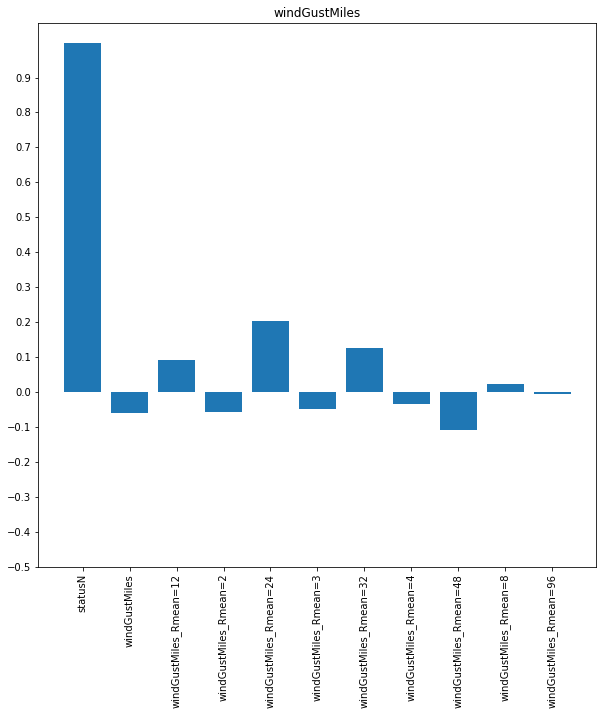

feelsLikeC
statusN                1.000000
feelsLikeC            -0.369947
feelsLikeC_Rmean=2    -0.372559
feelsLikeC_Rmean=3    -0.370308
feelsLikeC_Rmean=4    -0.367346
feelsLikeC_Rmean=8    -0.319053
feelsLikeC_Rmean=12   -0.226397
feelsLikeC_Rmean=24    0.176862
feelsLikeC_Rmean=32    0.355003
feelsLikeC_Rmean=48    0.163078
feelsLikeC_Rmean=96    0.060090
Name: statusN, dtype: float64
Highest : feelsLikeC_Rmean=2   -0.372559473782


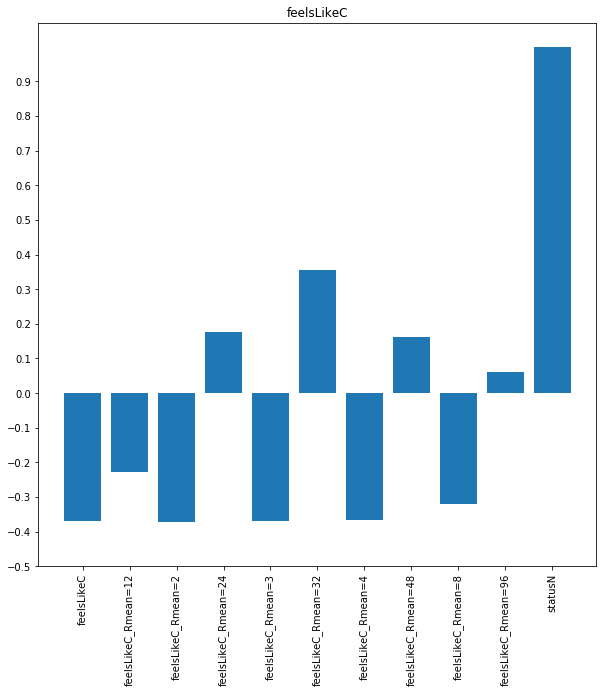

In [50]:
features = FEATURES
data = rolling_weather
data_features = data.columns
shift = 2
for f in features:
    print(f)
    merged_dataset = pd.DataFrame(expanding_merged['statusN'])
    for n in range(0, len(data_features)):
        if f == data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]].shift(shift)], axis = 1)
        elif f+"_Rmean" in data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]].shift(shift)], axis = 1)
        
    merged_dataset = merged_dataset.drop(merged_dataset.index[0:shift])
    corr = merged_dataset.corr(method='spearman')
    y = corr['statusN']
    print(y)
    
    if(len(y) > 1):
        high_index = getHighest(y[1], y)
        print ("Highest : " + corr.columns[high_index] + "   " + str(y[high_index]))
        
    getBarPlot(y, f, 10,10,corr.columns)
    

### Expanding

statusN
statusN                      1.000000
Expanding Mean 2 statusN     0.415410
Expanding Mean 3 statusN     0.415851
Expanding Mean 4 statusN     0.415990
Expanding Mean 8 statusN     0.410072
Expanding Mean 12 statusN    0.399606
Expanding Mean 16 statusN    0.393218
Expanding Mean 24 statusN    0.379369
Expanding Mean 48 statusN    0.318070
Expanding Mean 96 statusN    0.326008
Name: statusN, dtype: float64
Highest : Expanding Mean 4 statusN   0.415989882559


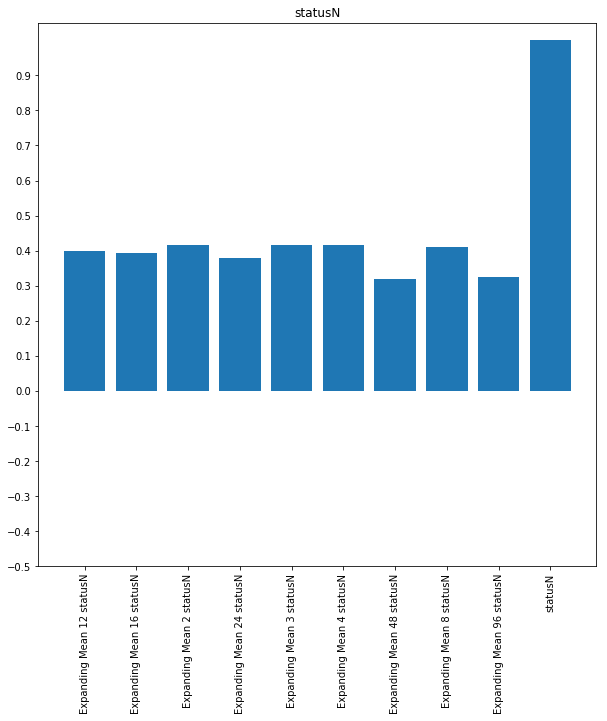

statusS
statusN                      1.000000
statusS                      0.083115
Expanding Mean 2 statusS     0.083012
Expanding Mean 3 statusS     0.083324
Expanding Mean 4 statusS     0.080714
Expanding Mean 8 statusS     0.075130
Expanding Mean 12 statusS    0.075539
Expanding Mean 16 statusS    0.062277
Expanding Mean 24 statusS    0.065940
Expanding Mean 48 statusS    0.060380
Expanding Mean 96 statusS    0.095277
Name: statusN, dtype: float64
Highest : Expanding Mean 96 statusS   0.095276879533


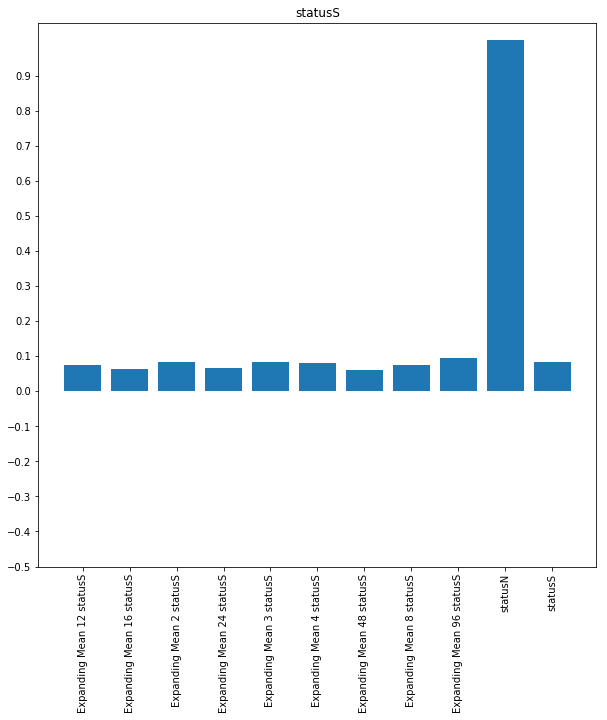

tempC
statusN                    1.000000
tempC                     -0.352255
Expanding Mean 2 tempC    -0.352534
Expanding Mean 3 tempC    -0.354981
Expanding Mean 4 tempC    -0.352817
Expanding Mean 8 tempC    -0.356034
Expanding Mean 12 tempC   -0.359423
Expanding Mean 16 tempC   -0.352763
Expanding Mean 24 tempC   -0.369113
Expanding Mean 48 tempC   -0.328898
Expanding Mean 96 tempC   -0.299489
Name: statusN, dtype: float64
Highest : Expanding Mean 24 tempC   -0.369113064046


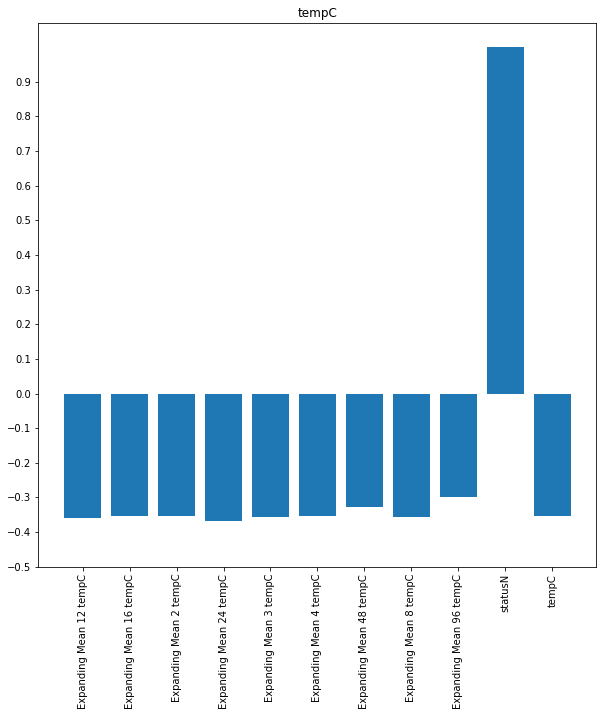

windspeedMiles
statusN                             1.000000
windspeedMiles                     -0.142705
Expanding Mean 2 windspeedMiles    -0.142499
Expanding Mean 3 windspeedMiles    -0.140149
Expanding Mean 4 windspeedMiles    -0.141803
Expanding Mean 8 windspeedMiles    -0.134903
Expanding Mean 12 windspeedMiles   -0.128450
Expanding Mean 16 windspeedMiles   -0.123454
Expanding Mean 24 windspeedMiles   -0.110473
Expanding Mean 48 windspeedMiles   -0.112212
Expanding Mean 96 windspeedMiles   -0.036658
Name: statusN, dtype: float64
Highest : Expanding Mean 2 windspeedMiles   -0.142498847402


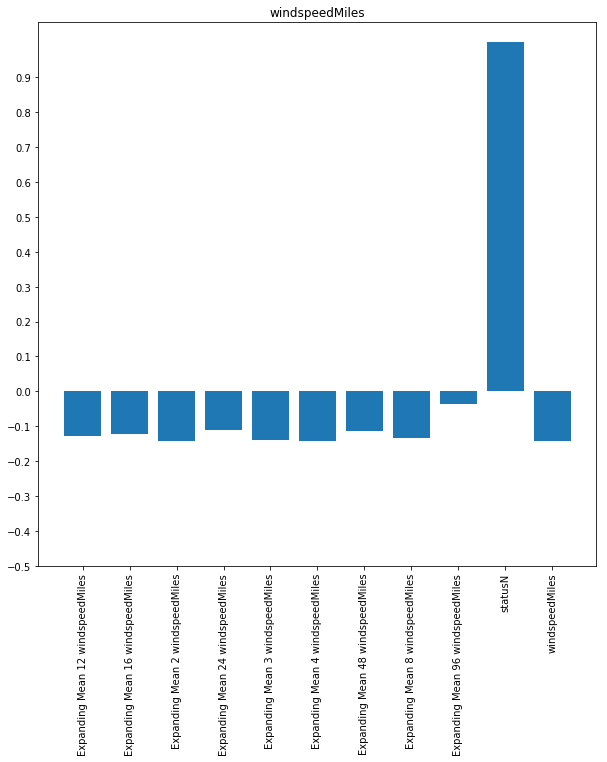

precipMM
statusN                       1.000000
precipMM                     -0.063212
Expanding Mean 2 precipMM    -0.062598
Expanding Mean 3 precipMM    -0.060696
Expanding Mean 4 precipMM    -0.060855
Expanding Mean 8 precipMM    -0.053636
Expanding Mean 12 precipMM   -0.049124
Expanding Mean 16 precipMM   -0.045576
Expanding Mean 24 precipMM   -0.020774
Expanding Mean 48 precipMM   -0.037018
Expanding Mean 96 precipMM   -0.009277
Name: statusN, dtype: float64
Highest : Expanding Mean 2 precipMM   -0.0625978672675


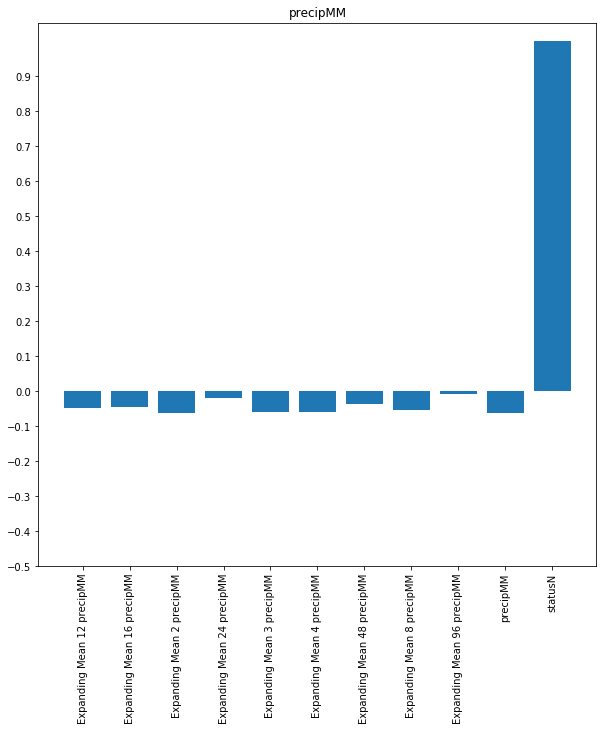

humidity
statusN                       1.000000
humidity                      0.302471
Expanding Mean 2 humidity     0.303394
Expanding Mean 3 humidity     0.305101
Expanding Mean 4 humidity     0.305513
Expanding Mean 8 humidity     0.308504
Expanding Mean 12 humidity    0.311831
Expanding Mean 16 humidity    0.307360
Expanding Mean 24 humidity    0.323667
Expanding Mean 48 humidity    0.296577
Expanding Mean 96 humidity    0.273177
Name: statusN, dtype: float64
Highest : Expanding Mean 24 humidity   0.323667384746


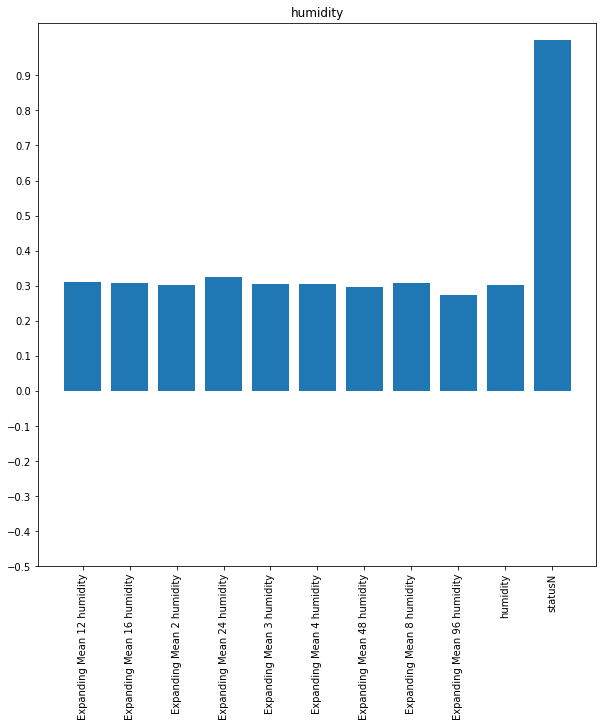

visibility
statusN                         1.000000
visibility                      0.019365
Expanding Mean 2 visibility     0.019321
Expanding Mean 3 visibility     0.018488
Expanding Mean 4 visibility     0.019049
Expanding Mean 8 visibility     0.016011
Expanding Mean 12 visibility    0.017038
Expanding Mean 16 visibility    0.012261
Expanding Mean 24 visibility    0.000765
Expanding Mean 48 visibility    0.018709
Expanding Mean 96 visibility    0.007389
Name: statusN, dtype: float64
Highest : Expanding Mean 2 visibility   0.019321095313


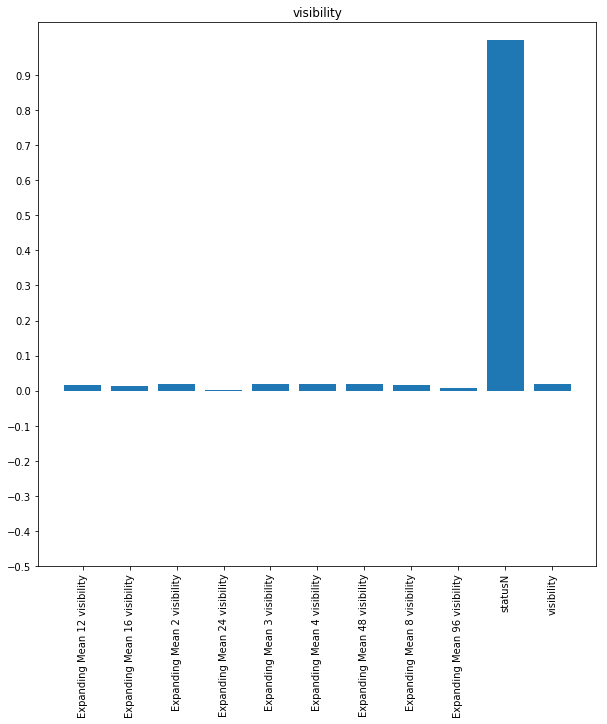

pressure
statusN                       1.000000
pressure                     -0.034708
Expanding Mean 2 pressure    -0.034584
Expanding Mean 3 pressure    -0.031973
Expanding Mean 4 pressure    -0.034135
Expanding Mean 8 pressure    -0.027652
Expanding Mean 12 pressure   -0.022764
Expanding Mean 16 pressure   -0.019636
Expanding Mean 24 pressure   -0.007360
Expanding Mean 48 pressure   -0.000262
Expanding Mean 96 pressure   -0.028457
Name: statusN, dtype: float64
Highest : Expanding Mean 2 pressure   -0.0345839079301


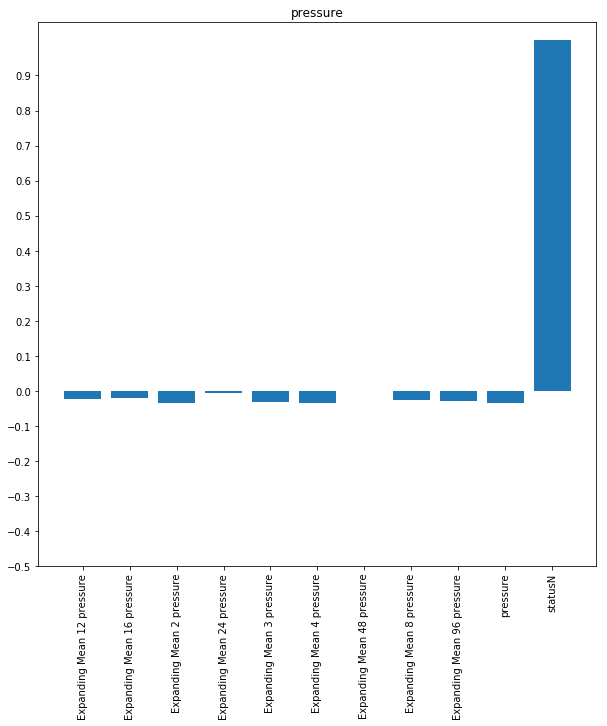

cloudcover
statusN                         1.000000
cloudcover                     -0.042588
Expanding Mean 2 cloudcover    -0.041775
Expanding Mean 3 cloudcover    -0.040886
Expanding Mean 4 cloudcover    -0.040055
Expanding Mean 8 cloudcover    -0.036203
Expanding Mean 12 cloudcover   -0.032805
Expanding Mean 16 cloudcover   -0.029866
Expanding Mean 24 cloudcover   -0.019589
Expanding Mean 48 cloudcover   -0.026273
Expanding Mean 96 cloudcover    0.005502
Name: statusN, dtype: float64
Highest : Expanding Mean 2 cloudcover   -0.0417747632346


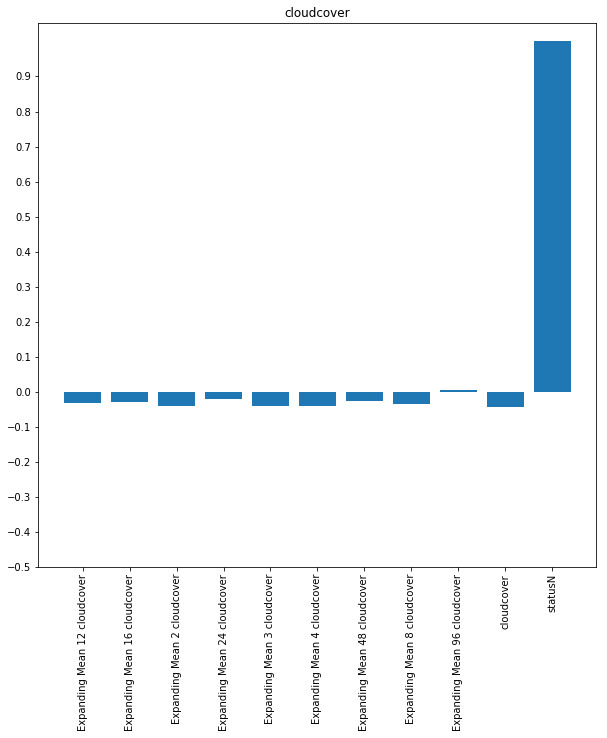

heatIndexC
statusN                         1.000000
heatIndexC                     -0.353041
Expanding Mean 2 heatIndexC    -0.354069
Expanding Mean 3 heatIndexC    -0.356813
Expanding Mean 4 heatIndexC    -0.356254
Expanding Mean 8 heatIndexC    -0.361653
Expanding Mean 12 heatIndexC   -0.366082
Expanding Mean 16 heatIndexC   -0.359964
Expanding Mean 24 heatIndexC   -0.381005
Expanding Mean 48 heatIndexC   -0.336985
Expanding Mean 96 heatIndexC   -0.303807
Name: statusN, dtype: float64
Highest : Expanding Mean 24 heatIndexC   -0.381004869004


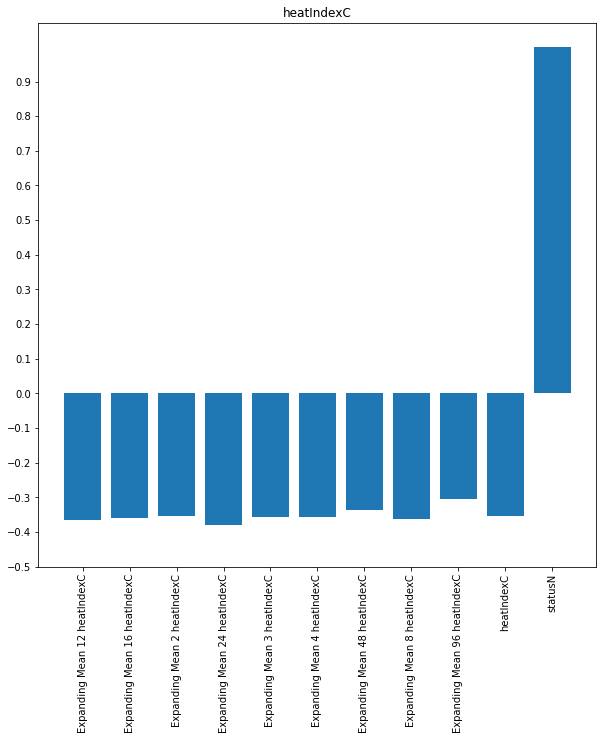

dewPointC
statusN                        1.000000
dewPointC                     -0.226995
Expanding Mean 2 dewPointC    -0.227112
Expanding Mean 3 dewPointC    -0.230726
Expanding Mean 4 dewPointC    -0.227457
Expanding Mean 8 dewPointC    -0.229701
Expanding Mean 12 dewPointC   -0.237674
Expanding Mean 16 dewPointC   -0.224042
Expanding Mean 24 dewPointC   -0.234224
Expanding Mean 48 dewPointC   -0.162695
Expanding Mean 96 dewPointC   -0.137372
Name: statusN, dtype: float64
Highest : Expanding Mean 12 dewPointC   -0.237674467316


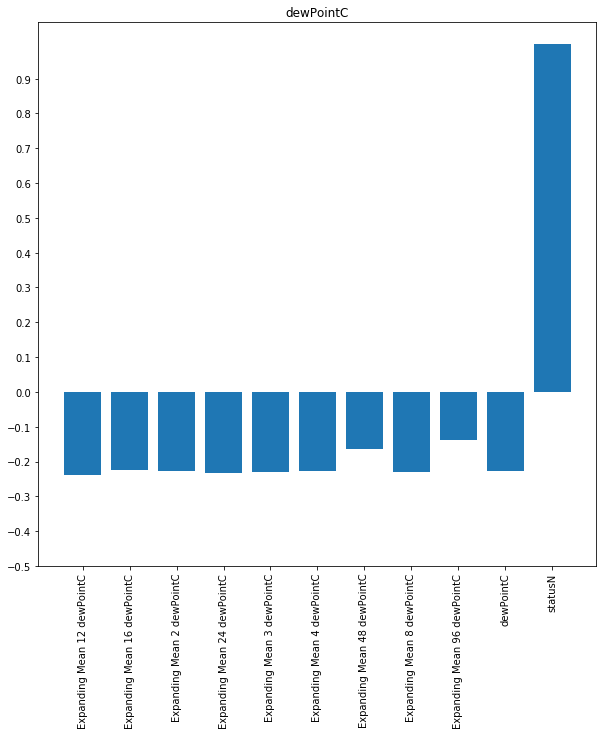

windChillC
statusN                         1.000000
windChillC                     -0.352661
Expanding Mean 2 windChillC    -0.352942
Expanding Mean 3 windChillC    -0.355422
Expanding Mean 4 windChillC    -0.353229
Expanding Mean 8 windChillC    -0.356408
Expanding Mean 12 windChillC   -0.359897
Expanding Mean 16 windChillC   -0.353195
Expanding Mean 24 windChillC   -0.369721
Expanding Mean 48 windChillC   -0.329010
Expanding Mean 96 windChillC   -0.299495
Name: statusN, dtype: float64
Highest : Expanding Mean 24 windChillC   -0.369720764947


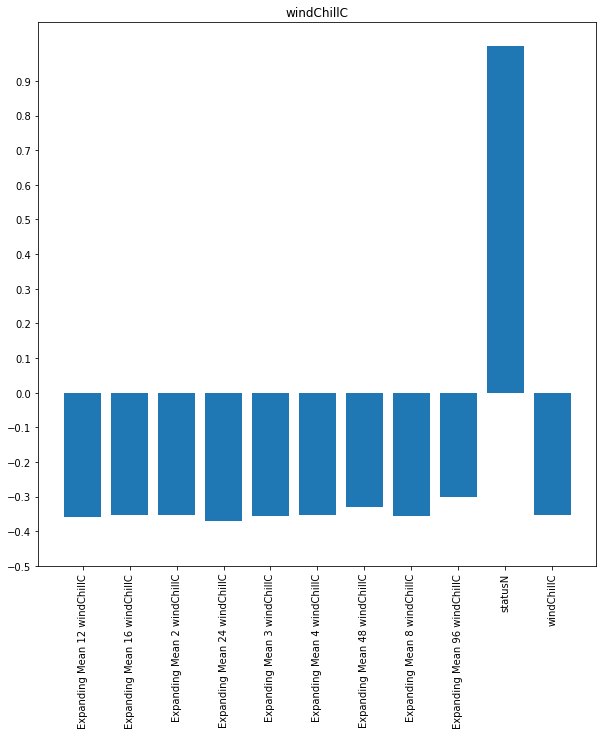

windGustMiles
statusN                            1.000000
windGustMiles                     -0.091999
Expanding Mean 2 windGustMiles    -0.091596
Expanding Mean 3 windGustMiles    -0.088452
Expanding Mean 4 windGustMiles    -0.090057
Expanding Mean 8 windGustMiles    -0.081979
Expanding Mean 12 windGustMiles   -0.072179
Expanding Mean 16 windGustMiles   -0.066710
Expanding Mean 24 windGustMiles   -0.053289
Expanding Mean 48 windGustMiles   -0.065861
Expanding Mean 96 windGustMiles    0.010925
Name: statusN, dtype: float64
Highest : Expanding Mean 2 windGustMiles   -0.0915956953556


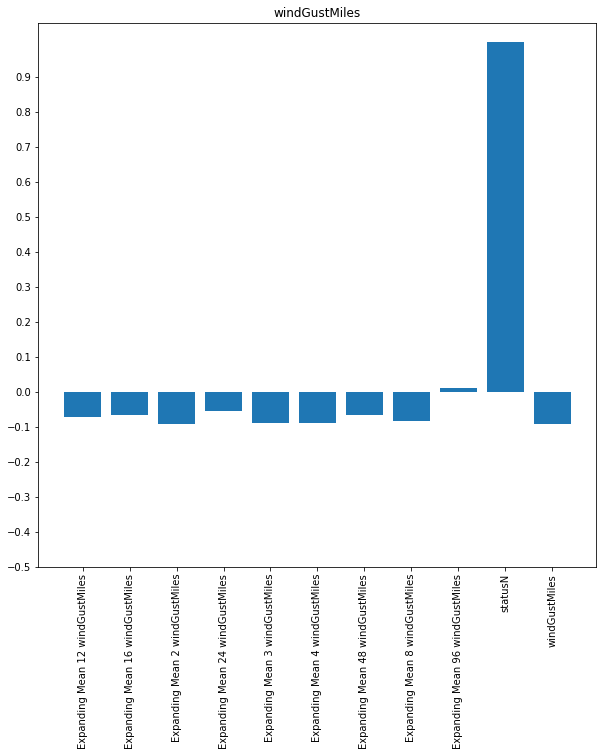

feelsLikeC
statusN                         1.000000
feelsLikeC                     -0.353041
Expanding Mean 2 feelsLikeC    -0.354069
Expanding Mean 3 feelsLikeC    -0.356813
Expanding Mean 4 feelsLikeC    -0.356254
Expanding Mean 8 feelsLikeC    -0.361653
Expanding Mean 12 feelsLikeC   -0.366082
Expanding Mean 16 feelsLikeC   -0.359964
Expanding Mean 24 feelsLikeC   -0.381005
Expanding Mean 48 feelsLikeC   -0.336985
Expanding Mean 96 feelsLikeC   -0.303807
Name: statusN, dtype: float64
Highest : Expanding Mean 24 feelsLikeC   -0.381004869004


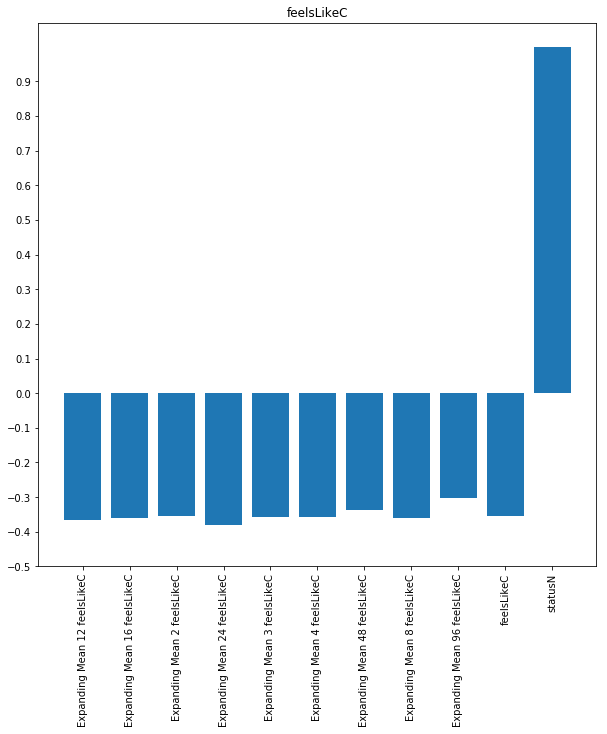

In [51]:
features = FEATURES
data = expanding_merged
data_features = data.columns
shift = 96
for f in features:
    print(f)
    merged_dataset = pd.DataFrame(expanding_merged['statusN'])
    for n in range(0, len(data_features)):
        if f == data_features[n] and f != "statusN":
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]].shift(shift)], axis = 1)
        elif "Expanding Mean " in data_features[n] and f in data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]].shift(shift)], axis = 1)
        
    merged_dataset = merged_dataset.drop(merged_dataset.index[0:shift])
    corr = merged_dataset.corr(method='spearman')
    y = corr['statusN']
    print(y)
    
    if(len(y) > 1):
        high_index = getHighest(y[1], y)
        print ("Highest : " + corr.columns[high_index] + "   " + str(y[high_index]))
        
    getBarPlot(y, f, 10,10,corr.columns)
    

# Custom Shifts




In [41]:
t_shift = 96
w_shift = 12


#### Rolling No Traffic Shift


In [13]:
features = FEATURES
data = rolling_weather
data_features = data.columns
high_mean = []
original = []
original_values = []
high_mean_values = []
high_mean_window = []
for f in features:
    print(f)
    merged_dataset = pd.DataFrame(expanding_merged['statusN'])
    for n in range(0, len(data_features)):
        if f == data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]]], axis = 1)
        elif f+"_Rmean=" in data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]]], axis = 1)
            
        # get dates with more than 1mm precip
#     merged_dataset = merged_dataset[merged_dataset[f+"_Rmean="] >= 1]
            
# For Shifts
#     merged_dataset = merged_dataset.drop(merged_dataset.index[0:max(t_shift,w_shift)])
    corr = merged_dataset.corr(method='spearman')
    y = corr['statusN']
    print(y)
    if(len(y) > 1):
        h = f + "   " + str(y[1])
        original.append(h)
        original_values.append(str(y[1]))
        high_index = getHighest(y[1], y)
        if high_index == 0:
            getHighest(-1*y[1], y)
        print ("Highest : " + corr.columns[high_index] + "   " + str(y[high_index]))
        high_mean.append(corr.columns[high_index] + "   " + str(y[high_index]))
        high_mean_values.append(str(y[high_index]))
        high_mean_window.append(corr.columns[high_index].replace(f + "_Rmean=", ""))
#     getBarPlot(y, f, 5,5,corr.columns)
    
print("Original")
print('\n'.join(map(str, original)))    
print("\n\n")
print("Original Values")
print('\n'.join(map(str, original_values)))    
print("\n\n")
print("Highest Rolling")
print('\n'.join(map(str, high_mean)))    
print("\n\n")
print("Highest Rolling Values")
print('\n'.join(map(str, high_mean_values)))
print("\n\n")
print("Highest Rolling Values Window")
print('\n'.join(map(str, high_mean_window)))

statusN
statusN    1.0
Name: statusN, dtype: float64
statusS
statusN    1.0
Name: statusN, dtype: float64
tempC
statusN           1.000000
tempC            -0.357453
tempC_Rmean=2    -0.362758
tempC_Rmean=3    -0.367567
tempC_Rmean=4    -0.363613
tempC_Rmean=8    -0.320621
tempC_Rmean=12   -0.236150
tempC_Rmean=24    0.131756
tempC_Rmean=32    0.317122
tempC_Rmean=48    0.177058
tempC_Rmean=96    0.050813
Name: statusN, dtype: float64
Highest : tempC_Rmean=3   -0.3675668368596594
windspeedMiles
statusN                    1.000000
windspeedMiles            -0.123109
windspeedMiles_Rmean=2    -0.114124
windspeedMiles_Rmean=3    -0.117208
windspeedMiles_Rmean=4    -0.099882
windspeedMiles_Rmean=8    -0.063766
windspeedMiles_Rmean=12    0.002594
windspeedMiles_Rmean=24    0.192342
windspeedMiles_Rmean=32    0.175508
windspeedMiles_Rmean=48   -0.042576
windspeedMiles_Rmean=96    0.003469
Name: statusN, dtype: float64
Highest : windspeedMiles_Rmean=3   -0.11720824049318677
precipMM
statusN  

#### Expanding No Traffic Shift


In [14]:
features = FEATURES
data = expanding_merged
data_features = data.columns
high_mean = []
original = []
high_mean_values = []
high_mean_window = []
for f in features:
    print(f)
    merged_dataset = pd.DataFrame(expanding_merged['statusN'])
    for n in range(0, len(data_features)):
        if f == data_features[n] and f != "statusN":
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]]], axis = 1)
        elif "Expanding Mean " in data_features[n] and f in data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]]], axis = 1)
        
# For Shifts
#     merged_dataset = merged_dataset.drop(merged_dataset.index[0:max(t_shift,w_shift)])
    corr = merged_dataset.corr(method='spearman')
    y = corr['statusN']
    print(y)
    
    if(len(y) > 1):
        h = f + "   " + str(y[1])
        original.append(h)
        high_index = getHighest(y[1], y)
        high_mean.append(corr.columns[high_index] + "   " + str(y[high_index]))
        high_mean_values.append(str(y[high_index]))
        high_mean_window.append(corr.columns[high_index].replace("Expanding Mean ", "").replace(" " + f, ""))
        print ("Highest : " + corr.columns[high_index] + "   " + str(y[high_index]))
        
#     getBarPlot(y, f, 5,5,corr.columns)
print("Highest Expanding")
print('\n'.join(map(str, high_mean)))
print("\n\n")
print("Highest Expanding Values")
print('\n'.join(map(str, high_mean_values[2:])))
print("\n\n")
print("Highest Expanding Values Window")
print('\n'.join(map(str, high_mean_window[2:])))

statusN
statusN                      1.000000
Expanding Mean 2 statusN     0.995798
Expanding Mean 3 statusN     0.988118
Expanding Mean 4 statusN     0.978788
Expanding Mean 8 statusN     0.934377
Expanding Mean 12 statusN    0.903967
Expanding Mean 16 statusN    0.862574
Expanding Mean 24 statusN    0.849404
Expanding Mean 48 statusN    0.706457
Expanding Mean 96 statusN    0.640689
Name: statusN, dtype: float64
Highest : Expanding Mean 3 statusN   0.9881182086544102
statusS
statusN                      1.000000
statusS                      0.110681
Expanding Mean 2 statusS     0.110231
Expanding Mean 3 statusS     0.111538
Expanding Mean 4 statusS     0.108035
Expanding Mean 8 statusS     0.104021
Expanding Mean 12 statusS    0.099941
Expanding Mean 16 statusS    0.096429
Expanding Mean 24 statusS    0.096063
Expanding Mean 48 statusS    0.108140
Expanding Mean 96 statusS    0.154334
Name: statusN, dtype: float64
Highest : Expanding Mean 96 statusS   0.15433431135906717
tempC
status

# Correlation of Optimal Windows for All Variables


### Rolling

tempC
24
windspeedMiles
2
humidity
24
heatIndexC
24
dewPointC
4
windChillC
24
feelsLikeC
24
                                  statusN  Expanding Mean 24 tempC  \
statusN                          1.000000                -0.373617   
Expanding Mean 24 tempC         -0.373617                 1.000000   
Expanding Mean 2 windspeedMiles -0.123022                 0.130662   
Expanding Mean 24 humidity       0.320867                -0.919792   
Expanding Mean 24 heatIndexC    -0.385568                 0.974859   
Expanding Mean 4 dewPointC      -0.228381                 0.280984   
Expanding Mean 24 windChillC    -0.373801                 0.999950   
Expanding Mean 24 feelsLikeC    -0.385568                 0.974859   

                                 Expanding Mean 2 windspeedMiles  \
statusN                                                -0.123022   
Expanding Mean 24 tempC                                 0.130662   
Expanding Mean 2 windspeedMiles                         1.000000   
Expan

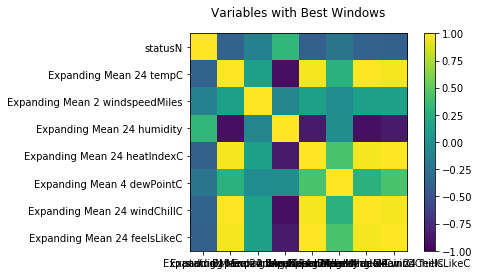

In [12]:
features = ["tempC", "windspeedMiles", "humidity", "pressure", "heatIndexC", "dewPointC", "windChillC", "feelsLikeC"]
feature_bwindow = [24, 2, 24, 24, 4, 24, 24]
data = expanding_merged
data_features = data.columns
high_mean = []
original = []
original_values = []
high_mean_values = []
high_mean_window = []

merged_dataset = pd.DataFrame(expanding_merged['statusN'])
for f in features:
    print(f)
    w = features.index(f)
    print(feature_bwindow[w])
    for n in range(0, len(data_features)):
#         if f == data_features[n]:
#             merged_dataset = pd.concat([merged_dataset, data[data_features[n]]], axis = 1)
#         print(data_features[n])
        if "Expanding Mean " + str(feature_bwindow[w]) + " " + f==data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]]], axis = 1)
            
corr = merged_dataset.corr(method='spearman')
print(corr)
corr.to_csv(PATH + "Expanding and Rolling Result\\Labeled_ExpandingCorrelated_BestWindows.csv", encoding='utf-8', index=False)
print('DONE')
getHeatMap(corr, "Variables with Best Windows", 7, 7, corr.columns, corr.columns)



### Expanding

In [ ]:
features = ["tempC", "windspeedMiles", "humidity", "heatIndexC", "dewPointC", "windChillC", "feelsLikeC"]
feature_bwindow = [24, 2, 24, 24, 4, 24, 24]
data = expanding_merged
data_features = data.columns
high_mean = []
original = []
original_values = []
high_mean_values = []
high_mean_window = []

# merged_dataset = pd.DataFrame(expanding_merged['statusN'])
for f in features:
    print(f)
    w = features.index(f)
    print(feature_bwindow[w])
    for n in range(0, len(data_features)):
#         if f == data_features[n]:
#             merged_dataset = pd.concat([merged_dataset, data[data_features[n]]], axis = 1)
#         print(data_features[n])
        if "Expanding Mean " + str(feature_bwindow[w]) + " " + f==data_features[n]:
            merged_dataset = pd.concat([merged_dataset, data[data_features[n]]], axis = 1)
            
corr = merged_dataset.corr(method='spearman')
print(corr)
corr.to_csv(PATH + "Expanding and Rolling Result\\Labeled_ExpandingCorrelated_BestWindows.csv", encoding='utf-8', index=False)
print('DONE')
getHeatMap(corr, "Variables with Best Windows", 7, 7, corr.columns, corr.columns)



                      statusN  statusN_Rmean=8  Expanding Mean 8 statusN
dt                                                                      
2015-06-01 00:00:00  0.908264              0.0                  0.908264
2015-06-01 00:15:00  0.909505              0.0                  0.908885
2015-06-01 00:30:00  0.910818              0.0                  0.909529
2015-06-01 00:45:00  0.912204              0.0                  0.910198
2015-06-01 01:00:00  0.913664              0.0                  0.910891


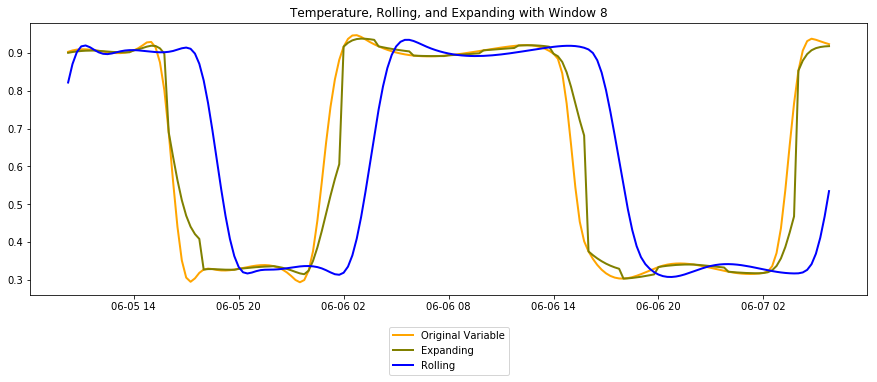

                           statusN  statusN_Rmean=8  Expanding Mean 8 statusN
statusN                   1.000000         0.525736                  0.934377
statusN_Rmean=8           0.525736         1.000000                  0.630047
Expanding Mean 8 statusN  0.934377         0.630047                  1.000000


In [36]:
start = 425
end = 600
variable = "statusN"
varName = "Variable"
R_window = "8"
E_window = "8"


merged_dataset = pd.DataFrame(expanding_merged['statusN'])
# merged_dataset = pd.concat([merged_dataset, expanding_merged[variable]], axis = 1)

merged_dataset = pd.concat([merged_dataset, rolling_traffic[variable + '_Rmean=' + R_window]], axis = 1)
# merged_dataset = pd.concat([merged_dataset, rolling_weather[variable + '_Rmean=' + R_window]], axis = 1)
# merged_dataset = pd.concat([merged_dataset, expanding_merged['Expanding Mean 24 humidity']], axis = 1)
merged_dataset = pd.concat([merged_dataset, expanding_merged['Expanding Mean ' + E_window + " " + variable]], axis = 1)
print(merged_dataset.head())                            
# multiple line plot

# plt.plot( merged_dataset["statusN"][start:end], color='orange', linewidth=2, label = "Original Traffic")
plt.plot( merged_dataset[variable][start:end], color='orange', linewidth=2, label = "Original " + varName)
plt.plot( merged_dataset["Expanding Mean " + E_window + " " + variable][start:end], color='olive', linewidth=2, label = "Expanding ")# + varName + " Window " + E_window)
plt.plot( merged_dataset[variable + "_Rmean=" + R_window][start:end], color='blue', linewidth=2, label = "Rolling ")# + varName + " Window " + R_window)
plt.rcParams["figure.figsize"] = 13,3
# plt.xticks(np.arange(start, end, step= 12))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.title("Temperature, Rolling, and Expanding with Window " + E_window)
plt.show()

corr = merged_dataset.corr(method='spearman')
print(corr)
